In [376]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [377]:
### Direct to the correct folder
path = 'D:/files/second_part/force_plate_COM_version'
filenames = os.listdir(path)   ### List the files name in the folder
sub_id = []                    ### Initialize the subject name list
value_list = []               ### Initialzie the value list

### Organize the information into different list and then integrate them together as a dataframe
for sub in filenames:
    curr_file = path + '/' + sub
    curr_csv = pd.read_csv(curr_file)
    value = list(curr_csv.loc[0])
    value_list.append(value)
    ID = str(curr_csv["sub_ID"][0]) ### -25: sub0?, -4: remove .csv
    sub_id.append(ID)
            
print("Current subject number: " + str(len(sub_id)) + '\n' + "Current features number: " + str(len(value)))

Current subject number: 241
Current features number: 71


In [378]:
### Create the correct columns name
col_names = list(curr_csv.columns)
all_col_names = ["sub_ID"] + col_names

In [379]:
### Create the correct metrix which is going to be convert to dataframe
all_list = []
for i in range(len(sub_id)):
    v = [(sub_id[i])] + value_list[i]
    all_list.append(v)

In [380]:
raw_df = pd.DataFrame(all_list, columns = all_col_names)
df = raw_df.iloc[:, 1:]

In [381]:
df["std_AP_aCOM"]

0      12372.8196
1       4370.8961
2       4405.4432
3       4796.1158
4       5125.8146
          ...    
236    14421.5362
237           NaN
238    23499.8545
239     5189.4609
240    17315.5745
Name: std_AP_aCOM, Length: 241, dtype: float64

## Checking dataset quality

* balance between group
* data type
* abnormal value because of the extraction from matlab 
* missing data
* outlier

In [382]:
print("In total " + str(df.shape[0]) + " steps")

In total 241 steps


In [383]:
df.groupby("target_performance").size()

target_performance
Bad          60
Good         75
Moderate    106
dtype: int64

In [384]:
for i in df.columns:
    if df[i].dtypes != "float64":
        print(i)

sub_ID
target_performance


In [385]:
df.describe().loc[["count", "mean", "std", "min", "max"],:]

std_AP_COM  std_ML_COM  std_vretical_COM  ROM_AP_COM  ROM_ML_COM  \
count  239.000000  239.000000        239.000000  239.000000  239.000000   
mean   189.586287    9.835468         11.906844  650.692506   33.649629   
std     24.124520    2.845555          2.354710   81.727029    9.469294   
min      8.268000    0.282960          0.465160   19.187800    0.657670   
max    240.294800   17.096600         19.725900  771.553000   58.636400   

       std_AP_vCOM  std_ML_vCOM  std_vretical_vCOM  max_AP_vCOM  max_ML_vCOM  \
count   239.000000   239.000000         239.000000   239.000000   239.000000   
mean    232.489818   206.134346         303.473324  2668.213910   315.620015   
std     120.554132    48.651909          79.493183   833.873682   106.224635   
min      53.330900     5.219500          20.677900   530.485500     9.099000   
max    1148.651100   408.011900         783.273200  7907.239400   726.057300   

       ...   min_AP_MOS  min_ML_MOS   ROM_AP_MOS  ROM_ML_MOS  mean_AP_IA  \
count  ...   239.000000  239.000000   239.000000  239.000000  233.000000   
mean   ...  -812.902462 -108.556387   579.865468  195.070016    0.463798   
std    ...   260.424567   32.143428   220.362765   40.367701    4.507291   
min    ... -1325.404400 -211.789300    23.244700   12.084600  -16.285500   
max    ...  -131.330200  -23.047800  1115.083500  325.220300   31.042600   

       mean_ML_IA   std_AP_IA   std_ML_IA   ROM_AP_IA   ROM_ML_IA  
count  233.000000  233.000000  233.000000  233.000000  233.000000  
mean    -0.014543    6.315313    1.597209   22.231527    6.590861  
std      3.064243    1.714473    0.735179    6.015338    2.983437  
min     -6.204500    0.000000    0.000000    0.000000    0.000000  
max      4.636500   11.531200    4.166900   40.036800   12.126100  

[5 rows x 69 columns]

In [386]:
df[df["std_AP_IA"].isnull()]

sub_ID  std_AP_COM  std_ML_COM  std_vretical_COM  ROM_AP_COM  ROM_ML_COM  \
21   sub01    204.2471     12.7511           12.6431    711.7375     43.8886   
95   sub08    206.2461      6.5742           15.2437    697.3548     22.6125   
114  sub09    190.0988     11.8265            9.8713    651.1706     40.8321   
119  sub09    164.7985     15.8938            9.5025    561.9128     50.9998   
167  sub13    240.2948      9.2324            5.1700    645.4077     26.8616   
210  sub17    202.3804      8.4744           11.2237    681.9840     29.1107   
223  sub19         NaN         NaN               NaN         NaN         NaN   
237  sub19         NaN         NaN               NaN         NaN         NaN   

     std_AP_vCOM  std_ML_vCOM  std_vretical_vCOM  max_AP_vCOM  ...  \
21      180.1657     254.1198           338.0894    3301.5053  ...   
95      268.2602     148.5449           388.0194    3368.0955  ...   
114     157.1721     251.8657           258.4871    2919.1272  ...   
119     185.7560     262.4254           261.8955    2805.2026  ...   
167     449.6447     188.6042           241.8451    3191.9714  ...   
210     257.1981     197.6282           251.0441    3186.2685  ...   
223          NaN          NaN                NaN          NaN  ...   
237          NaN          NaN                NaN          NaN  ...   

     min_ML_MOS  ROM_AP_MOS  ROM_ML_MOS  mean_AP_IA  mean_ML_IA  std_AP_IA  \
21     -84.9501    526.7775    196.4137         NaN         NaN        NaN   
95     -91.7608    952.3432    182.4634         NaN         NaN        NaN   
114   -150.5220    781.9245    211.8391         NaN         NaN        NaN   
119    -99.1099    371.9286    154.7134         NaN         NaN        NaN   
167   -104.2826    798.5421    190.9817         NaN         NaN        NaN   
210   -122.1742   1023.2708    182.5074         NaN         NaN        NaN   
223         NaN         NaN         NaN         NaN         NaN        NaN   
237         NaN         NaN         NaN         NaN         NaN        NaN   

     std_ML_IA  ROM_AP_IA  ROM_ML_IA  target_performance  
21         NaN        NaN        NaN                Good  
95         NaN        NaN        NaN                Good  
114        NaN        NaN        NaN            Moderate  
119        NaN        NaN        NaN            Moderate  
167        NaN        NaN        NaN            Moderate  
210        NaN        NaN        NaN                Good  
223        NaN        NaN        NaN                 Bad  
237        NaN        NaN        NaN                 Bad  

[8 rows x 71 columns]

In [387]:
df_without_na = df.copy()
for ID in df["sub_ID"].unique():
    grouped_df = df[df["sub_ID"] == ID]
    for col in grouped_df.columns:
        if grouped_df[col].isna().sum() != 0:
            mean = grouped_df[col].mean()
            df_without_na[df_without_na["sub_ID"] == ID] = grouped_df.fillna(mean)
print("Amount of nan in original table: " + str(df.isna().sum().sum()) + '\n' + "Amount of nan in current table: " + str(df_without_na.isna().sum().sum()))

Amount of nan in original table: 133
Amount of nan in current table: 0


In [388]:
df_without_na[round(df_without_na["std_AP_IA"]) == 0]

sub_ID  std_AP_COM  std_ML_COM  std_vretical_COM  ROM_AP_COM  ROM_ML_COM  \
12   sub01    197.9317     12.9961           12.1534    676.5497     43.4846   
51   sub03    200.1619      8.3765           10.1300    693.1065     28.4021   
130  sub10    188.3779     11.2370           12.9833    649.3398     39.0185   

     std_AP_vCOM  std_ML_vCOM  std_vretical_vCOM  max_AP_vCOM  ...  \
12      240.7457     185.4320           282.4145    1657.4351  ...   
51      152.6721     223.9688           289.4366    3241.8860  ...   
130     351.1504     226.0111           301.4939    3269.2500  ...   

     min_ML_MOS  ROM_AP_MOS  ROM_ML_MOS  mean_AP_IA  mean_ML_IA  std_AP_IA  \
12    -123.4354    840.2030    219.6326     10.7399      1.8337    0.47513   
51    -118.8937    499.5218    217.2384      5.8251      2.3949    0.43582   
130   -207.1809    994.8844    293.5448     12.2113      1.7859    0.00000   

     std_ML_IA  ROM_AP_IA  ROM_ML_IA  target_performance  
12      1.6168    2.21540    5.18230                Good  
51      0.1934    0.61634    0.27351                 Bad  
130     0.0000    0.00000    0.00000            Moderate  

[3 rows x 71 columns]

In [389]:
df_without_na[round(df_without_na["std_AP_IA"]) == 0]

sub_ID  std_AP_COM  std_ML_COM  std_vretical_COM  ROM_AP_COM  ROM_ML_COM  \
12   sub01    197.9317     12.9961           12.1534    676.5497     43.4846   
51   sub03    200.1619      8.3765           10.1300    693.1065     28.4021   
130  sub10    188.3779     11.2370           12.9833    649.3398     39.0185   

     std_AP_vCOM  std_ML_vCOM  std_vretical_vCOM  max_AP_vCOM  ...  \
12      240.7457     185.4320           282.4145    1657.4351  ...   
51      152.6721     223.9688           289.4366    3241.8860  ...   
130     351.1504     226.0111           301.4939    3269.2500  ...   

     min_ML_MOS  ROM_AP_MOS  ROM_ML_MOS  mean_AP_IA  mean_ML_IA  std_AP_IA  \
12    -123.4354    840.2030    219.6326     10.7399      1.8337    0.47513   
51    -118.8937    499.5218    217.2384      5.8251      2.3949    0.43582   
130   -207.1809    994.8844    293.5448     12.2113      1.7859    0.00000   

     std_ML_IA  ROM_AP_IA  ROM_ML_IA  target_performance  
12      1.6168    2.21540    5.18230                Good  
51      0.1934    0.61634    0.27351                 Bad  
130     0.0000    0.00000    0.00000            Moderate  

[3 rows x 71 columns]

In [390]:
df_without_outlier = df_without_na.drop(130, axis = 0)

In [391]:
std_vretical_xCOM_outlier_inx = df_without_na[(df_without_na["std_vretical_xCOM"]) > 5].index

df_without_outlier = df_without_na.drop(std_vretical_xCOM_outlier_inx, axis = 0)

In [392]:
df_without_outlier.describe().loc[["count", "mean", "std", "min", "max"],:]

std_AP_COM  std_ML_COM  std_vretical_COM  ROM_AP_COM  ROM_ML_COM  \
count  239.000000  239.000000        239.000000  239.000000  239.000000   
mean   189.586287    9.835468         11.906844  650.692506   33.649629   
std     24.124520    2.845555          2.354710   81.727029    9.469294   
min      8.268000    0.282960          0.465160   19.187800    0.657670   
max    240.294800   17.096600         19.725900  771.553000   58.636400   

       std_AP_vCOM  std_ML_vCOM  std_vretical_vCOM  max_AP_vCOM  max_ML_vCOM  \
count   239.000000   239.000000         239.000000   239.000000   239.000000   
mean    232.489818   206.134346         303.473324  2668.213910   315.620015   
std     120.554132    48.651909          79.493183   833.873682   106.224635   
min      53.330900     5.219500          20.677900   530.485500     9.099000   
max    1148.651100   408.011900         783.273200  7907.239400   726.057300   

       ...   min_AP_MOS  min_ML_MOS   ROM_AP_MOS  ROM_ML_MOS  mean_AP_IA  \
count  ...   239.000000  239.000000   239.000000  239.000000  239.000000   
mean   ...  -812.902462 -108.556387   579.865468  195.070016    0.612303   
std    ...   260.424567   32.143428   220.362765   40.367701    4.550506   
min    ... -1325.404400 -211.789300    23.244700   12.084600  -16.285500   
max    ...  -131.330200  -23.047800  1115.083500  325.220300   31.042600   

       mean_ML_IA   std_AP_IA   std_ML_IA   ROM_AP_IA   ROM_ML_IA  
count  239.000000  239.000000  239.000000  239.000000  239.000000  
mean     0.145970    6.316917    1.717259   21.833561    6.585548  
std      3.193928    1.705579    1.064175    6.441413    2.953165  
min     -6.204500    0.000000    0.000000    0.000000    0.000000  
max      8.122870   11.531200    8.122870   40.036800   12.126100  

[5 rows x 69 columns]

In [393]:
df_without_outlier.head()

sub_ID  std_AP_COM  std_ML_COM  std_vretical_COM  ROM_AP_COM  ROM_ML_COM  \
0  sub01    225.3941     13.7379           14.4676    771.5530     46.6441   
1  sub01    215.7082      9.1494           14.0027    751.8807     32.8360   
2  sub01    211.0191     11.8203           13.4648    738.4824     41.5929   
3  sub01    214.4471     11.5293           15.4618    747.1354     41.4193   
4  sub01    216.1303     11.9675           14.2662    754.2082     41.0624   

   std_AP_vCOM  std_ML_vCOM  std_vretical_vCOM  max_AP_vCOM  ...  min_ML_MOS  \
0     242.3234     225.1918           320.1764    2016.8228  ...    -91.1755   
1     191.5432     213.8965           313.8283    2479.8239  ...    -98.9281   
2     191.8410     201.5645           287.8133    2372.1007  ...   -132.8963   
3     158.5032     249.4564           384.1710    3295.6795  ...   -115.1524   
4     207.3971     203.7496           351.7096    3372.2676  ...   -133.6831   

   ROM_AP_MOS  ROM_ML_MOS  mean_AP_IA  mean_ML_IA  std_AP_IA  std_ML_IA  \
0    660.0699    200.8921   -0.457880      3.7046     7.8530     1.8426   
1    346.9955    202.1508   -0.523310     -4.1740     7.5574     2.0009   
2    778.0691    210.9258   17.789700     -6.2045     2.4831     1.1891   
3    383.3216    231.6019   -1.075900      3.8958     6.9163     1.8174   
4    809.8593    234.4645    0.005639     -3.6777     7.7185     1.8590   

   ROM_AP_IA  ROM_ML_IA  target_performance  
0    28.1769    10.9437                Good  
1    27.1516    10.1876                Good  
2     7.6599     4.0342                Good  
3    25.0181    10.5203                Good  
4    28.1969     9.7389                Good  

[5 rows x 71 columns]

In [394]:
df_without_outlier.columns

Index(['sub_ID', 'std_AP_COM', 'std_ML_COM', 'std_vretical_COM', 'ROM_AP_COM',
       'ROM_ML_COM', 'std_AP_vCOM', 'std_ML_vCOM', 'std_vretical_vCOM',
       'max_AP_vCOM', 'max_ML_vCOM', 'ROM_AP_vCOM', 'ROM_ML_vCOM',
       'std_AP_aCOM', 'std_ML_aCOM', 'std_vretical_aCOM', 'max_AP_aCOM',
       'max_ML_aCOM', 'ROM_AP_aCOM', 'ROM_ML_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'ROM_length', 'std_length', 'ROM_width',
       'std_width', 'mean_clearance', 'std_clearance', 'max_clearance',
       'std_AP_COP', 'std_ML_COP', 'ROM_AP_COP', 'ROM_ML_COP', 'std_AP_vCOP',
       'std_ML_vCOP', 'max_AP_vCOP', 'max_ML_vCOP', 'ROM_AP_vCOP',
       'ROM_ML_vCOP', 'std_AP_aCOP', 'std_ML_aCOP', 'max_AP_aCOP',
       'max_ML_aCOP', 'ROM_AP_aCOP', 'ROM_ML_aCOP', 'std_AP_xCOM',
       'std_ML_xCOM', 'std_vretical_xCOM', 'ROM_AP_xCOM', 'ROM_ML_xCOM',
       'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_AP_SS_MOS', 'mean_ML_SS_MOS', 'mean_AP_DS_MOS', 'mean_ML_DS_MOS',

In [395]:
from sklearn import preprocessing
normalized_df = pd.DataFrame()
for col in df_without_outlier.columns[:]:
    try:
        normalized_df[col] = preprocessing.normalize(np.array(df_without_outlier[col]).reshape(1, -1))[0]
    except:
        normalized_df[col] = df_without_outlier[col]

In [396]:
#normalized_df

In [397]:
all_df = df_without_outlier[['std_AP_COM', 'std_ML_COM', 'std_vretical_COM', 'ROM_AP_COM',
       'ROM_ML_COM', 'std_AP_vCOM', 'std_ML_vCOM', 'std_vretical_vCOM',
       'max_AP_vCOM', 'max_ML_vCOM', 'ROM_AP_vCOM', 'ROM_ML_vCOM',
       'std_AP_aCOM', 'std_ML_aCOM', 'std_vretical_aCOM', 'max_AP_aCOM',
       'max_ML_aCOM', 'ROM_AP_aCOM', 'ROM_ML_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'ROM_length', 'std_length', 'ROM_width',
       'std_width', 'mean_clearance', 'std_clearance', 'max_clearance',
       'std_AP_COP', 'std_ML_COP', 'ROM_AP_COP', 'ROM_ML_COP', 'std_AP_vCOP',
       'std_ML_vCOP', 'max_AP_vCOP', 'max_ML_vCOP', 'ROM_AP_vCOP',
       'ROM_ML_vCOP', 'std_AP_aCOP', 'std_ML_aCOP', 'max_AP_aCOP',
       'max_ML_aCOP', 'ROM_AP_aCOP', 'ROM_ML_aCOP', 'std_AP_xCOM',
       'std_ML_xCOM', 'std_vretical_xCOM', 'ROM_AP_xCOM', 'ROM_ML_xCOM',
       'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_AP_SS_MOS', 'mean_ML_SS_MOS', 'mean_AP_DS_MOS', 'mean_ML_DS_MOS',
       'max_AP_MOS', 'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_AP_MOS',
       'ROM_ML_MOS', 'mean_AP_IA', 'mean_ML_IA', 'std_AP_IA', 'std_ML_IA',
       'ROM_AP_IA', 'ROM_ML_IA', 'target_performance']]
spatiotemporal_df = df_without_outlier[['std_AP_COM', 'std_ML_COM', 'std_vretical_COM', 'ROM_AP_COM',
       'ROM_ML_COM', 'std_AP_vCOM', 'std_ML_vCOM', 'std_vretical_vCOM',
       'max_AP_vCOM', 'max_ML_vCOM', 'ROM_AP_vCOM', 'ROM_ML_vCOM',
       'std_AP_aCOM', 'std_ML_aCOM', 'std_vretical_aCOM', 'max_AP_aCOM',
       'max_ML_aCOM', 'ROM_AP_aCOM', 'ROM_ML_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'ROM_length', 'std_length', 'ROM_width',
       'std_width', 'mean_clearance', 'std_clearance', 'max_clearance', 'target_performance'
       ]]
COP_df = df_without_outlier[['std_AP_COP', 'std_ML_COP', 'ROM_AP_COP', 'ROM_ML_COP', 'std_AP_vCOP',
       'std_ML_vCOP', 'max_AP_vCOP', 'max_ML_vCOP', 'ROM_AP_vCOP',
       'ROM_ML_vCOP', 'std_AP_aCOP', 'std_ML_aCOP', 'max_AP_aCOP',
       'max_ML_aCOP', 'ROM_AP_aCOP', 'ROM_ML_aCOP', 'target_performance'
       ]]
advanced_df = df_without_outlier[['std_AP_xCOM',
       'std_ML_xCOM', 'std_vretical_xCOM', 'ROM_AP_xCOM', 'ROM_ML_xCOM',
       'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_AP_SS_MOS', 'mean_ML_SS_MOS', 'mean_AP_DS_MOS', 'mean_ML_DS_MOS',
       'max_AP_MOS', 'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_AP_MOS',
       'ROM_ML_MOS', 'mean_AP_IA', 'mean_ML_IA', 'std_AP_IA', 'std_ML_IA',
       'ROM_AP_IA', 'ROM_ML_IA', 'target_performance'
       ]]

In [398]:
#x = spatiotemporal_df[spatiotemporal_df["std_AP_aCOM"] < 60000]["std_AP_aCOM"]
#x.hist()

In [399]:
#fig = plt.figure(figsize = (15,25))
#ax = fig.gca()
#spatiotemporal_df.hist(ax = ax)

In [400]:
#fig = plt.figure(figsize = (15,25))
#ax = fig.gca()
#COP_df.hist(ax = ax)

In [401]:
#fig = plt.figure(figsize = (15,25))
#ax = fig.gca()
#advanced_df.hist(ax = ax)

In [402]:
#fig = plt.figure(figsize = (15,25))
#ax = fig.gca()
#spatiotemporal_clear_df.hist(ax = ax)

In [403]:
all_clear_df = df_without_outlier[['std_AP_COM', 'std_ML_COM', 'std_vretical_COM', 'ROM_AP_COM',
       'ROM_ML_COM', 'std_AP_vCOM', 'std_ML_vCOM', 'std_vretical_vCOM',
       'max_AP_vCOM', 'max_ML_vCOM', 'ROM_AP_vCOM', 'ROM_ML_vCOM',
        'std_ML_aCOM', 'std_vretical_aCOM', 'max_ML_aCOM', 'ROM_ML_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'ROM_length', 'std_length', 'ROM_width',
       'std_width', 'mean_clearance', 'std_clearance', 'max_clearance', 'std_AP_COP', 'std_ML_COP', 'ROM_AP_COP', 'ROM_ML_COP', 
       'std_ML_vCOP', 'max_ML_vCOP', 'ROM_ML_vCOP', 'std_ML_aCOP', 'max_ML_aCOP', 'ROM_AP_aCOP','std_AP_xCOM',
       'std_ML_xCOM', 'std_vretical_xCOM', 'ROM_AP_xCOM', 'ROM_ML_xCOM',
       'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_AP_SS_MOS', 'mean_ML_SS_MOS', 'mean_AP_DS_MOS', 'mean_ML_DS_MOS',
       'max_AP_MOS', 'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_AP_MOS',
       'ROM_ML_MOS', 'mean_AP_IA', 'mean_ML_IA', 'std_AP_IA', 'std_ML_IA',
       'ROM_AP_IA', 'ROM_ML_IA','target_performance']]
spatiotemporal_clear_df = df_without_outlier[['std_AP_COM', 'std_ML_COM', 'std_vretical_COM', 'ROM_AP_COM',
       'ROM_ML_COM', 'std_AP_vCOM', 'std_ML_vCOM', 'std_vretical_vCOM',
       'max_AP_vCOM', 'max_ML_vCOM', 'ROM_AP_vCOM', 'ROM_ML_vCOM',
        'std_ML_aCOM', 'std_vretical_aCOM', 'max_ML_aCOM', 'ROM_ML_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'ROM_length', 'std_length', 'ROM_width',
       'std_width', 'mean_clearance', 'std_clearance', 'max_clearance', 'target_performance'
       ]]
COP_clear_df = df_without_outlier[['std_AP_COP', 'std_ML_COP', 'ROM_AP_COP', 'ROM_ML_COP', 
       'std_ML_vCOP', 'max_ML_vCOP', 'ROM_ML_vCOP', 'std_ML_aCOP', 'max_ML_aCOP', 'ROM_AP_aCOP', 'target_performance'
       ]]
advanced_clear_df = df_without_outlier[['std_AP_xCOM',
       'std_ML_xCOM', 'std_vretical_xCOM', 'ROM_AP_xCOM', 'ROM_ML_xCOM',
       'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_AP_SS_MOS', 'mean_ML_SS_MOS', 'mean_AP_DS_MOS', 'mean_ML_DS_MOS',
       'max_AP_MOS', 'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_AP_MOS',
       'ROM_ML_MOS', 'mean_AP_IA', 'mean_ML_IA', 'std_AP_IA', 'std_ML_IA',
       'ROM_AP_IA', 'ROM_ML_IA', 'target_performance'
       ]]

## Statistical analysis

In [404]:
corr_df = spatiotemporal_df.corr()
high_corr_df = corr_df[corr_df > 0.8].fillna(0)
mid_corr_df_1 = corr_df[corr_df < 0.8]
mid_corr_df = mid_corr_df_1[corr_df > 0.5].fillna(0)
low_corr_df = corr_df[corr_df < 0.5].fillna(0)

Text(0.5, 1.0, 'high correlation variable')

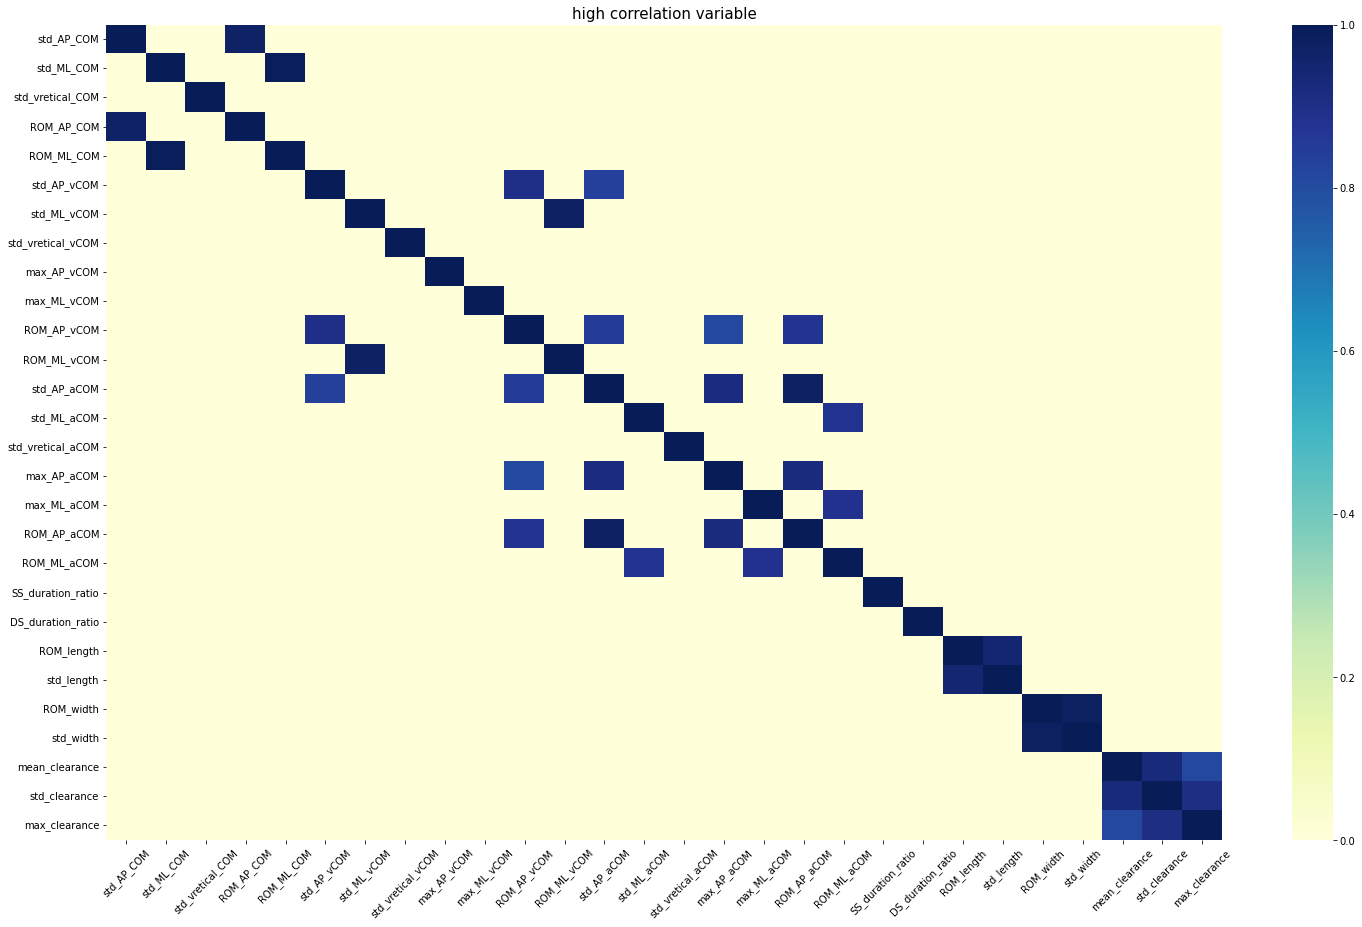

In [405]:
import seaborn as sns

fig = plt.figure(figsize = (25,15))
sns.heatmap(high_corr_df, cmap="YlGnBu")
plt.xticks(rotation = 45)
plt.title('high correlation variable', fontsize = 15)

In [406]:
corr_df = COP_clear_df.corr()
high_corr_df = corr_df[corr_df > 0.9].fillna(0)
mid_corr_df_1 = corr_df[corr_df < 0.9]
mid_corr_df = mid_corr_df_1[corr_df > 0.5].fillna(0)
low_corr_df = corr_df[corr_df < 0.5].fillna(0)

Text(0.5, 1.0, 'high correlation variable')

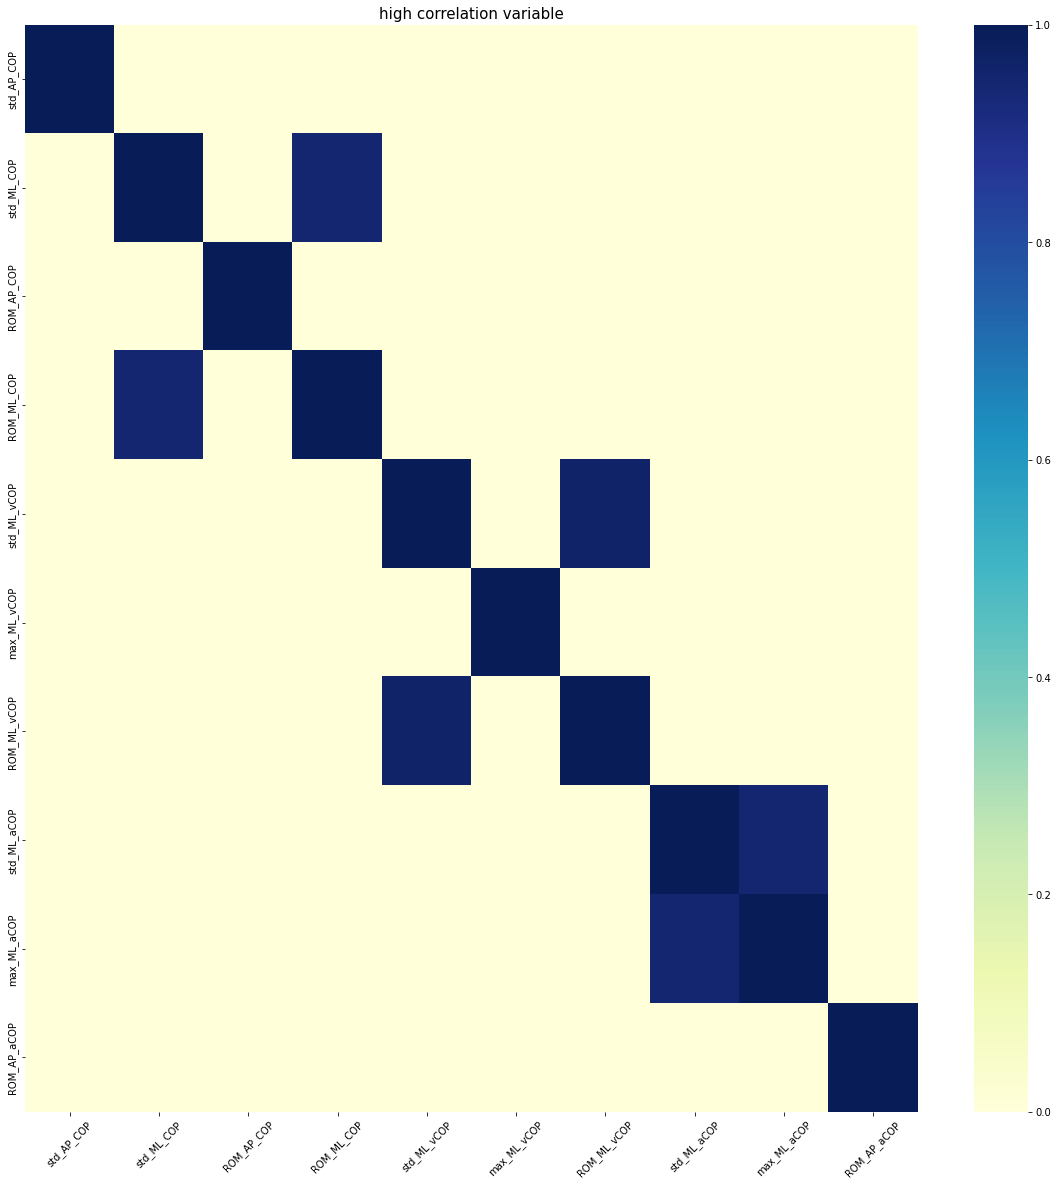

In [407]:
import seaborn as sns

fig = plt.figure(figsize = (20,20))
sns.heatmap(high_corr_df, cmap="YlGnBu")
plt.xticks(rotation = 45)
plt.title('high correlation variable', fontsize = 15)

In [408]:
corr_df = advanced_clear_df.corr()
high_corr_df = corr_df[corr_df > 0.9].fillna(0)
mid_corr_df_1 = corr_df[corr_df < 0.9]
mid_corr_df = mid_corr_df_1[corr_df > 0.5].fillna(0)
low_corr_df = corr_df[corr_df < 0.5].fillna(0)

Text(0.5, 1.0, 'high correlation variable')

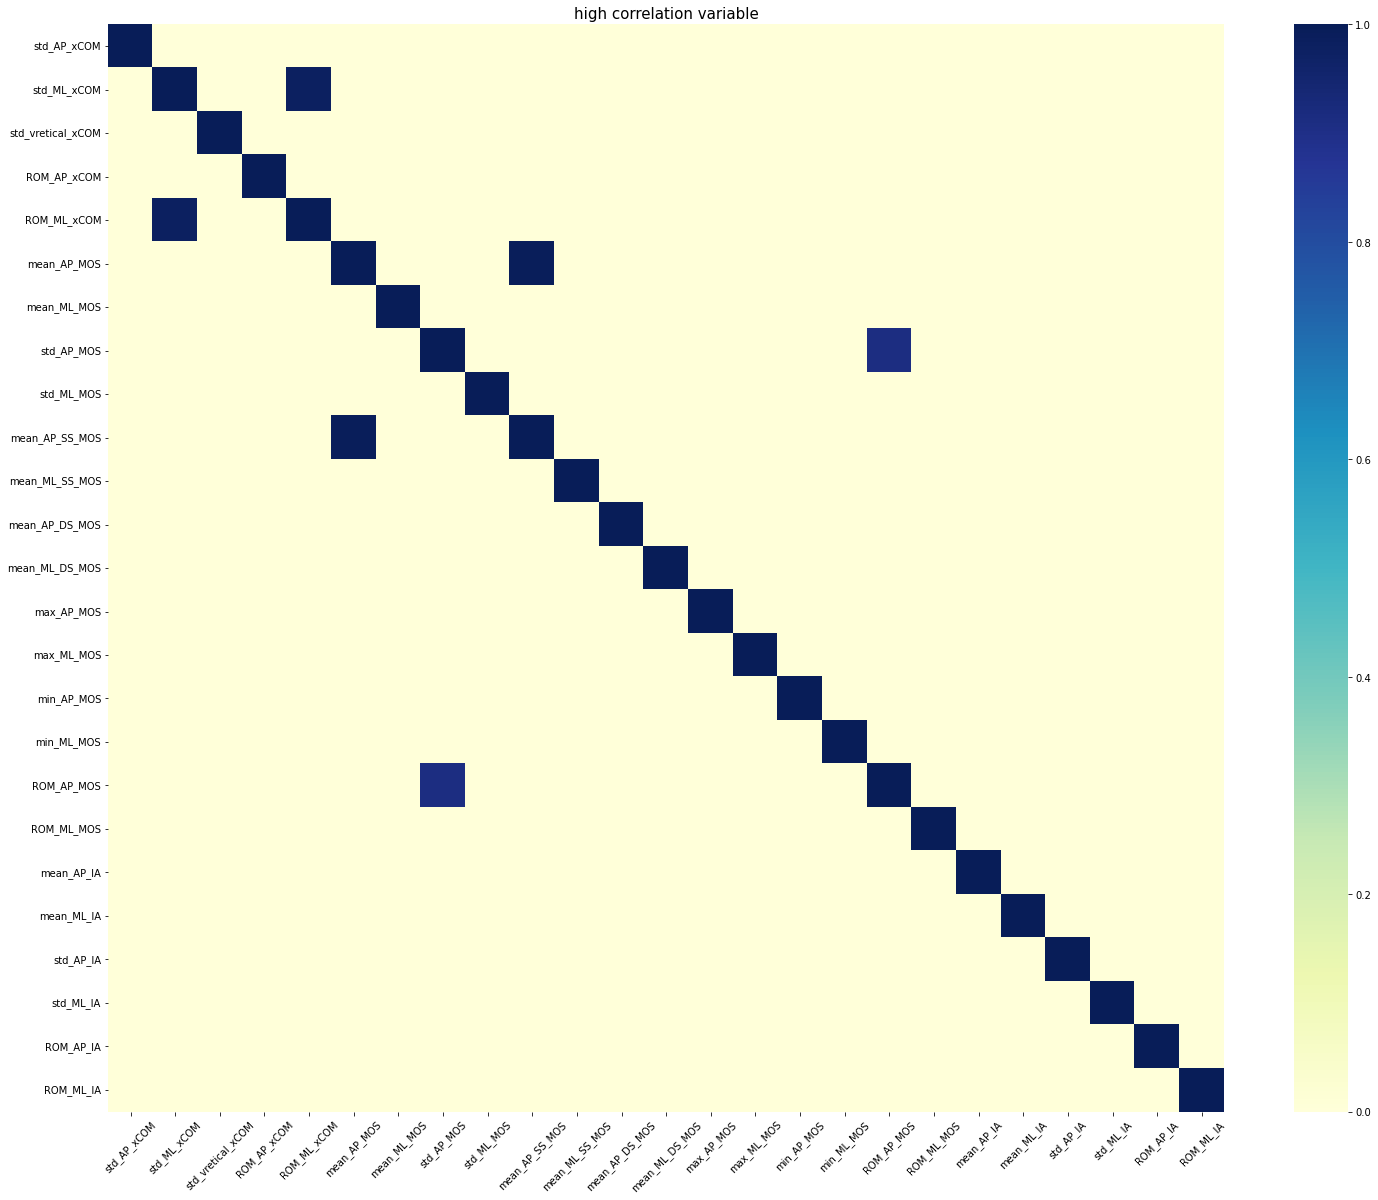

In [409]:
import seaborn as sns

fig = plt.figure(figsize = (25,20))
sns.heatmap(high_corr_df, cmap="YlGnBu")
plt.xticks(rotation = 45)
plt.title('high correlation variable', fontsize = 15)

In [410]:
all_clear_corr_df = df_without_outlier[['std_AP_COM', 'std_ML_COM', 'std_vretical_COM', 'std_AP_vCOM', 'std_ML_vCOM', 'std_vretical_vCOM',
       'max_AP_vCOM', 'max_ML_vCOM', 'std_vretical_aCOM', 'max_ML_aCOM', 'max_AP_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'std_length', 'std_width', 'max_clearance', 'std_AP_COP', 'std_ML_COP', 'std_ML_vCOP', 'max_ML_vCOP', 'std_AP_vCOP', 'max_AP_vCOP',
        'std_AP_aCOP','std_ML_aCOP', 'std_AP_xCOM', 'std_ML_xCOM', 'std_vretical_xCOM', 'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_ML_SS_MOS', 'mean_ML_DS_MOS', 'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_ML_MOS', 'mean_AP_IA', 'mean_ML_IA', 'std_AP_IA', 'std_ML_IA','target_performance']]

spatiotemporal_clear_corr_df = df_without_outlier[['std_AP_COM', 'std_ML_COM', 'std_vretical_COM', 'std_AP_vCOM', 'std_ML_vCOM', 'std_vretical_vCOM',
       'max_AP_vCOM', 'max_ML_vCOM', 'std_vretical_aCOM', 'max_ML_aCOM', 'max_AP_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'std_length', 'std_width', 'max_clearance', 'target_performance'
       ]]

COP_clear_corr_df = df_without_outlier[['std_AP_COP', 'std_ML_COP', 'std_ML_vCOP', 'max_ML_vCOP', 'std_AP_vCOP', 'max_AP_vCOP',
        'std_AP_aCOP','std_ML_aCOP', 'target_performance'
       ]]

advanced_clear_corr_df = df_without_outlier[['std_AP_xCOM',
       'std_ML_xCOM', 'std_vretical_xCOM', 'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_ML_SS_MOS', 'mean_ML_DS_MOS', 'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_ML_MOS', 'mean_AP_IA', 'mean_ML_IA', 'std_AP_IA', 'std_ML_IA',
       'target_performance'
       ]]
spa_cop_corr_df = df_without_outlier[['std_AP_COM', 'std_ML_COM', 'std_vretical_COM', 'std_AP_vCOM', 'std_ML_vCOM', 'std_vretical_vCOM',
       'max_AP_vCOM', 'max_ML_vCOM', 'std_vretical_aCOM', 'max_ML_aCOM', 'max_AP_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'std_length', 'std_width', 'max_clearance', 'std_AP_COP', 'std_ML_COP', 'std_ML_vCOP', 'max_ML_vCOP', 'std_AP_vCOP', 'max_AP_vCOP',
        'std_AP_aCOP','std_ML_aCOP','target_performance'
       ]]
spa_adv_corr_df = df_without_outlier[['std_AP_COM', 'std_ML_COM', 'std_vretical_COM', 'std_AP_vCOM', 'std_ML_vCOM', 'std_vretical_vCOM',
       'max_AP_vCOM', 'max_ML_vCOM', 'std_vretical_aCOM', 'max_ML_aCOM', 'max_AP_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'std_length', 'std_width', 'max_clearance', 'std_AP_xCOM',
       'std_ML_xCOM', 'std_vretical_xCOM', 'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_ML_SS_MOS', 'mean_ML_DS_MOS', 'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_ML_MOS', 'mean_AP_IA', 'mean_ML_IA', 'std_AP_IA', 'std_ML_IA', 'target_performance'
       ]]
cop_adv_corr_df = df_without_outlier[['std_AP_COP', 'std_ML_COP', 'std_ML_vCOP', 'max_ML_vCOP', 'std_AP_vCOP', 'max_AP_vCOP',
        'std_AP_aCOP','std_ML_aCOP', 'std_AP_xCOM',
       'std_ML_xCOM', 'std_vretical_xCOM', 'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_ML_SS_MOS', 'mean_ML_DS_MOS', 'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_ML_MOS', 'mean_AP_IA', 'mean_ML_IA', 'std_AP_IA', 'std_ML_IA','target_performance'
       ]]
kinematic_corr_df = df_without_outlier[['std_AP_COM', 'std_ML_COM', 'std_vretical_COM', 'std_AP_vCOM', 'std_ML_vCOM', 'std_vretical_vCOM',
       'max_AP_vCOM', 'max_ML_vCOM', 'std_vretical_aCOM', 'max_ML_aCOM', 'max_AP_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'std_length', 'std_width', 'max_clearance', 'std_AP_xCOM', 'std_ML_xCOM', 'std_vretical_xCOM', 'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_ML_SS_MOS', 'mean_ML_DS_MOS', 'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_ML_MOS','target_performance']]
non_kinematic_corr_df = df_without_outlier[['std_AP_COP', 'std_ML_COP', 'std_ML_vCOP', 'max_ML_vCOP', 'std_AP_vCOP', 'max_AP_vCOP',
        'std_AP_aCOP','std_ML_aCOP', 'std_AP_xCOM', 'std_ML_xCOM', 'std_vretical_xCOM', 'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_ML_SS_MOS', 'mean_ML_DS_MOS', 'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_ML_MOS', 'target_performance'
       ]]

Text(0.5, 1.0, 'high correlation variable')

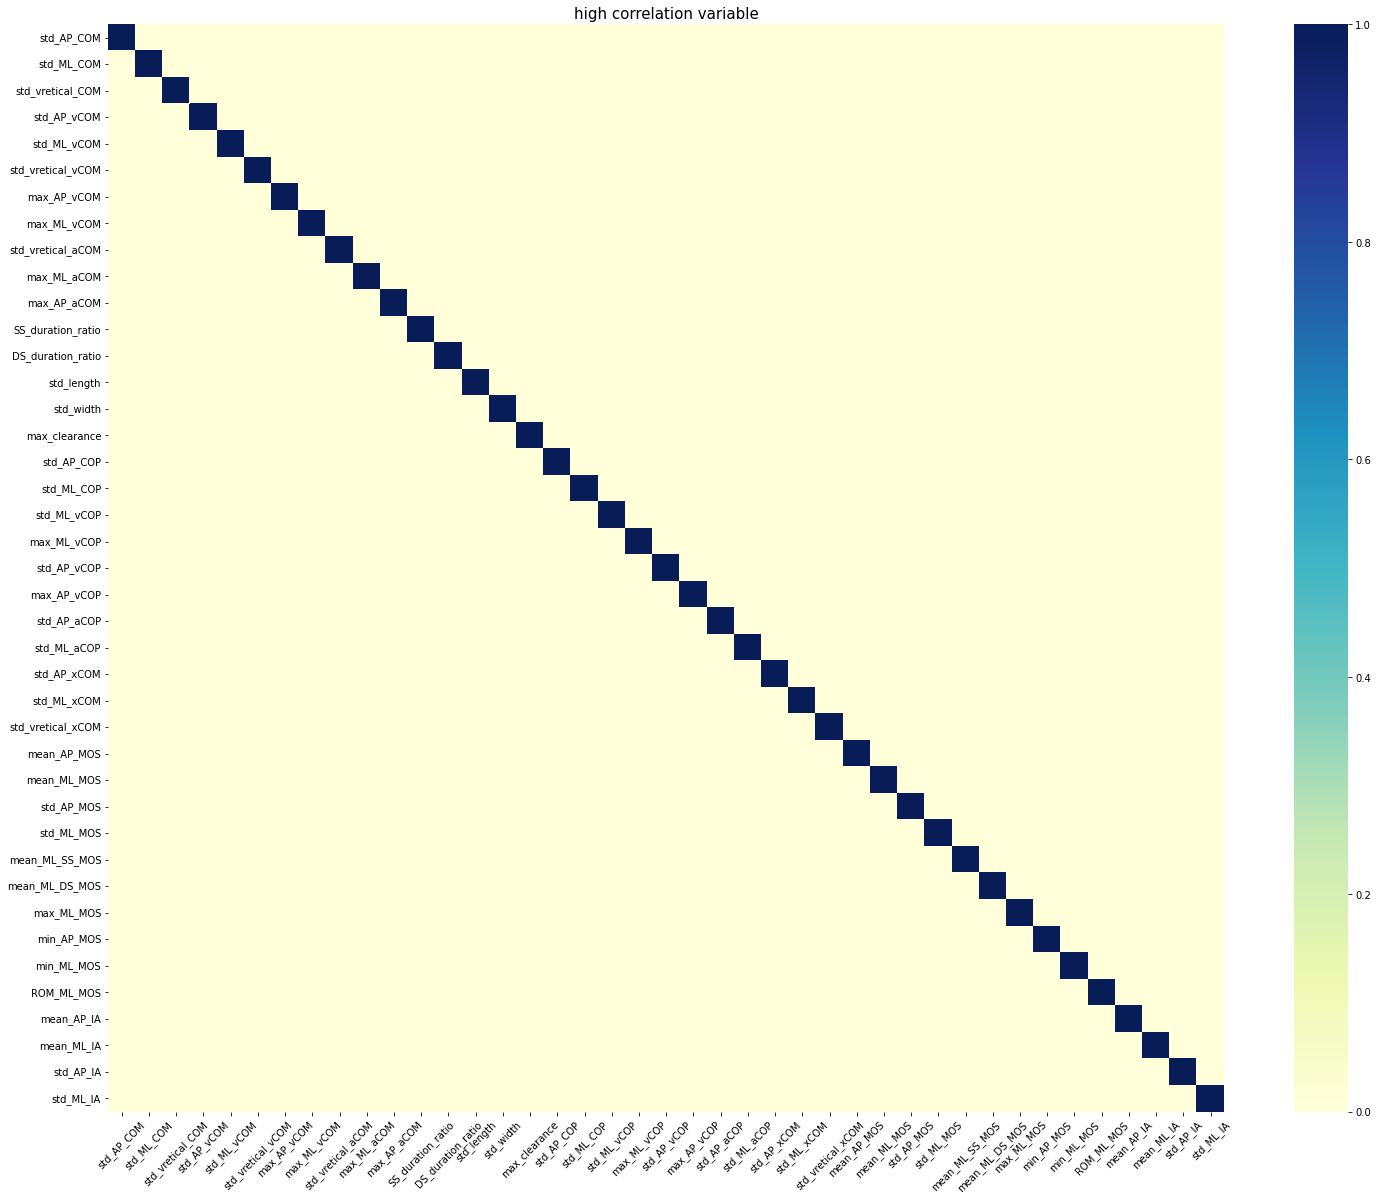

In [411]:
corr_df = all_clear_corr_df.corr()
high_corr_df = corr_df[corr_df > 0.9].fillna(0)
mid_corr_df_1 = corr_df[corr_df < 0.9]
mid_corr_df = mid_corr_df_1[corr_df > 0.5].fillna(0)
low_corr_df = corr_df[corr_df < 0.5].fillna(0)

fig = plt.figure(figsize = (25,20))
sns.heatmap(high_corr_df, cmap="YlGnBu")
plt.xticks(rotation = 45)
plt.title('high correlation variable', fontsize = 15)

C:\Users\a1003\anaconda3\envs\py3-TF2.0\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<AxesSubplot:title={'center':'std_AP_COM'}>,
        <AxesSubplot:title={'center':'std_ML_COM'}>,
        <AxesSubplot:title={'center':'std_vretical_COM'}>,
        <AxesSubplot:title={'center':'std_AP_vCOM'}>],
       [<AxesSubplot:title={'center':'std_ML_vCOM'}>,
        <AxesSubplot:title={'center':'std_vretical_vCOM'}>,
        <AxesSubplot:title={'center':'max_AP_vCOM'}>,
        <AxesSubplot:title={'center':'max_ML_vCOM'}>],
       [<AxesSubplot:title={'center':'std_vretical_aCOM'}>,
        <AxesSubplot:title={'center':'max_ML_aCOM'}>,
        <AxesSubplot:title={'center':'max_AP_aCOM'}>,
        <AxesSubplot:title={'center':'SS_duration_ratio'}>],
       [<AxesSubplot:title={'center':'DS_duration_ratio'}>,
        <AxesSubplot:title={'center':'std_length'}>,
        <AxesSubplot:title={'center':'std_width'}>,
        <AxesSubplot:title={'center':'max_clearance'}>]], dtype=object)

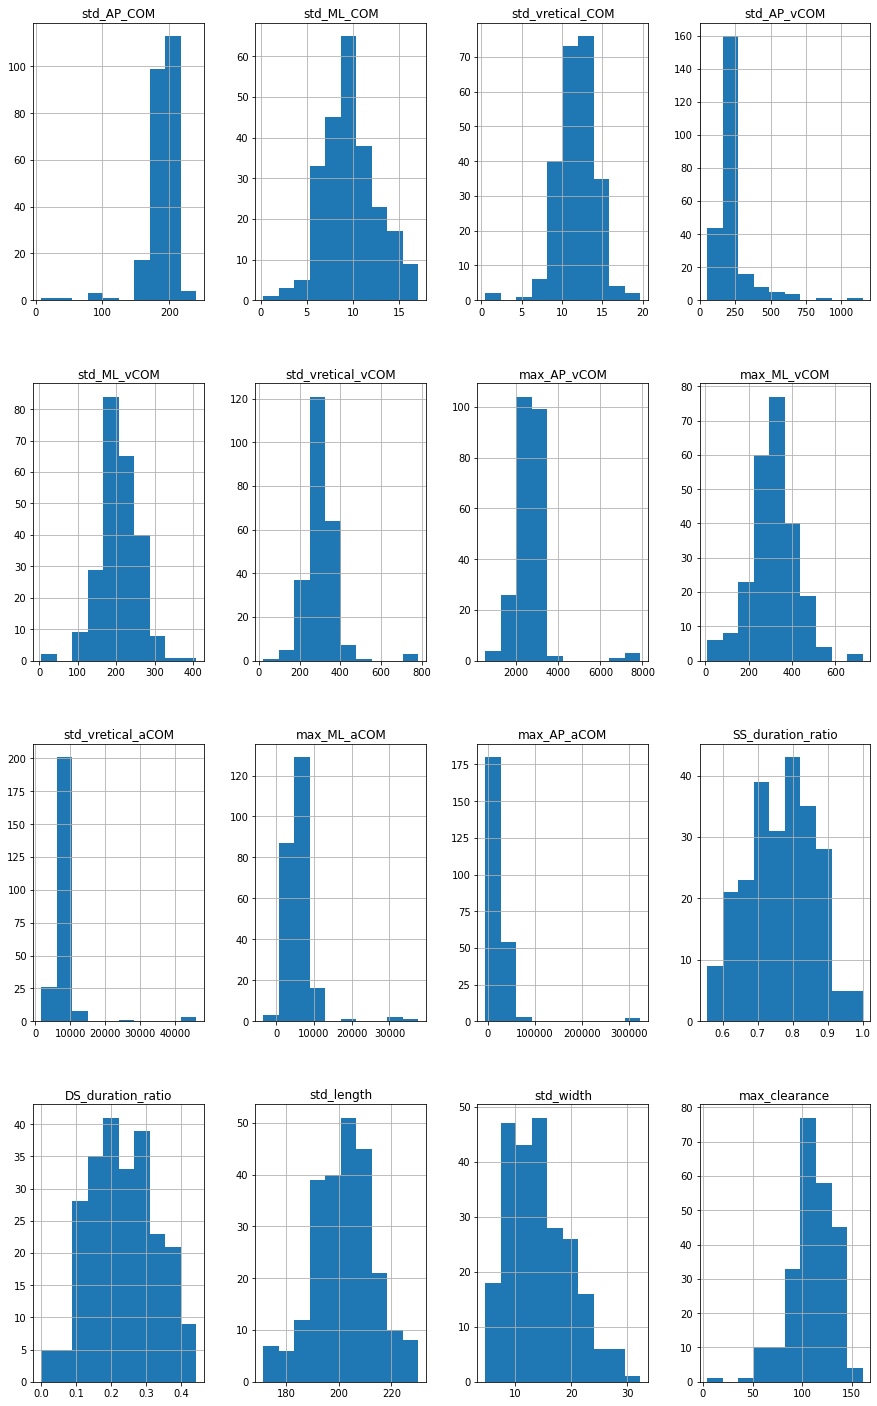

In [412]:
fig = plt.figure(figsize = (15,25))
ax = fig.gca()
spatiotemporal_clear_corr_df.hist(ax = ax)

In [413]:
spatiotemporal_clear_corr_df.groupby("target_performance").describe().SS_duration_ratio

count      mean       std      min       25%       50%  \
target_performance                                                           
Bad                  58.0  0.790150  0.086922  0.64706  0.725532  0.771225   
Good                 75.0  0.756755  0.095380  0.57895  0.666670  0.769910   
Moderate            106.0  0.760111  0.099306  0.55556  0.685573  0.772810   

                         75%      max  
target_performance                     
Bad                 0.848795  1.00000  
Good                0.827255  0.97030  
Moderate            0.837770  0.94444

## Data processing

In [414]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [415]:
scaler = StandardScaler()
desired_dataset = all_clear_corr_df

In [416]:
input_df = desired_dataset.iloc[:,0:-1]
target_df = desired_dataset["target_performance"]

In [417]:
inputs = scaler.fit_transform(input_df)
targets = np.array(target_df)

In [418]:
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.3, random_state=42)

In [419]:
x_train.shape

(167, 41)

In [420]:
[uni_name, count] = np.unique(y_train, return_counts=True)
print("Training dataset: " + "\n" + uni_name[0] + " "  + str(count[0]) + "\n" + uni_name[1] + " "  + str(count[1]) + "\n" + uni_name[2] + " "  + str(count[2]) )

Training dataset: 
Bad 45
Good 52
Moderate 70


In [421]:
[uni_name, count] = np.unique(y_test, return_counts=True)
print("Testing dataset: " + "\n" + uni_name[0] + " "  + str(count[0]) + "\n" + uni_name[1] + " "  + str(count[1]) + "\n" + uni_name[2] + " "  + str(count[2]) )

Testing dataset: 
Bad 13
Good 23
Moderate 36


In [422]:
a = ['std_AP_COM', 'std_ML_COM', 'std_vretical_COM', 'std_AP_vCOM', 'std_ML_vCOM', 'std_vretical_vCOM',
       'max_AP_vCOM', 'max_ML_vCOM', 'std_vretical_aCOM', 'max_ML_aCOM', 'max_AP_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'std_length', 'std_width', 'max_clearance', 'std_AP_COP', 'std_ML_COP', 'std_ML_vCOP', 'max_ML_vCOP', 'std_AP_vCOP', 'max_AP_vCOP',
        'std_AP_aCOP','std_ML_aCOP', 'std_AP_xCOM', 'std_ML_xCOM', 'std_vretical_xCOM', 'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_ML_SS_MOS', 'mean_ML_DS_MOS', 'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_ML_MOS', 'mean_AP_IA', 'mean_ML_IA', 'std_AP_IA', 'std_ML_IA','target_performance']
spa_para = list(range(0, 16))
cop_para = list(range(16, 24))
advanced = list(range(24, 41))
spa_cop = spa_para + cop_para
spa_adv = spa_para + advanced
cop_adv = cop_para + advanced
kine_para = spa_para + list(range(24,37))
non_kine_para = cop_para + list(range(37,41))

In [423]:
input_df.columns[37:41]

Index(['mean_AP_IA', 'mean_ML_IA', 'std_AP_IA', 'std_ML_IA'], dtype='object')

In [424]:
all_input_df = input_df
all_input_df.columns = ['std_AP_COM', 'std_ML_COM', 'std_vertical_COM', 'std_AP_vCOM',
       'std_ML_vCOM', 'std_vertical_vCOM', 'max_AP_vCOM', 'max_ML_vCOM',
       'std_vertical_aCOM', 'max_ML_aCOM', 'max_AP_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'std_length', 'std_width', 'max_clearance',
       'std_AP_COP', 'std_ML_COP', 'std_ML_vCOP', 'max_ML_vCOP', 'std_AP_vCOP',
       'max_AP_vCOP', 'std_AP_aCOP', 'std_ML_aCOP', 'std_AP_xCOM',
       'std_ML_xCOM', 'std_vertical_xCOM', 'mean_AP_MOS', 'mean_ML_MOS',
       'std_AP_MOS', 'std_ML_MOS', 'mean_ML_SS_MOS', 'mean_ML_DS_MOS',
       'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_ML_MOS', 'mean_AP_IA',
       'mean_ML_IA', 'std_AP_IA', 'std_ML_IA']
spa_input_df = input_df.iloc[:,spa_para]
cop_input_df = input_df.iloc[:,cop_para]
adv_input_df = input_df.iloc[:,advanced]
spa_cop_input_df = input_df.iloc[:,spa_cop]
spa_adv_input_df = input_df.iloc[:,spa_adv]
cop_adv_input_df = input_df.iloc[:,cop_adv]
kine_input_df = input_df.iloc[:,kine_para]
non_kine_input_df = input_df.iloc[:,non_kine_para]

all_x_train = x_train
spa_x_train = x_train[:,spa_para]
cop_x_train = x_train[:,cop_para]
adv_x_train = x_train[:,advanced]
spa_cop_x_train = x_train[:,spa_cop]
spa_adv_x_train = x_train[:,spa_adv]
cop_adv_x_train = x_train[:,cop_adv]
kine_x_train = x_train[:,kine_para]
non_kine_x_train = x_train[:,non_kine_para]

all_x_test = x_test
spa_x_test = x_test[:,spa_para]
cop_x_test = x_test[:,cop_para]
adv_x_test = x_test[:,advanced]
spa_cop_x_test = x_test[:,spa_cop]
spa_adv_x_test = x_test[:,spa_adv]
cop_adv_x_test = x_test[:,cop_adv]
kine_x_test = x_test[:,kine_para]
non_kine_x_test = x_test[:,non_kine_para]

In [425]:
cop_adv_x_train.shape

(167, 25)

## Model training

In [426]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

SVC_reg = SVC()
DT_reg = DecisionTreeClassifier()
Log_reg = LogisticRegression()
RF_reg = RandomForestClassifier()

In [427]:
from sklearn.model_selection import GridSearchCV

SVC_para = {
    "C":[1,1.2,2,2.5,3],
    "kernel":['linear', 'poly', 'rbf', 'sigmoid'],
    "degree":[2,3,4,5],
    "probability":[True]
}

DT_para = {
    "criterion": ["gini", "entropy"],
    'max_depth': [1,2,3,4,5], 
    'max_leaf_nodes': [8,9,10,15]
}

Log_para = {
    "penalty": ['l2', 'none'],
    "C":[1,1.2,2,2.5,3],
    "max_iter":[200, 300, 400],
    "solver":['lbfgs']
}

RF_para = {
    'criterion': ['gini', 'entropy'], 
    'max_depth': [1,2,3], 
    'max_leaf_nodes': [8,9,10,15], 
    'n_estimators': [ 100, 200, 300]
}


### All features

In [428]:
all_SVC_grid_search = GridSearchCV(SVC_reg, param_grid = SVC_para, cv = 10, return_train_score = True)
all_SVC_grid_search.fit(all_x_train, y_train.ravel())
all_SVC_grid_search.best_params_

{'C': 3, 'degree': 2, 'kernel': 'rbf', 'probability': True}

In [429]:
all_DT_grid_search = GridSearchCV(DT_reg, param_grid = DT_para, cv = 10, return_train_score = True)
all_DT_grid_search.fit(all_x_train, y_train)
all_DT_grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'max_leaf_nodes': 8}

In [430]:
all_RF_grid_search = GridSearchCV(RF_reg, param_grid = RF_para, cv = 10, return_train_score = True)
all_RF_grid_search.fit(all_x_train, y_train)
all_RF_grid_search.best_params_

{'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 9, 'n_estimators': 300}

In [431]:
all_SVC_best_reg = all_SVC_grid_search.best_estimator_
all_DT_best_reg = all_DT_grid_search.best_estimator_
all_RF_best_reg = all_RF_grid_search.best_estimator_

In [432]:
all_SVC_best_reg.score(all_x_test, y_test.ravel())

0.8333333333333334

In [433]:
all_DT_best_reg.score(all_x_test, y_test.ravel())

0.8055555555555556

In [434]:
all_RF_best_reg.score(all_x_test, y_test.ravel())

0.7916666666666666

[Text(1140.8000000000002, 2092.8599999999997, 'mean_AP_MOS <= 0.434\nentropy = 1.56\nsamples = 167\nvalue = [45, 52, 70]\nclass = Bad'),
 Text(570.4000000000001, 1712.34, 'std_length <= -0.083\nentropy = 0.969\nsamples = 98\nvalue = [2, 26, 70]\nclass = Bad'),
 Text(285.20000000000005, 1331.82, 'entropy = 0.0\nsamples = 52\nvalue = [0, 0, 52]\nclass = Bad'),
 Text(855.6000000000001, 1331.82, 'mean_ML_SS_MOS <= -1.059\nentropy = 1.192\nsamples = 46\nvalue = [2, 26, 18]\nclass = Moderate'),
 Text(570.4000000000001, 951.3, 'entropy = 0.863\nsamples = 7\nvalue = [2, 0, 5]\nclass = Bad'),
 Text(1140.8000000000002, 951.3, 'std_vertical_COM <= 0.738\nentropy = 0.918\nsamples = 39\nvalue = [0, 26, 13]\nclass = Moderate'),
 Text(855.6000000000001, 570.78, 'min_AP_MOS <= -1.685\nentropy = 0.995\nsamples = 24\nvalue = [0, 11, 13]\nclass = Bad'),
 Text(570.4000000000001, 190.26000000000022, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6, 0]\nclass = Moderate'),
 Text(1140.8000000000002, 190.2600000000

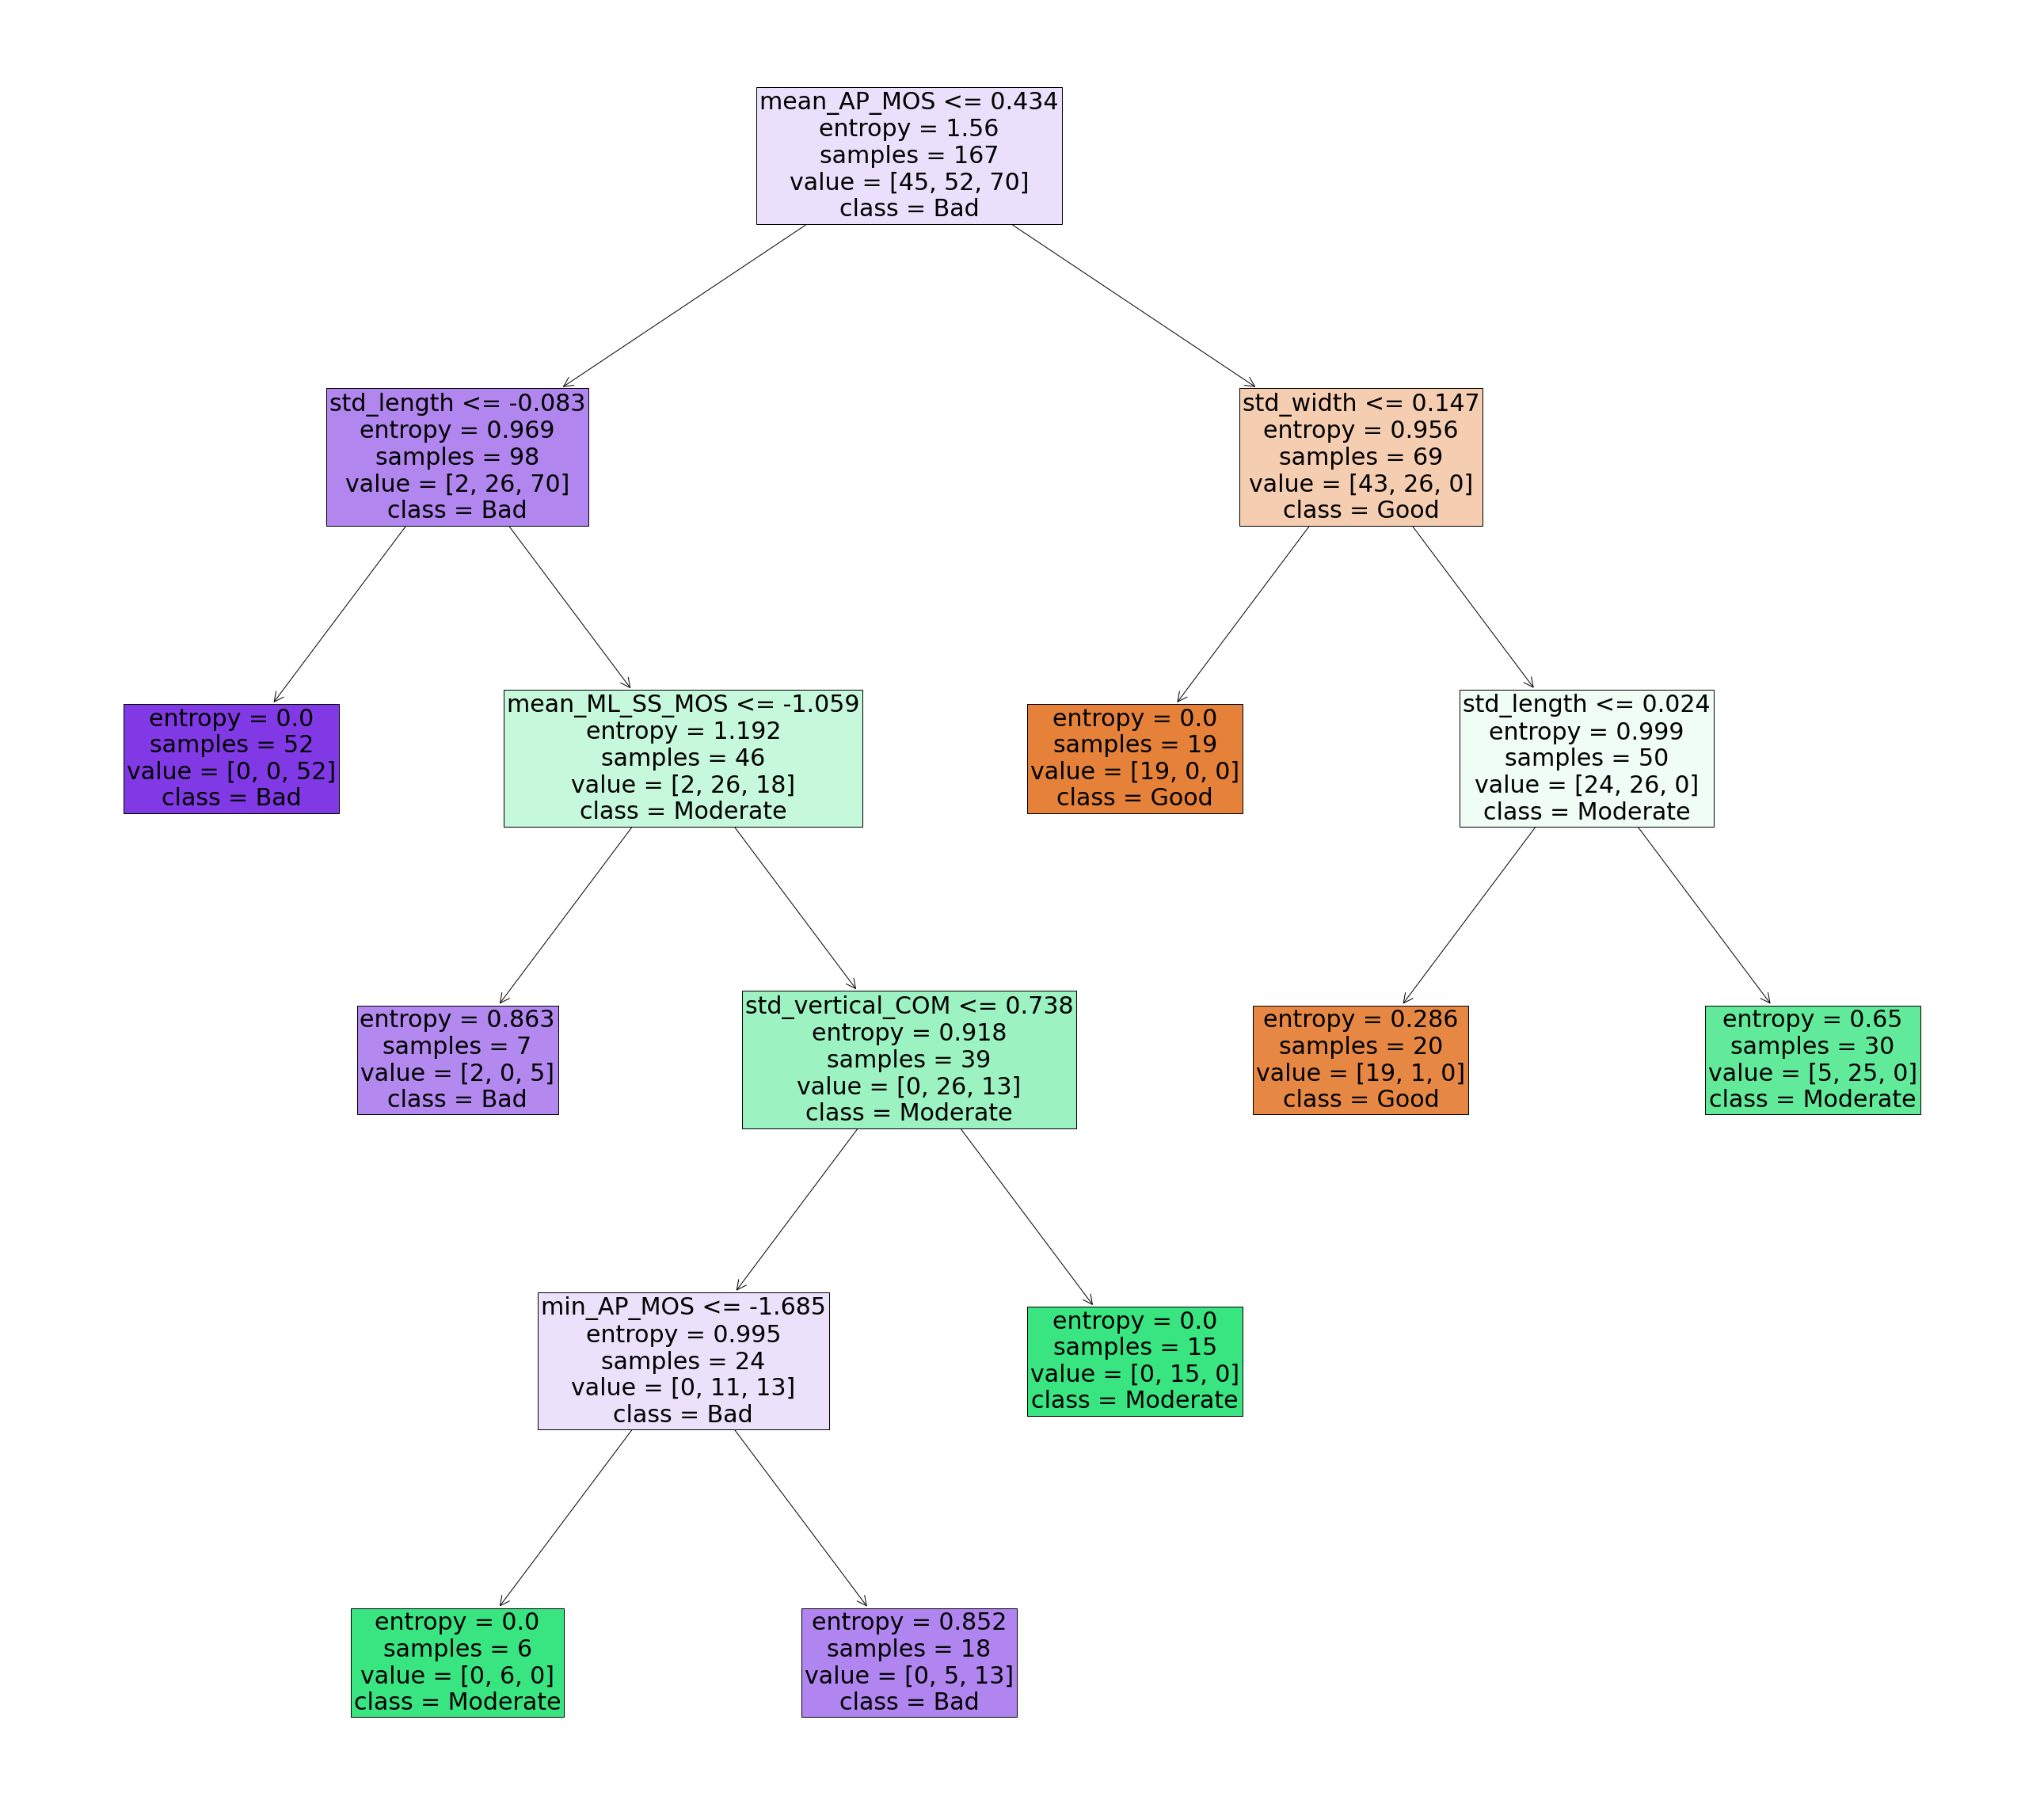

In [435]:
from sklearn import  tree
figure = plt.figure(figsize = (46,42))
tree.plot_tree(all_DT_best_reg, 
              feature_names=list(all_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
               fontsize=30, 
              filled=True)

[Text(708.2307692307693, 1189.125, 'std_length <= -0.083\ngini = 0.653\nsamples = 109\nvalue = [43, 54, 70]\nclass = Bad'),
 Text(257.53846153846155, 849.375, 'mean_ML_DS_MOS <= 0.284\ngini = 0.407\nsamples = 48\nvalue = [18, 1, 50]\nclass = Bad'),
 Text(128.76923076923077, 509.625, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 50]\nclass = Bad'),
 Text(386.3076923076923, 509.625, 'max_AP_vCOM <= 0.557\ngini = 0.1\nsamples = 15\nvalue = [18, 1, 0]\nclass = Good'),
 Text(257.53846153846155, 169.875, 'gini = 0.0\nsamples = 13\nvalue = [17, 0, 0]\nclass = Good'),
 Text(515.0769230769231, 169.875, 'gini = 0.5\nsamples = 2\nvalue = [1, 1, 0]\nclass = Good'),
 Text(1158.923076923077, 849.375, 'mean_ML_SS_MOS <= -0.084\ngini = 0.601\nsamples = 61\nvalue = [25, 53, 20]\nclass = Moderate'),
 Text(901.3846153846155, 509.625, 'std_ML_xCOM <= -0.912\ngini = 0.662\nsamples = 31\nvalue = [21, 17, 16]\nclass = Good'),
 Text(772.6153846153846, 169.875, 'gini = 0.245\nsamples = 10\nvalue = [18, 3, 0]\nclas

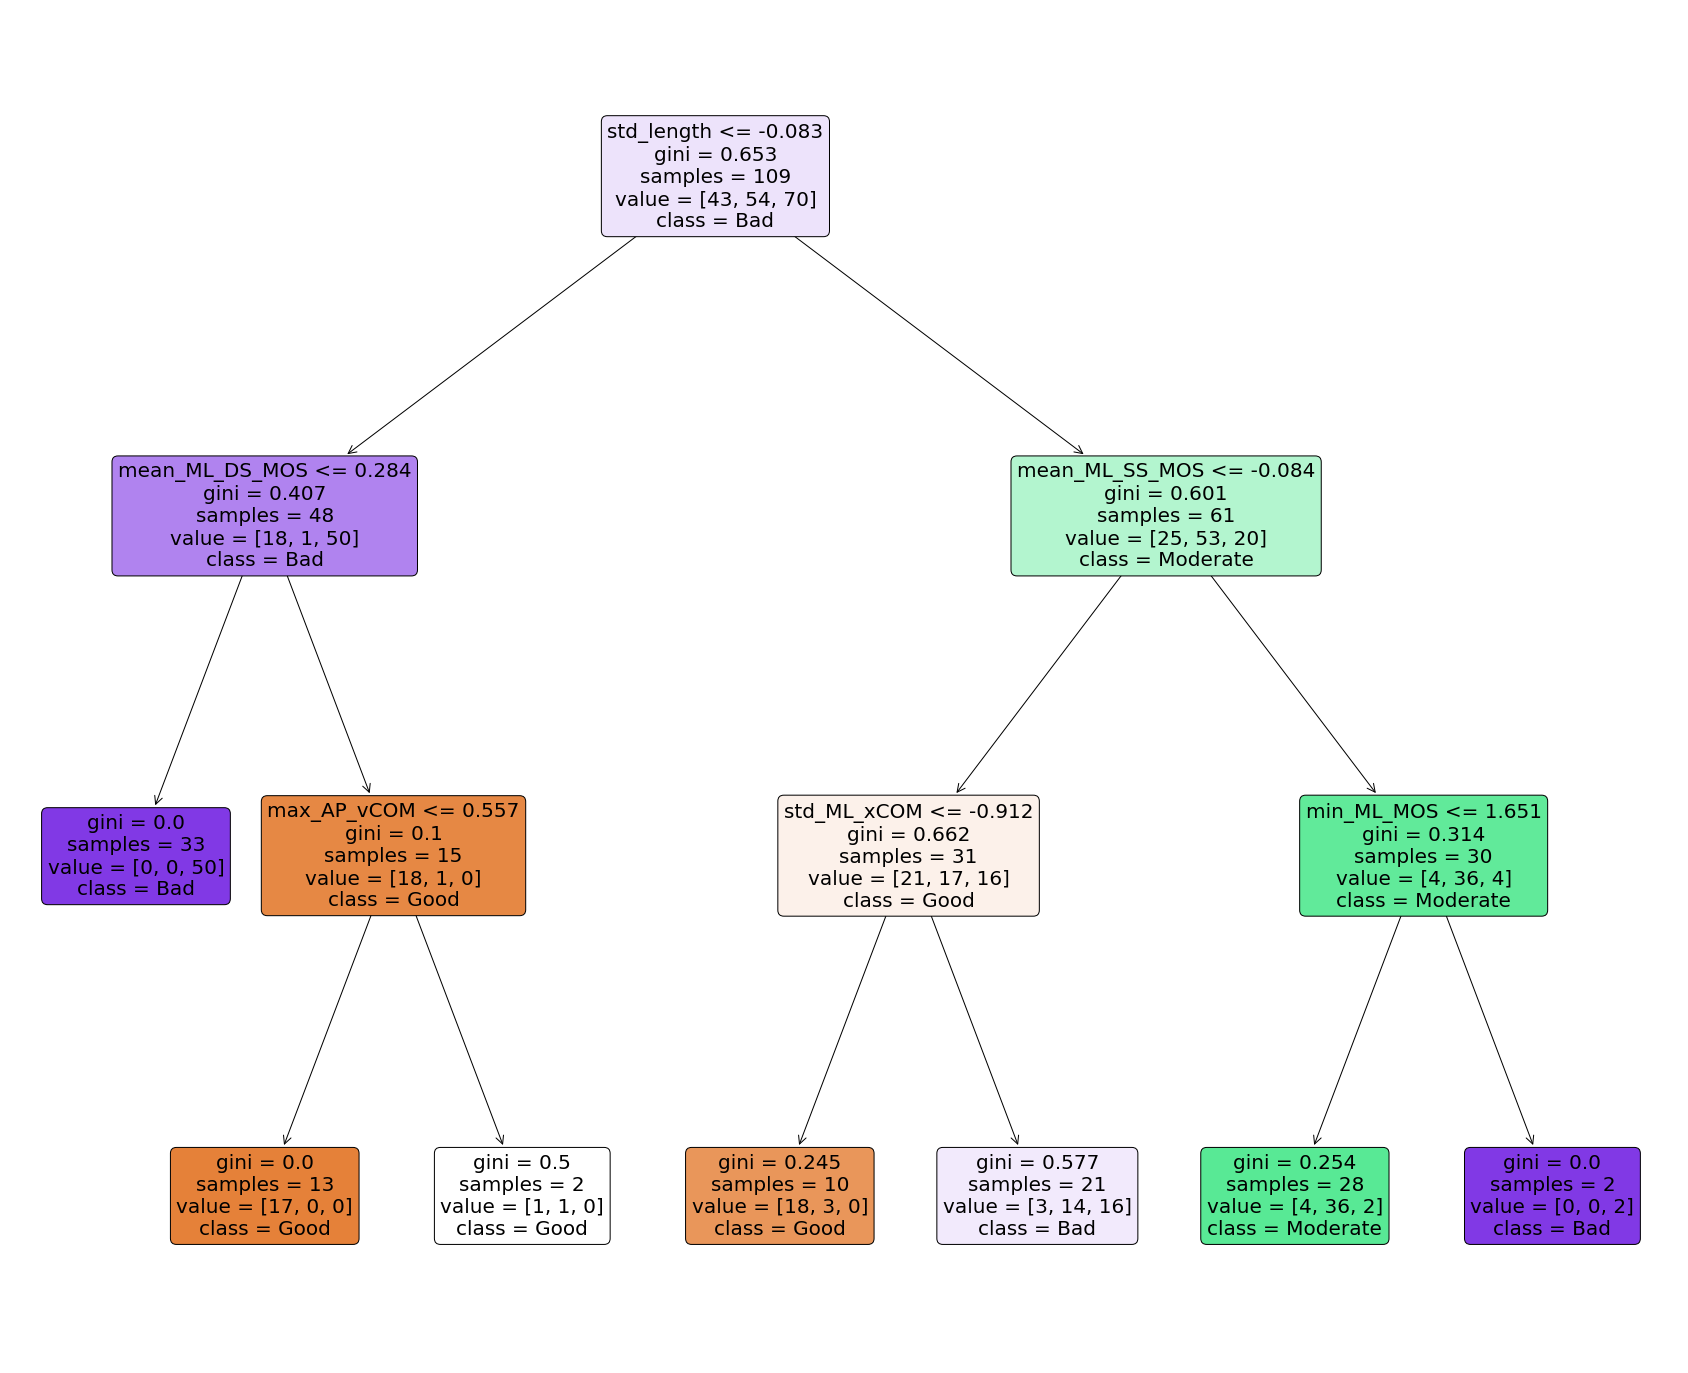

In [436]:
figure = plt.figure(figsize = (30,25))
tree.plot_tree(all_RF_best_reg.estimators_[0], 
              feature_names=list(all_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True,
              fontsize=20, 
              rounded=True)


In [437]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [438]:
acc_3_t = accuracy_score(y_test.ravel(), all_SVC_best_reg.predict(all_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), all_SVC_best_reg.predict(all_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("all SVC" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

all SVC
acc: 0.833
recall: 0.837
precision: 0.82


Text(0.5, 1.0, 'SVC confusion matrix')

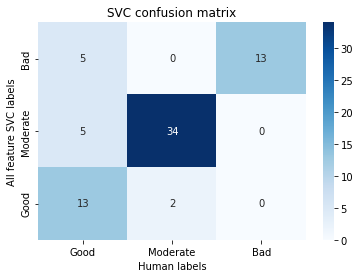

In [439]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), all_SVC_best_reg.predict(all_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), all_SVC_best_reg.predict(all_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('All feature SVC labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("SVC confusion matrix")

In [440]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("All feature SVC Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

All feature SVC Sensitivity: 
 Good prediction: 56.52173913043478 
 Moderate prediction 94.44444444444444 
 Bad prediction 100.0


In [441]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("All feature SVC Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


All feature SVC Precision: 
 Good prediction: 86.66666666666667 
 Moderate prediction 87.17948717948718 
 Bad prediction 72.22222222222221


In [442]:
acc_3_t = accuracy_score(y_test.ravel(), all_DT_best_reg.predict(all_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), all_DT_best_reg.predict(all_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("all DT" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

all DT
acc: 0.806
recall: 0.775
precision: 0.811


Text(0.5, 1.0, 'DT confusion matrix')

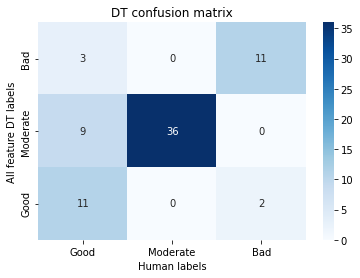

In [443]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), all_DT_best_reg.predict(all_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), all_DT_best_reg.predict(all_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('All feature DT labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("DT confusion matrix")

In [444]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("All feature DT Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

All feature DT Sensitivity: 
 Good prediction: 47.82608695652174 
 Moderate prediction 100.0 
 Bad prediction 84.61538461538461


In [445]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("All feature DT Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


All feature DT Precision: 
 Good prediction: 84.61538461538461 
 Moderate prediction 80.0 
 Bad prediction 78.57142857142857


In [446]:
acc_3_t = accuracy_score(y_test.ravel(), all_RF_best_reg.predict(all_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), all_RF_best_reg.predict(all_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("all RF" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

all RF
acc: 0.792
recall: 0.771
precision: 0.79


Text(0.5, 1.0, 'RF confusion matrix')

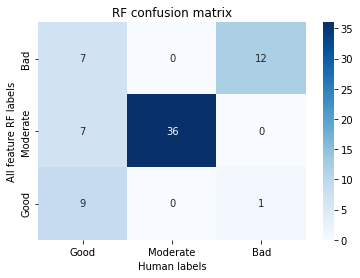

In [447]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), all_RF_best_reg.predict(all_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), all_RF_best_reg.predict(all_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('All feature RF labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("RF confusion matrix")

In [448]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("All feature RF Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

All feature RF Sensitivity: 
 Good prediction: 39.130434782608695 
 Moderate prediction 100.0 
 Bad prediction 92.3076923076923


In [449]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("All feature RF Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


All feature RF Precision: 
 Good prediction: 90.0 
 Moderate prediction 83.72093023255815 
 Bad prediction 63.1578947368421


### spatiotemporal features

In [450]:
spa_SVC_grid_search = GridSearchCV(SVC_reg, param_grid = SVC_para, cv = 10, return_train_score = True)
spa_SVC_grid_search.fit(spa_x_train, y_train.ravel())
spa_SVC_grid_search.best_params_

{'C': 2.5, 'degree': 2, 'kernel': 'rbf', 'probability': True}

In [451]:
spa_DT_grid_search = GridSearchCV(DT_reg, param_grid = DT_para, cv = 10, return_train_score = True)
spa_DT_grid_search.fit(spa_x_train, y_train)
spa_DT_grid_search.best_params_

{'criterion': 'gini', 'max_depth': 2, 'max_leaf_nodes': 8}

In [452]:
spa_RF_grid_search = GridSearchCV(RF_reg, param_grid = RF_para, cv = 10, return_train_score = True)
spa_RF_grid_search.fit(spa_x_train, y_train)
spa_RF_grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_leaf_nodes': 15,
 'n_estimators': 100}

In [453]:
spa_SVC_best_reg = spa_SVC_grid_search.best_estimator_
spa_DT_best_reg =spa_DT_grid_search.best_estimator_
spa_RF_best_reg = spa_RF_grid_search.best_estimator_

In [454]:
spa_SVC_best_reg.score(spa_x_test, y_test.ravel())

0.75

In [455]:
spa_DT_best_reg.score(spa_x_test, y_test.ravel())

0.7222222222222222

In [456]:
spa_RF_best_reg.score(spa_x_test, y_test.ravel())

0.7361111111111112

[Text(558.0, 906.0, 'std_length <= -0.083\ngini = 0.655\nsamples = 167\nvalue = [45, 52, 70]\nclass = Bad'),
 Text(279.0, 543.6, 'std_width <= 0.591\ngini = 0.433\nsamples = 75\nvalue = [22, 1, 52]\nclass = Bad'),
 Text(139.5, 181.19999999999993, 'gini = 0.153\nsamples = 48\nvalue = [4, 0, 44]\nclass = Bad'),
 Text(418.5, 181.19999999999993, 'gini = 0.466\nsamples = 27\nvalue = [18, 1, 8]\nclass = Good'),
 Text(837.0, 543.6, 'std_AP_vCOM <= 0.442\ngini = 0.592\nsamples = 92\nvalue = [23, 51, 18]\nclass = Moderate'),
 Text(697.5, 181.19999999999993, 'gini = 0.546\nsamples = 81\nvalue = [15, 50, 16]\nclass = Moderate'),
 Text(976.5, 181.19999999999993, 'gini = 0.43\nsamples = 11\nvalue = [8, 1, 2]\nclass = Good')]

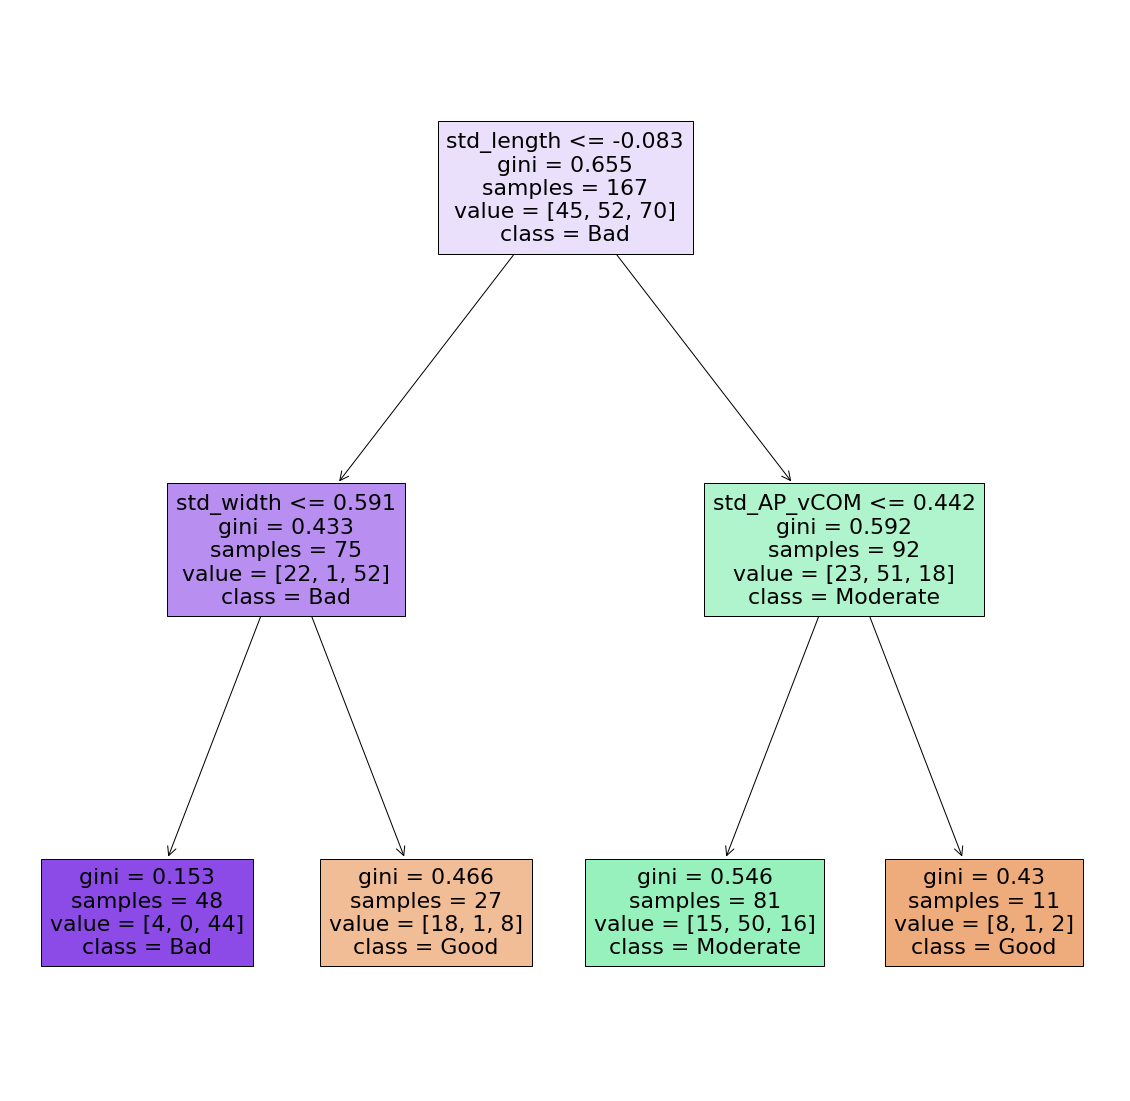

In [457]:
from sklearn import  tree
figure = plt.figure(figsize = (20,20))
tree.plot_tree(spa_DT_best_reg, 
              feature_names=list(spa_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True)

[Text(472.15384615384613, 951.3000000000001, 'std_vertical_aCOM <= -0.167\ngini = 0.665\nsamples = 103\nvalue = [53, 53, 61]\nclass = Bad'),
 Text(171.69230769230768, 679.5, 'max_AP_vCOM <= -1.183\ngini = 0.51\nsamples = 43\nvalue = [9, 15, 45]\nclass = Bad'),
 Text(85.84615384615384, 407.70000000000005, 'gini = 0.0\nsamples = 4\nvalue = [0, 7, 0]\nclass = Moderate'),
 Text(257.53846153846155, 407.70000000000005, 'std_AP_COM <= 0.286\ngini = 0.435\nsamples = 39\nvalue = [9, 8, 45]\nclass = Bad'),
 Text(171.69230769230768, 135.89999999999998, 'gini = 0.279\nsamples = 28\nvalue = [7, 1, 41]\nclass = Bad'),
 Text(343.38461538461536, 135.89999999999998, 'gini = 0.592\nsamples = 11\nvalue = [2, 7, 4]\nclass = Moderate'),
 Text(772.6153846153845, 679.5, 'std_vertical_aCOM <= 0.276\ngini = 0.621\nsamples = 60\nvalue = [44, 38, 16]\nclass = Good'),
 Text(600.9230769230769, 407.70000000000005, 'std_length <= -0.533\ngini = 0.596\nsamples = 44\nvalue = [39, 17, 15]\nclass = Good'),
 Text(515.076

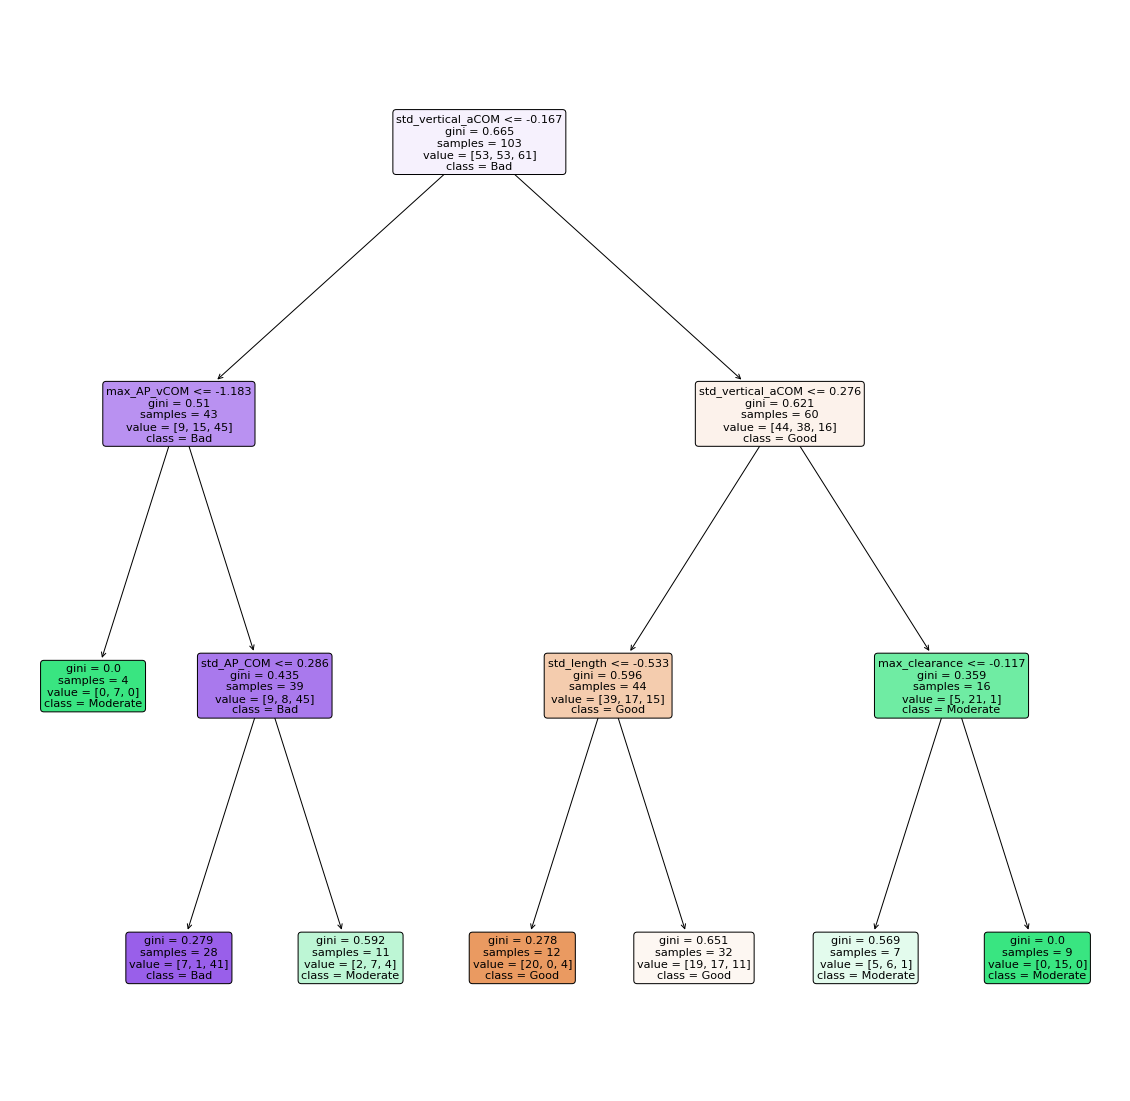

In [458]:
figure = plt.figure(figsize = (20,20))
tree.plot_tree(spa_RF_best_reg.estimators_[0], 
              feature_names=list(spa_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True,
              rounded=True)


In [459]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [460]:
acc_3_t = accuracy_score(y_test.ravel(), spa_SVC_best_reg.predict(spa_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), spa_SVC_best_reg.predict(spa_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("spatiotemporal SVC" + "\n" + "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

spatiotemporal SVC
acc: 0.75
recall: 0.672
precision: 0.697


Text(0.5, 1.0, 'SVC confusion matrix')

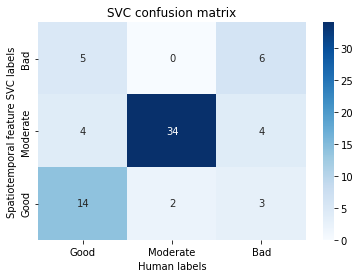

In [461]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), spa_SVC_best_reg.predict(spa_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), spa_SVC_best_reg.predict(spa_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('Spatiotemporal feature SVC labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("SVC confusion matrix")

In [462]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("Spatiotemporal feature SVC Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

Spatiotemporal feature SVC Sensitivity: 
 Good prediction: 60.86956521739131 
 Moderate prediction 94.44444444444444 
 Bad prediction 46.15384615384615


In [463]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("Spatiotemporal feature SVC Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


Spatiotemporal feature SVC Precision: 
 Good prediction: 73.68421052631578 
 Moderate prediction 80.95238095238095 
 Bad prediction 54.54545454545454


In [464]:
acc_3_t = accuracy_score(y_test.ravel(), spa_DT_best_reg.predict(spa_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), spa_DT_best_reg.predict(spa_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("spatiotemporal DT" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

spatiotemporal DT
acc: 0.722
recall: 0.674
precision: 0.675


Text(0.5, 1.0, 'DT confusion matrix')

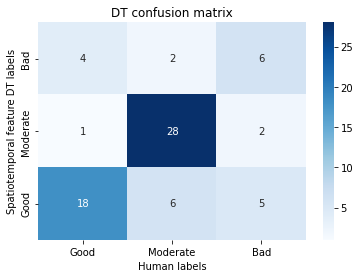

In [465]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), spa_DT_best_reg.predict(spa_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), spa_DT_best_reg.predict(spa_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('Spatiotemporal feature DT labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("DT confusion matrix")

In [466]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("Spatiotemporal feature DT Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

Spatiotemporal feature DT Sensitivity: 
 Good prediction: 78.26086956521739 
 Moderate prediction 77.77777777777779 
 Bad prediction 46.15384615384615


In [467]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("Spatiotemporal feature DT Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


Spatiotemporal feature DT Precision: 
 Good prediction: 62.06896551724138 
 Moderate prediction 90.32258064516128 
 Bad prediction 50.0


In [468]:
acc_3_t = accuracy_score(y_test.ravel(), spa_RF_best_reg.predict(spa_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), spa_RF_best_reg.predict(spa_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("spatiotemporal RF" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

spatiotemporal RF
acc: 0.736
recall: 0.645
precision: 0.684


Text(0.5, 1.0, 'RF confusion matrix')

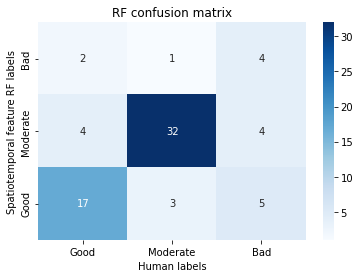

In [469]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), spa_RF_best_reg.predict(spa_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), spa_RF_best_reg.predict(spa_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('Spatiotemporal feature RF labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("RF confusion matrix")

In [470]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("Spatiotemporal feature RF Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

Spatiotemporal feature RF Sensitivity: 
 Good prediction: 73.91304347826086 
 Moderate prediction 88.88888888888889 
 Bad prediction 30.76923076923077


In [471]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("Spatiotemporal feature RF Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


Spatiotemporal feature RF Precision: 
 Good prediction: 68.0 
 Moderate prediction 80.0 
 Bad prediction 57.14285714285714


### cop features

In [472]:
COP_SVC_grid_search = GridSearchCV(SVC_reg, param_grid = SVC_para, cv = 10, return_train_score = True)
COP_SVC_grid_search.fit(cop_x_train, y_train.ravel())
COP_SVC_grid_search.best_params_

{'C': 2, 'degree': 2, 'kernel': 'linear', 'probability': True}

In [473]:
COP_DT_grid_search = GridSearchCV(DT_reg, param_grid = DT_para, cv = 10, return_train_score = True)
COP_DT_grid_search.fit(cop_x_train, y_train)
COP_DT_grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'max_leaf_nodes': 8}

In [474]:
COP_RF_grid_search = GridSearchCV(RF_reg, param_grid = RF_para, cv = 10, return_train_score = True)
COP_RF_grid_search.fit(cop_x_train, y_train)
COP_RF_grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_leaf_nodes': 15,
 'n_estimators': 100}

In [475]:
COP_SVC_best_reg = COP_SVC_grid_search.best_estimator_
COP_DT_best_reg = COP_DT_grid_search.best_estimator_
COP_RF_best_reg = COP_RF_grid_search.best_estimator_

In [476]:
COP_SVC_best_reg.score(cop_x_test, y_test.ravel())

0.6111111111111112

In [477]:
COP_DT_best_reg.score(cop_x_test, y_test.ravel())

0.6527777777777778

In [478]:
COP_RF_best_reg.score(cop_x_test, y_test.ravel())

0.625

[Text(496.0, 978.48, 'std_AP_aCOP <= -0.271\nentropy = 1.56\nsamples = 167\nvalue = [45, 52, 70]\nclass = Bad'),
 Text(248.0, 761.0400000000001, 'std_ML_vCOP <= -1.317\nentropy = 1.282\nsamples = 94\nvalue = [9, 28, 57]\nclass = Bad'),
 Text(124.0, 543.6, 'entropy = 0.881\nsamples = 10\nvalue = [3, 7, 0]\nclass = Moderate'),
 Text(372.0, 543.6, 'std_AP_COP <= -1.223\nentropy = 1.152\nsamples = 84\nvalue = [6, 21, 57]\nclass = Bad'),
 Text(248.0, 326.1600000000001, 'std_AP_COP <= -1.377\nentropy = 1.379\nsamples = 7\nvalue = [2, 4, 1]\nclass = Moderate'),
 Text(124.0, 108.72000000000003, 'entropy = 0.918\nsamples = 3\nvalue = [2, 0, 1]\nclass = Good'),
 Text(372.0, 108.72000000000003, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4, 0]\nclass = Moderate'),
 Text(496.0, 326.1600000000001, 'entropy = 1.037\nsamples = 77\nvalue = [4, 17, 56]\nclass = Bad'),
 Text(744.0, 761.0400000000001, 'std_AP_vCOP <= -0.136\nentropy = 1.474\nsamples = 73\nvalue = [36, 24, 13]\nclass = Good'),
 Text(620.0, 5

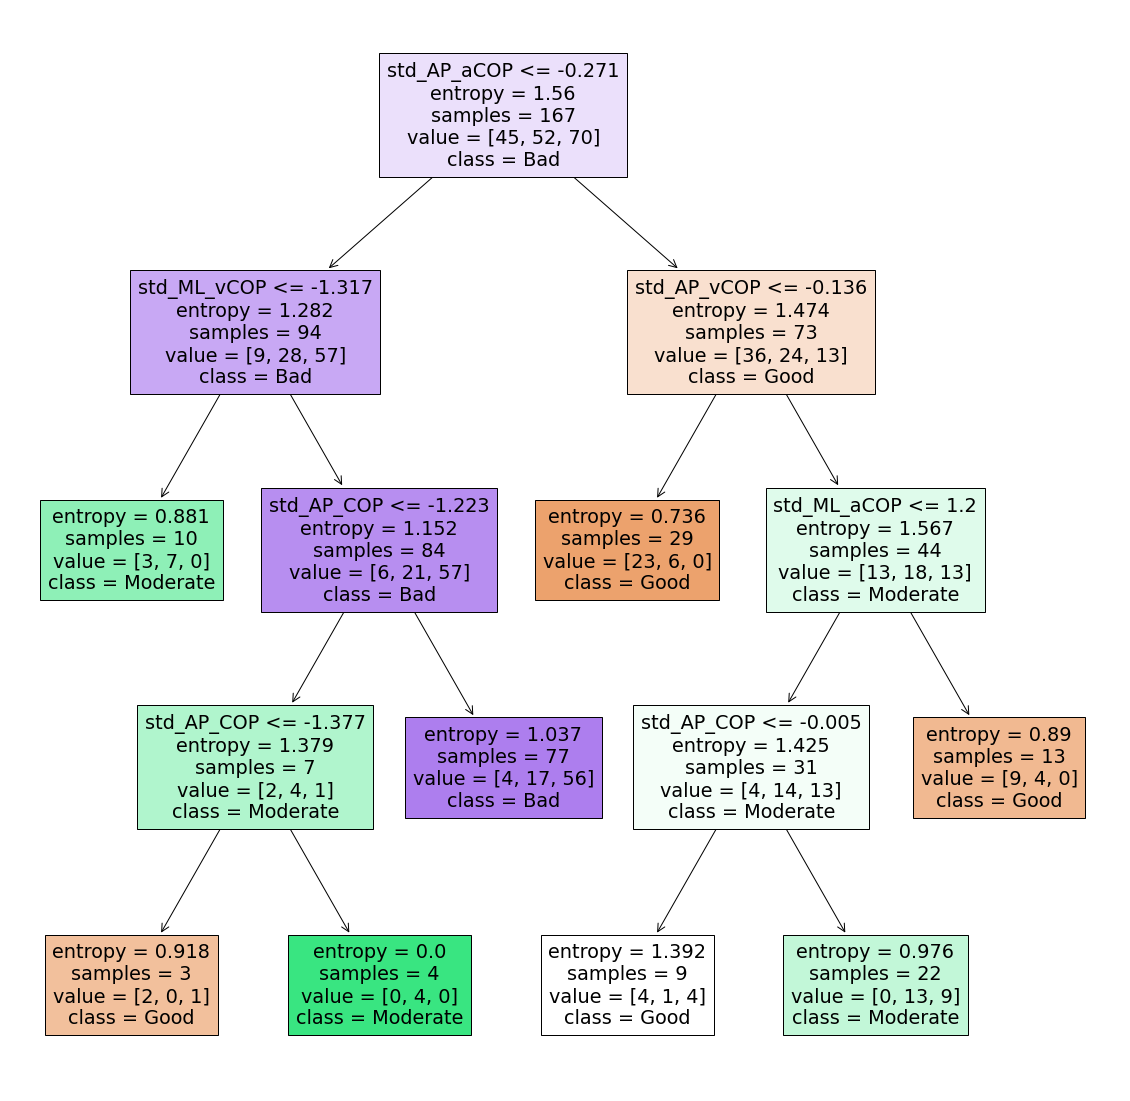

In [479]:
from sklearn import  tree
figure = plt.figure(figsize = (20,20))
tree.plot_tree(COP_DT_best_reg, 
              feature_names=list(cop_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True)

[Text(558.0, 951.3000000000001, 'std_AP_aCOP <= -0.271\ngini = 0.623\nsamples = 103\nvalue = [41, 42, 84]\nclass = Bad'),
 Text(279.0, 679.5, 'max_ML_vCOP <= -0.397\ngini = 0.494\nsamples = 60\nvalue = [8, 28, 68]\nclass = Bad'),
 Text(139.5, 407.70000000000005, 'std_ML_COP <= -0.571\ngini = 0.543\nsamples = 34\nvalue = [3, 26, 31]\nclass = Bad'),
 Text(69.75, 135.89999999999998, 'gini = 0.549\nsamples = 17\nvalue = [3, 17, 9]\nclass = Moderate'),
 Text(209.25, 135.89999999999998, 'gini = 0.412\nsamples = 17\nvalue = [0, 9, 22]\nclass = Bad'),
 Text(418.5, 407.70000000000005, 'std_ML_COP <= -0.836\ngini = 0.278\nsamples = 26\nvalue = [5, 2, 37]\nclass = Bad'),
 Text(348.75, 135.89999999999998, 'gini = 0.653\nsamples = 4\nvalue = [3, 2, 2]\nclass = Good'),
 Text(488.25, 135.89999999999998, 'gini = 0.102\nsamples = 22\nvalue = [2, 0, 35]\nclass = Bad'),
 Text(837.0, 679.5, 'std_AP_vCOP <= -0.113\ngini = 0.612\nsamples = 43\nvalue = [33, 14, 16]\nclass = Good'),
 Text(697.5, 407.700000000

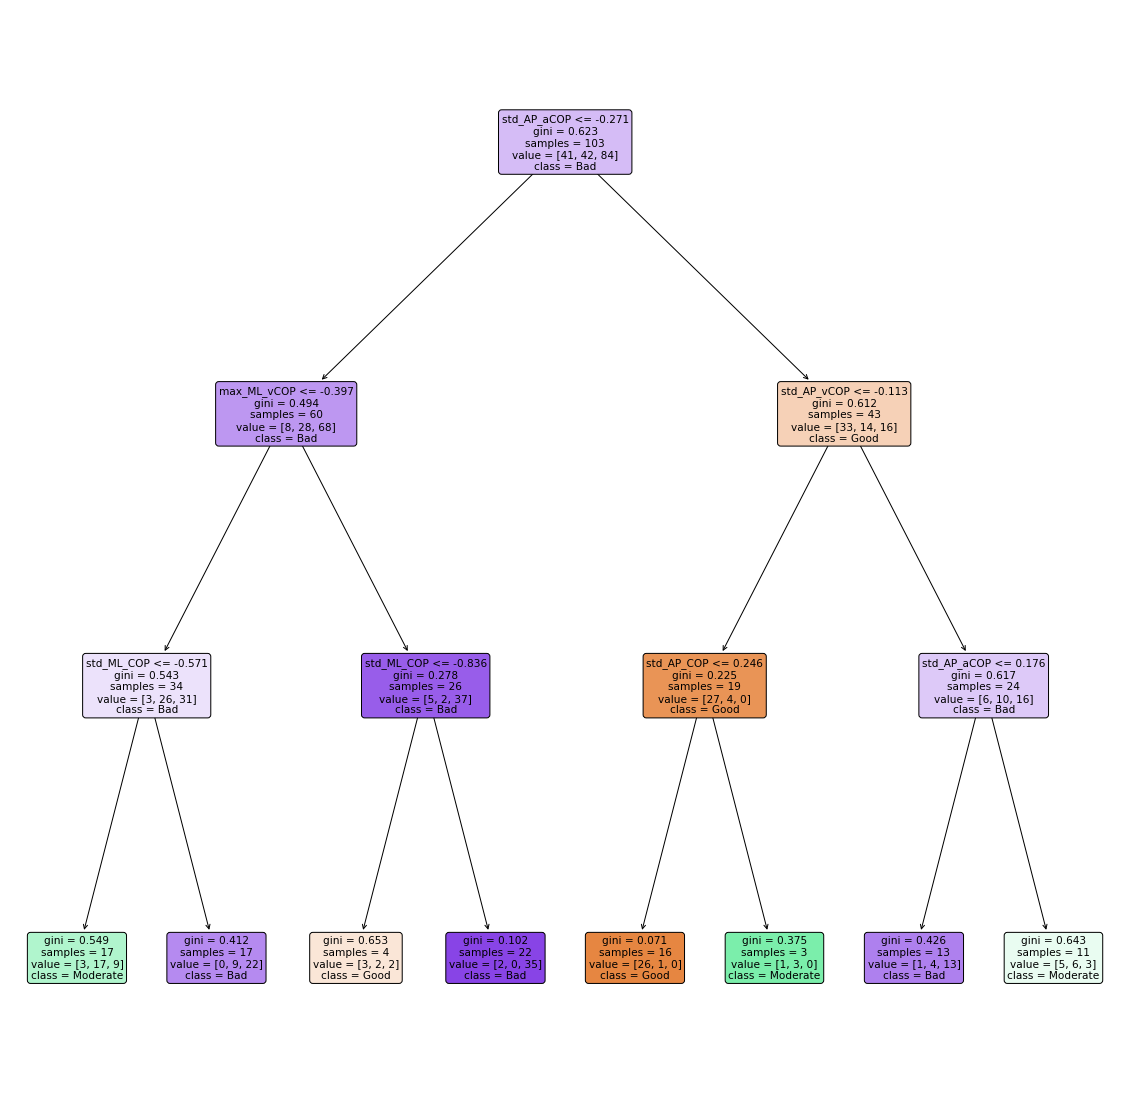

In [480]:
figure = plt.figure(figsize = (20,20))
tree.plot_tree(COP_RF_best_reg.estimators_[0], 
              feature_names=list(cop_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True,
              rounded=True)


In [481]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [482]:
acc_3_t = accuracy_score(y_test.ravel(), COP_SVC_best_reg.predict(cop_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), COP_SVC_best_reg.predict(cop_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("forceplates SVC" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

forceplates SVC
acc: 0.611
recall: 0.554
precision: 0.527


Text(0.5, 1.0, 'SVC confusion matrix')

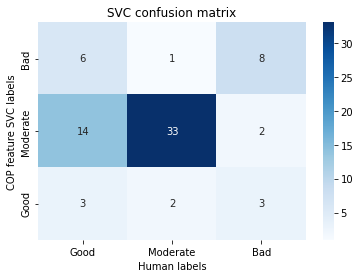

In [483]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), COP_SVC_best_reg.predict(cop_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), COP_SVC_best_reg.predict(cop_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('COP feature SVC labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("SVC confusion matrix")

In [484]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("COP feature SVC Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

COP feature SVC Sensitivity: 
 Good prediction: 13.043478260869565 
 Moderate prediction 91.66666666666666 
 Bad prediction 61.53846153846154


In [485]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("COP feature SVC Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


COP feature SVC Precision: 
 Good prediction: 37.5 
 Moderate prediction 67.3469387755102 
 Bad prediction 53.333333333333336


In [486]:
acc_3_t = accuracy_score(y_test.ravel(), COP_DT_best_reg.predict(cop_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), COP_DT_best_reg.predict(cop_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("forceplates DT" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

forceplates DT
acc: 0.653
recall: 0.684
precision: 0.628


Text(0.5, 1.0, 'DT confusion matrix')

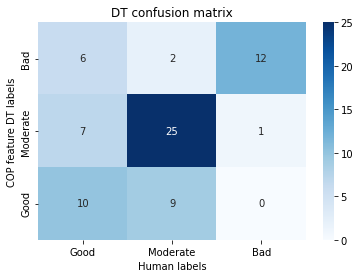

In [487]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), COP_DT_best_reg.predict(cop_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), COP_DT_best_reg.predict(cop_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('COP feature DT labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("DT confusion matrix")

In [488]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("COP feature DT Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

COP feature DT Sensitivity: 
 Good prediction: 43.47826086956522 
 Moderate prediction 69.44444444444444 
 Bad prediction 92.3076923076923


In [489]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("COP feature DT Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


COP feature DT Precision: 
 Good prediction: 52.63157894736842 
 Moderate prediction 75.75757575757575 
 Bad prediction 60.0


In [490]:
acc_3_t = accuracy_score(y_test.ravel(), COP_RF_best_reg.predict(cop_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), COP_RF_best_reg.predict(cop_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("forceplates RF" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

forceplates RF
acc: 0.625
recall: 0.611
precision: 0.591


Text(0.5, 1.0, 'RF confusion matrix')

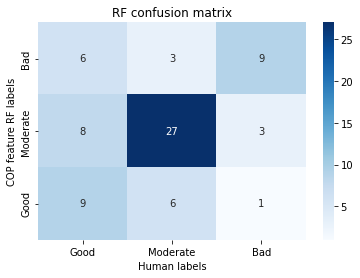

In [491]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), COP_RF_best_reg.predict(cop_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), COP_RF_best_reg.predict(cop_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('COP feature RF labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("RF confusion matrix")

In [492]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("COP feature RF Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

COP feature RF Sensitivity: 
 Good prediction: 39.130434782608695 
 Moderate prediction 75.0 
 Bad prediction 69.23076923076923


In [493]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("COP feature RF Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


COP feature RF Precision: 
 Good prediction: 56.25 
 Moderate prediction 71.05263157894737 
 Bad prediction 50.0


### advanced features

In [494]:
adv_SVC_grid_search = GridSearchCV(SVC_reg, param_grid = SVC_para, cv = 10, return_train_score = True)
adv_SVC_grid_search.fit(adv_x_train, y_train.ravel())
adv_SVC_grid_search.best_params_

{'C': 2.5, 'degree': 2, 'kernel': 'linear', 'probability': True}

In [495]:
adv_DT_grid_search = GridSearchCV(DT_reg, param_grid = DT_para, cv = 10, return_train_score = True)
adv_DT_grid_search.fit(adv_x_train, y_train)
adv_DT_grid_search.best_params_

{'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 15}

In [496]:
adv_RF_grid_search = GridSearchCV(RF_reg, param_grid = RF_para, cv = 10, return_train_score = True)
adv_RF_grid_search.fit(adv_x_train, y_train)
adv_RF_grid_search.best_params_

{'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 9, 'n_estimators': 100}

In [497]:
adv_SVC_best_reg = adv_SVC_grid_search.best_estimator_
adv_DT_best_reg = adv_DT_grid_search.best_estimator_
adv_RF_best_reg = adv_RF_grid_search.best_estimator_

In [498]:
adv_SVC_best_reg.score(adv_x_test, y_test.ravel())

0.75

In [499]:
adv_DT_best_reg.score(adv_x_test, y_test.ravel())

0.6805555555555556

In [500]:
adv_RF_best_reg.score(adv_x_test, y_test.ravel())

0.7361111111111112

[Text(513.36, 996.6, 'mean_AP_MOS <= 0.434\ngini = 0.655\nsamples = 167\nvalue = [45, 52, 70]\nclass = Bad'),
 Text(290.16, 815.4000000000001, 'std_vertical_xCOM <= 1.368\ngini = 0.419\nsamples = 98\nvalue = [2, 26, 70]\nclass = Bad'),
 Text(178.56, 634.2, 'min_AP_MOS <= -1.65\ngini = 0.299\nsamples = 79\nvalue = [2, 12, 65]\nclass = Bad'),
 Text(89.28, 453.0, 'std_AP_xCOM <= -1.479\ngini = 0.245\nsamples = 7\nvalue = [0, 6, 1]\nclass = Moderate'),
 Text(44.64, 271.79999999999995, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Bad'),
 Text(133.92000000000002, 271.79999999999995, 'gini = 0.0\nsamples = 6\nvalue = [0, 6, 0]\nclass = Moderate'),
 Text(267.84000000000003, 453.0, 'std_ML_xCOM <= -0.494\ngini = 0.202\nsamples = 72\nvalue = [2, 6, 64]\nclass = Bad'),
 Text(223.2, 271.79999999999995, 'gini = 0.444\nsamples = 3\nvalue = [2, 1, 0]\nclass = Good'),
 Text(312.48, 271.79999999999995, 'mean_AP_MOS <= -0.777\ngini = 0.134\nsamples = 69\nvalue = [0, 5, 64]\nclass = Bad'),
 Text(

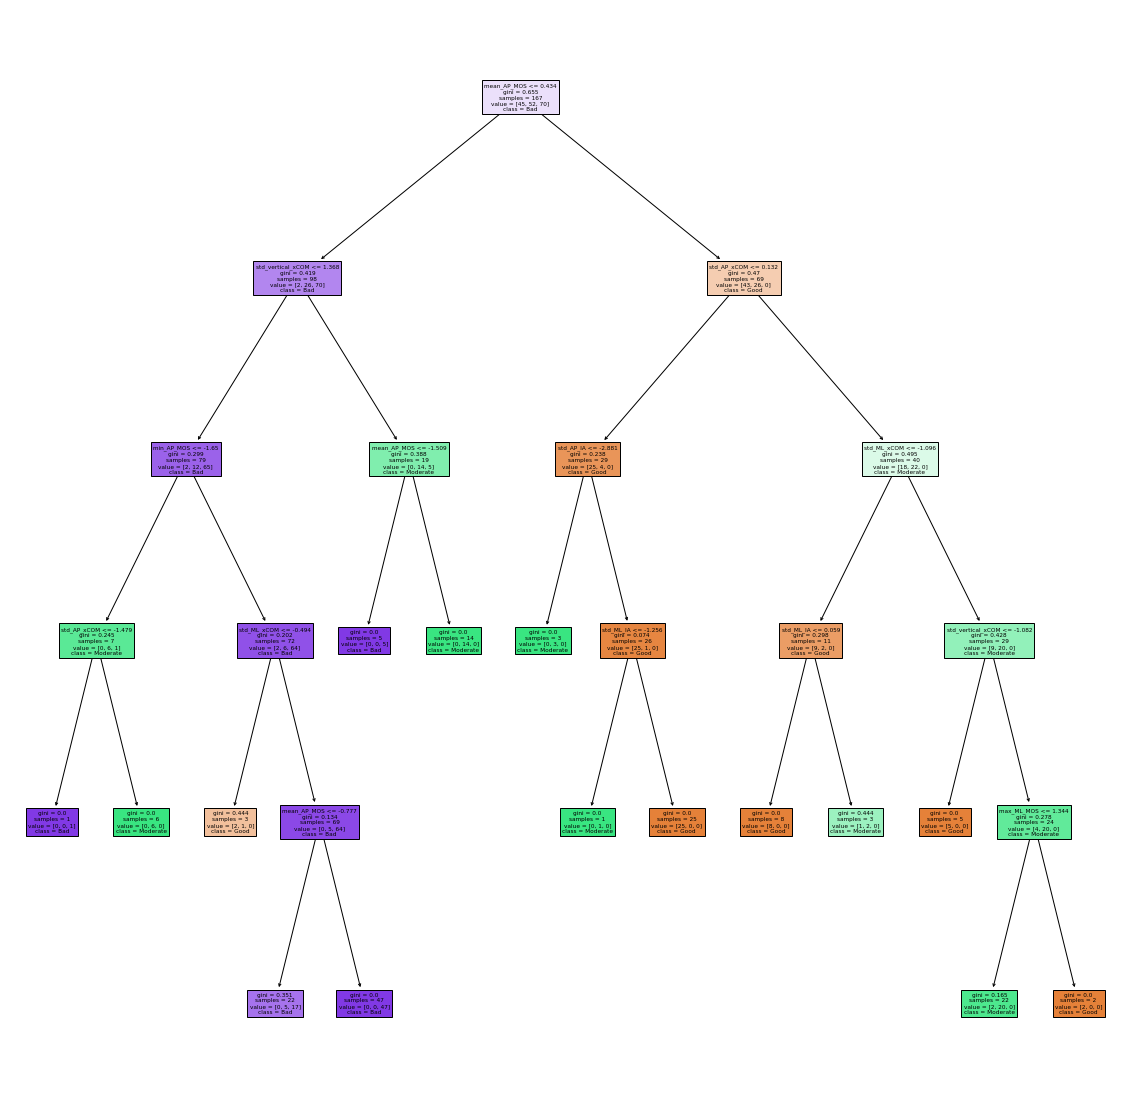

In [501]:
from sklearn import  tree
figure = plt.figure(figsize = (20,20))
tree.plot_tree(adv_DT_best_reg, 
              feature_names=list(adv_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True)

[Text(558.0, 951.3000000000001, 'std_AP_xCOM <= -0.396\ngini = 0.639\nsamples = 113\nvalue = [42, 47, 78]\nclass = Bad'),
 Text(279.0, 679.5, 'std_vertical_xCOM <= -0.497\ngini = 0.409\nsamples = 42\nvalue = [10, 6, 47]\nclass = Bad'),
 Text(139.5, 407.70000000000005, 'std_ML_xCOM <= -2.697\ngini = 0.278\nsamples = 9\nvalue = [10, 2, 0]\nclass = Good'),
 Text(69.75, 135.89999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Moderate'),
 Text(209.25, 135.89999999999998, 'gini = 0.165\nsamples = 8\nvalue = [10, 1, 0]\nclass = Good'),
 Text(418.5, 407.70000000000005, 'std_AP_MOS <= 1.831\ngini = 0.145\nsamples = 33\nvalue = [0, 4, 47]\nclass = Bad'),
 Text(348.75, 135.89999999999998, 'gini = 0.078\nsamples = 32\nvalue = [0, 2, 47]\nclass = Bad'),
 Text(488.25, 135.89999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 2, 0]\nclass = Moderate'),
 Text(837.0, 679.5, 'std_vertical_xCOM <= -0.642\ngini = 0.661\nsamples = 71\nvalue = [32, 41, 31]\nclass = Moderate'),
 Text(697.5, 

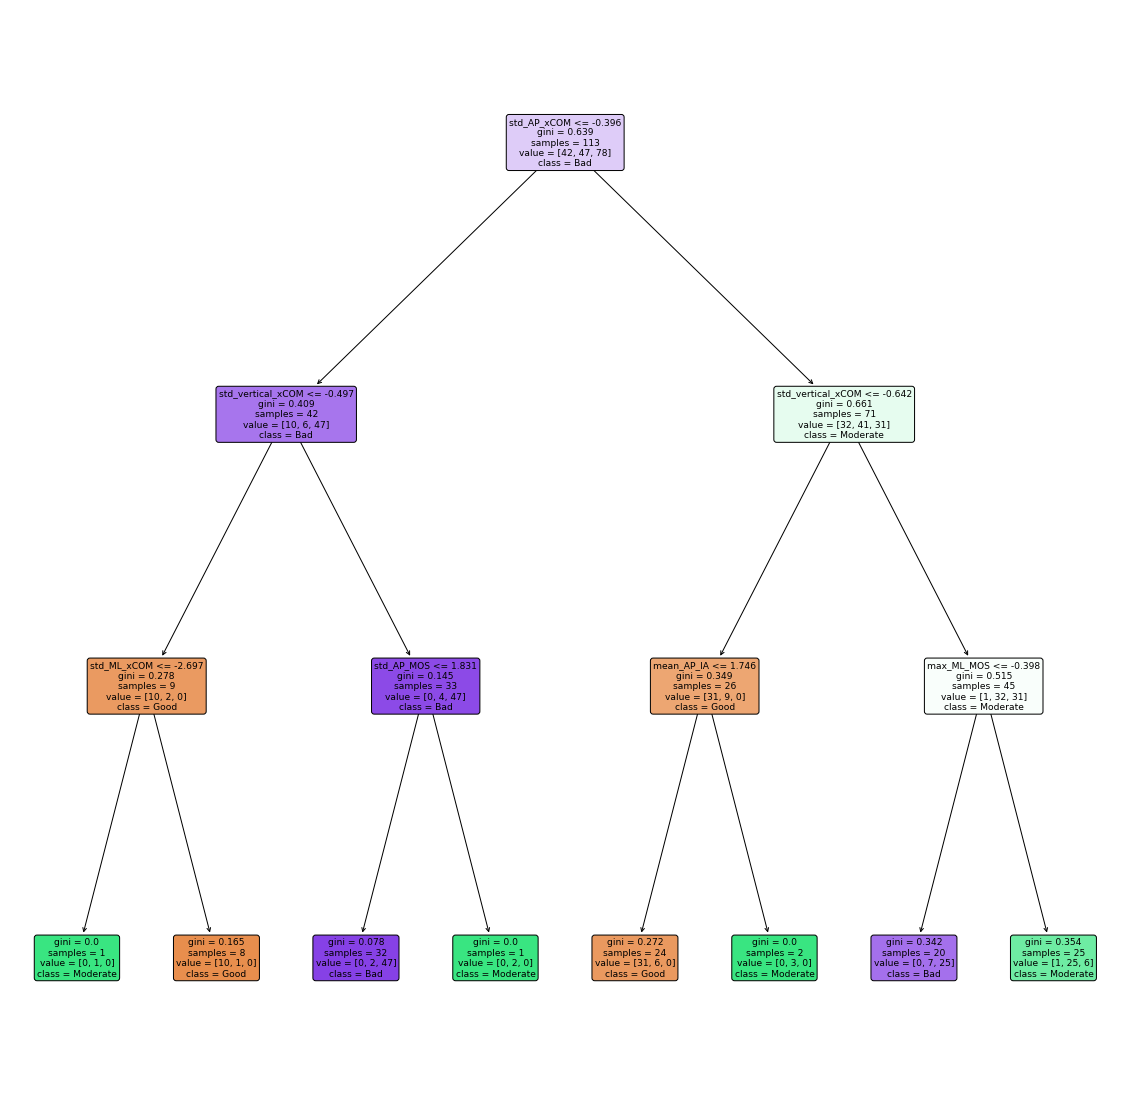

In [502]:
figure = plt.figure(figsize = (20,20))
tree.plot_tree(adv_RF_best_reg.estimators_[0], 
              feature_names=list(adv_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True,
              rounded=True)


In [503]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [504]:
acc_3_t = accuracy_score(y_test.ravel(), adv_SVC_best_reg.predict(adv_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), adv_SVC_best_reg.predict(adv_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("advanced SVC" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

advanced SVC
acc: 0.75
recall: 0.721
precision: 0.706


Text(0.5, 1.0, 'SVC confusion matrix')

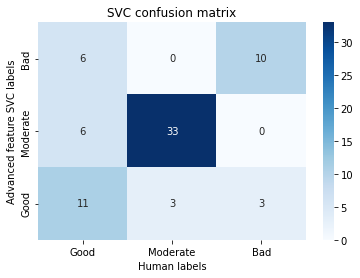

In [505]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), adv_SVC_best_reg.predict(adv_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), adv_SVC_best_reg.predict(adv_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('Advanced feature SVC labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("SVC confusion matrix")

In [506]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("Advanced feature SVC Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

Advanced feature SVC Sensitivity: 
 Good prediction: 47.82608695652174 
 Moderate prediction 91.66666666666666 
 Bad prediction 76.92307692307693


In [507]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("Advanced feature SVC Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


Advanced feature SVC Precision: 
 Good prediction: 64.70588235294117 
 Moderate prediction 84.61538461538461 
 Bad prediction 62.5


In [508]:
acc_3_t = accuracy_score(y_test.ravel(), adv_DT_best_reg.predict(adv_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), adv_DT_best_reg.predict(adv_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("advanced DT" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

advanced DT
acc: 0.681
recall: 0.627
precision: 0.608


Text(0.5, 1.0, 'DT confusion matrix')

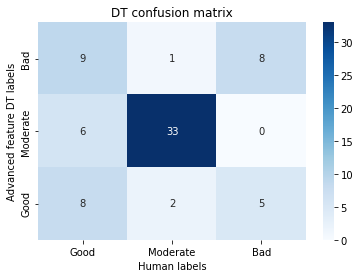

In [509]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), adv_DT_best_reg.predict(adv_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), adv_DT_best_reg.predict(adv_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('Advanced feature DT labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("DT confusion matrix")

In [510]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("Advanced feature DT Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

Advanced feature DT Sensitivity: 
 Good prediction: 34.78260869565217 
 Moderate prediction 91.66666666666666 
 Bad prediction 61.53846153846154


In [511]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("Advanced feature DT Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


Advanced feature DT Precision: 
 Good prediction: 53.333333333333336 
 Moderate prediction 84.61538461538461 
 Bad prediction 44.44444444444444


In [512]:
acc_3_t = accuracy_score(y_test.ravel(), adv_RF_best_reg.predict(adv_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), adv_RF_best_reg.predict(adv_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("advanced RF" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

advanced RF
acc: 0.736
recall: 0.73
precision: 0.74


Text(0.5, 1.0, 'RF confusion matrix')

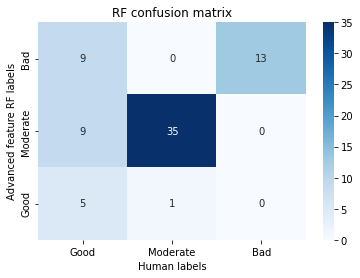

In [513]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), adv_RF_best_reg.predict(adv_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), adv_RF_best_reg.predict(adv_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('Advanced feature RF labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("RF confusion matrix")

In [514]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("Advanced feature RF Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

Advanced feature RF Sensitivity: 
 Good prediction: 21.73913043478261 
 Moderate prediction 97.22222222222221 
 Bad prediction 100.0


In [515]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("Advanced feature RF Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


Advanced feature RF Precision: 
 Good prediction: 83.33333333333334 
 Moderate prediction 79.54545454545455 
 Bad prediction 59.09090909090909


### spa cop features

In [516]:
spa_cop_SVC_grid_search = GridSearchCV(SVC_reg, param_grid = SVC_para, cv = 10, return_train_score = True)
spa_cop_SVC_grid_search.fit(spa_cop_x_train, y_train.ravel())
spa_cop_SVC_grid_search.best_params_

{'C': 3, 'degree': 2, 'kernel': 'rbf', 'probability': True}

In [517]:
spa_cop_DT_grid_search = GridSearchCV(DT_reg, param_grid = DT_para, cv = 10, return_train_score = True)
spa_cop_DT_grid_search.fit(spa_cop_x_train, y_train)
spa_cop_DT_grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'max_leaf_nodes': 10}

In [518]:
spa_cop_RF_grid_search = GridSearchCV(RF_reg, param_grid = RF_para, cv = 10, return_train_score = True)
spa_cop_RF_grid_search.fit(spa_cop_x_train, y_train)
spa_cop_RF_grid_search.best_params_

{'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 9, 'n_estimators': 100}

In [519]:
spa_cop_SVC_best_reg = spa_cop_SVC_grid_search.best_estimator_
spa_cop_DT_best_reg = spa_cop_DT_grid_search.best_estimator_
spa_cop_RF_best_reg = spa_cop_RF_grid_search.best_estimator_

In [520]:
spa_cop_SVC_best_reg.score(spa_cop_x_test, y_test.ravel())

0.7777777777777778

In [521]:
spa_cop_DT_best_reg.score(spa_cop_x_test, y_test.ravel())

0.7361111111111112

In [522]:
spa_cop_RF_best_reg.score(spa_cop_x_test, y_test.ravel())

0.8055555555555556

[Text(401.0625, 978.48, 'std_length <= -0.083\nentropy = 1.56\nsamples = 167\nvalue = [45, 52, 70]\nclass = Bad'),
 Text(139.5, 761.0400000000001, 'std_width <= 0.591\nentropy = 0.968\nsamples = 75\nvalue = [22, 1, 52]\nclass = Bad'),
 Text(69.75, 543.6, 'entropy = 0.414\nsamples = 48\nvalue = [4, 0, 44]\nclass = Bad'),
 Text(209.25, 543.6, 'std_AP_aCOP <= -0.271\nentropy = 1.086\nsamples = 27\nvalue = [18, 1, 8]\nclass = Good'),
 Text(139.5, 326.1600000000001, 'max_ML_aCOM <= 0.242\nentropy = 1.264\nsamples = 14\nvalue = [5, 1, 8]\nclass = Bad'),
 Text(69.75, 108.72000000000003, 'entropy = 0.503\nsamples = 9\nvalue = [1, 0, 8]\nclass = Bad'),
 Text(209.25, 108.72000000000003, 'entropy = 0.722\nsamples = 5\nvalue = [4, 1, 0]\nclass = Good'),
 Text(279.0, 326.1600000000001, 'entropy = 0.0\nsamples = 13\nvalue = [13, 0, 0]\nclass = Good'),
 Text(662.625, 761.0400000000001, 'std_ML_aCOP <= -0.345\nentropy = 1.432\nsamples = 92\nvalue = [23, 51, 18]\nclass = Moderate'),
 Text(488.25, 543.6

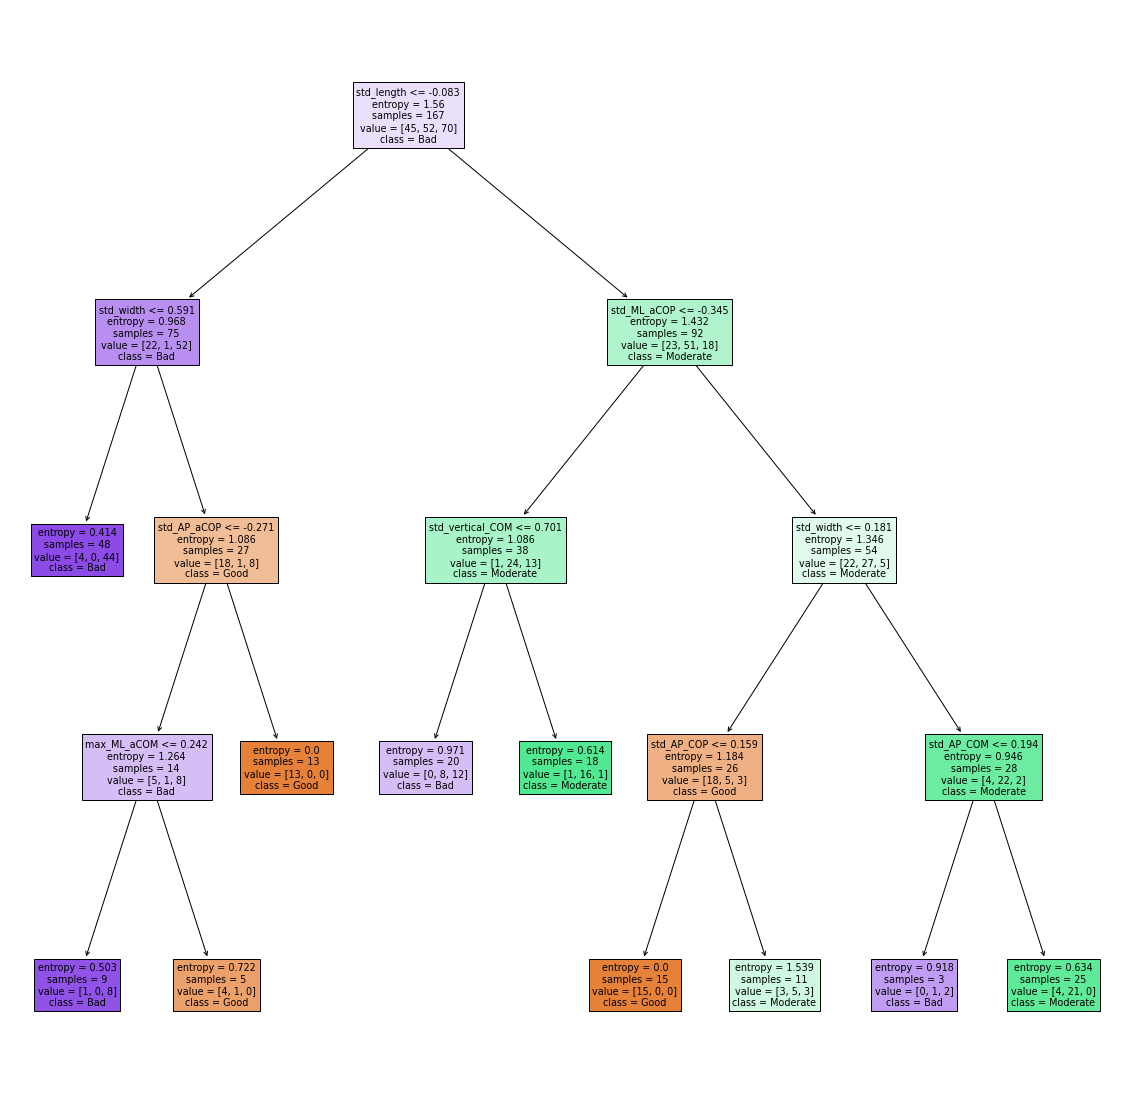

In [523]:
from sklearn import  tree
figure = plt.figure(figsize = (20,20))
tree.plot_tree(spa_cop_DT_best_reg, 
              feature_names=list(spa_cop_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True)

[Text(558.0, 951.3000000000001, 'max_clearance <= -0.099\ngini = 0.628\nsamples = 102\nvalue = [35, 51, 81]\nclass = Bad'),
 Text(279.0, 679.5, 'std_length <= -0.368\ngini = 0.485\nsamples = 43\nvalue = [14, 10, 51]\nclass = Bad'),
 Text(139.5, 407.70000000000005, 'std_AP_vCOP <= -0.61\ngini = 0.122\nsamples = 24\nvalue = [3, 0, 43]\nclass = Bad'),
 Text(69.75, 135.89999999999998, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]\nclass = Good'),
 Text(209.25, 135.89999999999998, 'gini = 0.0\nsamples = 21\nvalue = [0, 0, 43]\nclass = Bad'),
 Text(418.5, 407.70000000000005, 'std_vertical_COM <= 1.368\ngini = 0.661\nsamples = 19\nvalue = [11, 10, 8]\nclass = Good'),
 Text(348.75, 135.89999999999998, 'gini = 0.599\nsamples = 16\nvalue = [11, 3, 8]\nclass = Good'),
 Text(488.25, 135.89999999999998, 'gini = 0.0\nsamples = 3\nvalue = [0, 7, 0]\nclass = Moderate'),
 Text(837.0, 679.5, 'std_AP_COM <= 0.268\ngini = 0.643\nsamples = 59\nvalue = [21, 41, 30]\nclass = Moderate'),
 Text(697.5, 407.700000

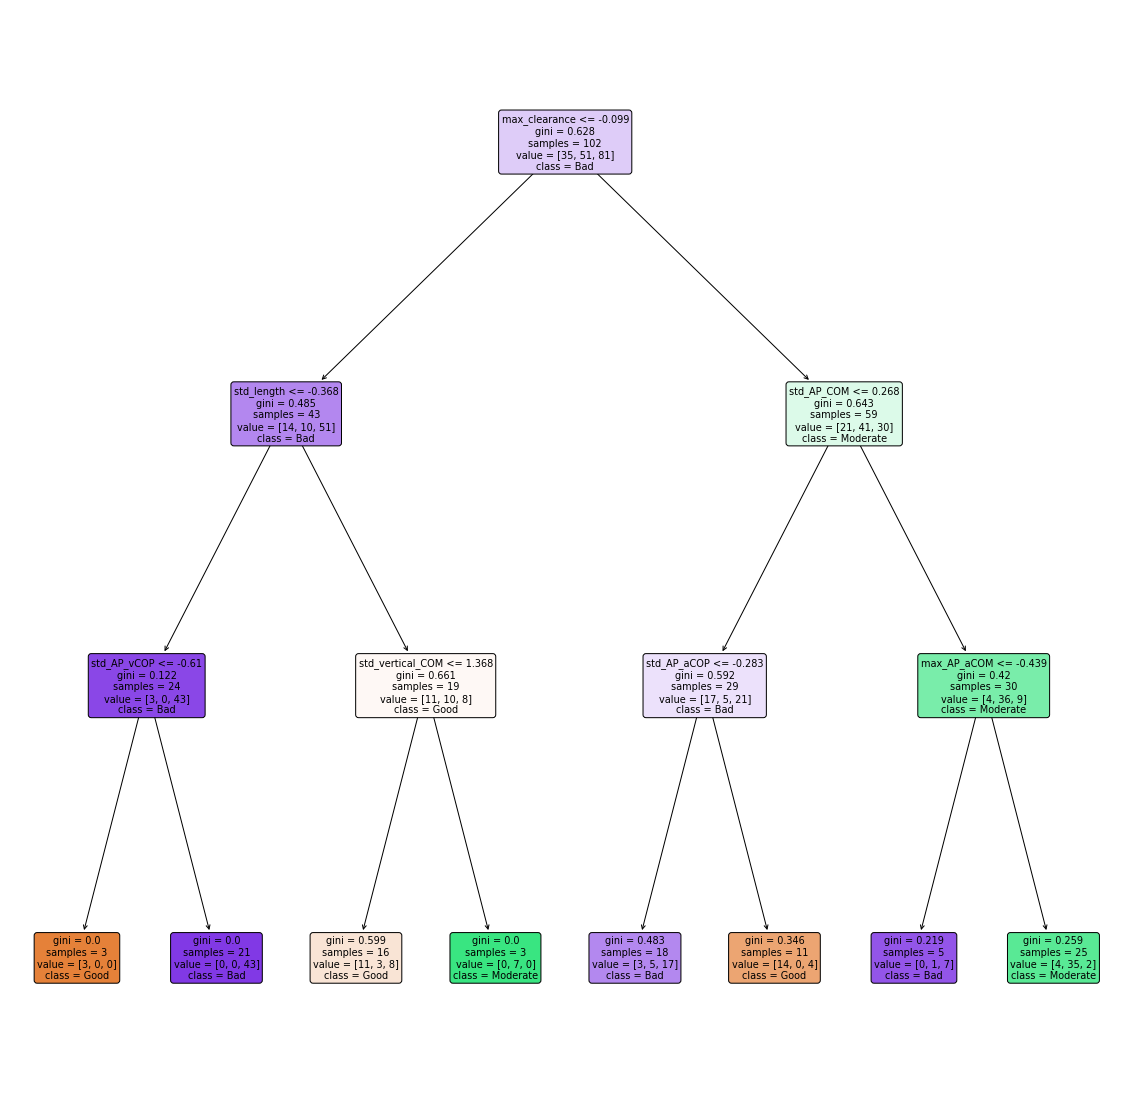

In [524]:
figure = plt.figure(figsize = (20,20))
tree.plot_tree(spa_cop_RF_best_reg.estimators_[0], 
              feature_names=list(spa_cop_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True,
              rounded=True)


In [525]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [526]:
acc_3_t = accuracy_score(y_test.ravel(), spa_cop_SVC_best_reg.predict(spa_cop_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), spa_cop_SVC_best_reg.predict(spa_cop_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("spa_cop SVC" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

spa_cop SVC
acc: 0.778
recall: 0.706
precision: 0.736


Text(0.5, 1.0, 'SVC confusion matrix')

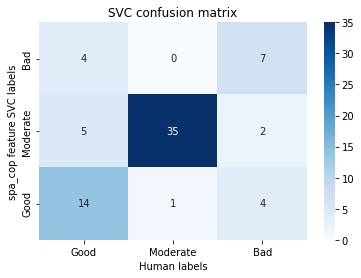

In [527]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), spa_cop_SVC_best_reg.predict(spa_cop_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), spa_cop_SVC_best_reg.predict(spa_cop_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('spa_cop feature SVC labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("SVC confusion matrix")

In [528]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("spa_cop feature SVC Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

spa_cop feature SVC Sensitivity: 
 Good prediction: 60.86956521739131 
 Moderate prediction 97.22222222222221 
 Bad prediction 53.84615384615385


In [529]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("spa_cop feature SVC Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


spa_cop feature SVC Precision: 
 Good prediction: 73.68421052631578 
 Moderate prediction 83.33333333333334 
 Bad prediction 63.63636363636363


In [530]:
acc_3_t = accuracy_score(y_test.ravel(), spa_cop_DT_best_reg.predict(spa_cop_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), spa_cop_DT_best_reg.predict(spa_cop_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("spa_cop DT" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

spa_cop DT
acc: 0.736
recall: 0.679
precision: 0.701


Text(0.5, 1.0, 'DT confusion matrix')

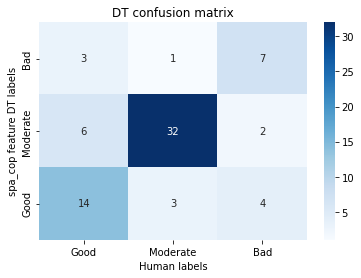

In [531]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), spa_cop_DT_best_reg.predict(spa_cop_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), spa_cop_DT_best_reg.predict(spa_cop_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('spa_cop feature DT labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("DT confusion matrix")

In [532]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("spa_cop feature DT Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

spa_cop feature DT Sensitivity: 
 Good prediction: 60.86956521739131 
 Moderate prediction 88.88888888888889 
 Bad prediction 53.84615384615385


In [533]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("spa_cop feature DT Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


spa_cop feature DT Precision: 
 Good prediction: 66.66666666666666 
 Moderate prediction 80.0 
 Bad prediction 63.63636363636363


In [534]:
acc_3_t = accuracy_score(y_test.ravel(), spa_cop_RF_best_reg.predict(spa_cop_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), spa_cop_RF_best_reg.predict(spa_cop_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("spa_cop RF" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

spa_cop RF
acc: 0.806
recall: 0.768
precision: 0.799


Text(0.5, 1.0, 'RF confusion matrix')

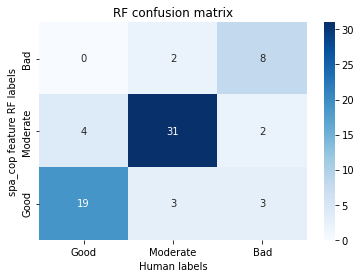

In [535]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), spa_cop_RF_best_reg.predict(spa_cop_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), spa_cop_RF_best_reg.predict(spa_cop_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('spa_cop feature RF labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("RF confusion matrix")

In [536]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("spa_cop feature RF Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

spa_cop feature RF Sensitivity: 
 Good prediction: 82.6086956521739 
 Moderate prediction 86.11111111111111 
 Bad prediction 61.53846153846154


In [537]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("spa_cop feature RF Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


spa_cop feature RF Precision: 
 Good prediction: 76.0 
 Moderate prediction 83.78378378378379 
 Bad prediction 80.0


### spa adv features

In [538]:
spa_adv_SVC_grid_search = GridSearchCV(SVC_reg, param_grid = SVC_para, cv = 10, return_train_score = True)
spa_adv_SVC_grid_search.fit(spa_adv_x_train, y_train.ravel())
spa_adv_SVC_grid_search.best_params_

{'C': 2.5, 'degree': 2, 'kernel': 'rbf', 'probability': True}

In [539]:
spa_adv_DT_grid_search = GridSearchCV(DT_reg, param_grid = DT_para, cv = 10, return_train_score = True)
spa_adv_DT_grid_search.fit(spa_adv_x_train, y_train)
spa_adv_DT_grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'max_leaf_nodes': 8}

In [540]:
spa_adv_RF_grid_search = GridSearchCV(RF_reg, param_grid = RF_para, cv = 10, return_train_score = True)
spa_adv_RF_grid_search.fit(spa_adv_x_train, y_train)
spa_adv_RF_grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_leaf_nodes': 15,
 'n_estimators': 300}

In [541]:
spa_adv_SVC_best_reg = spa_adv_SVC_grid_search.best_estimator_
spa_adv_DT_best_reg = spa_adv_DT_grid_search.best_estimator_
spa_adv_RF_best_reg = spa_adv_RF_grid_search.best_estimator_

In [542]:
spa_adv_SVC_best_reg.score(spa_adv_x_test, y_test.ravel())

0.8055555555555556

In [543]:
spa_adv_DT_best_reg.score(spa_adv_x_test, y_test.ravel())

0.8055555555555556

In [544]:
spa_adv_RF_best_reg.score(spa_adv_x_test, y_test.ravel())

0.7777777777777778

[Text(496.0, 996.6, 'mean_AP_MOS <= 0.434\nentropy = 1.56\nsamples = 167\nvalue = [45, 52, 70]\nclass = Bad'),
 Text(248.0, 815.4000000000001, 'std_length <= -0.083\nentropy = 0.969\nsamples = 98\nvalue = [2, 26, 70]\nclass = Bad'),
 Text(124.0, 634.2, 'entropy = 0.0\nsamples = 52\nvalue = [0, 0, 52]\nclass = Bad'),
 Text(372.0, 634.2, 'mean_ML_SS_MOS <= -1.059\nentropy = 1.192\nsamples = 46\nvalue = [2, 26, 18]\nclass = Moderate'),
 Text(248.0, 453.0, 'entropy = 0.863\nsamples = 7\nvalue = [2, 0, 5]\nclass = Bad'),
 Text(496.0, 453.0, 'std_vertical_COM <= 0.738\nentropy = 0.918\nsamples = 39\nvalue = [0, 26, 13]\nclass = Moderate'),
 Text(372.0, 271.79999999999995, 'min_AP_MOS <= -1.685\nentropy = 0.995\nsamples = 24\nvalue = [0, 11, 13]\nclass = Bad'),
 Text(248.0, 90.59999999999991, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6, 0]\nclass = Moderate'),
 Text(496.0, 90.59999999999991, 'entropy = 0.852\nsamples = 18\nvalue = [0, 5, 13]\nclass = Bad'),
 Text(620.0, 271.79999999999995, 'en

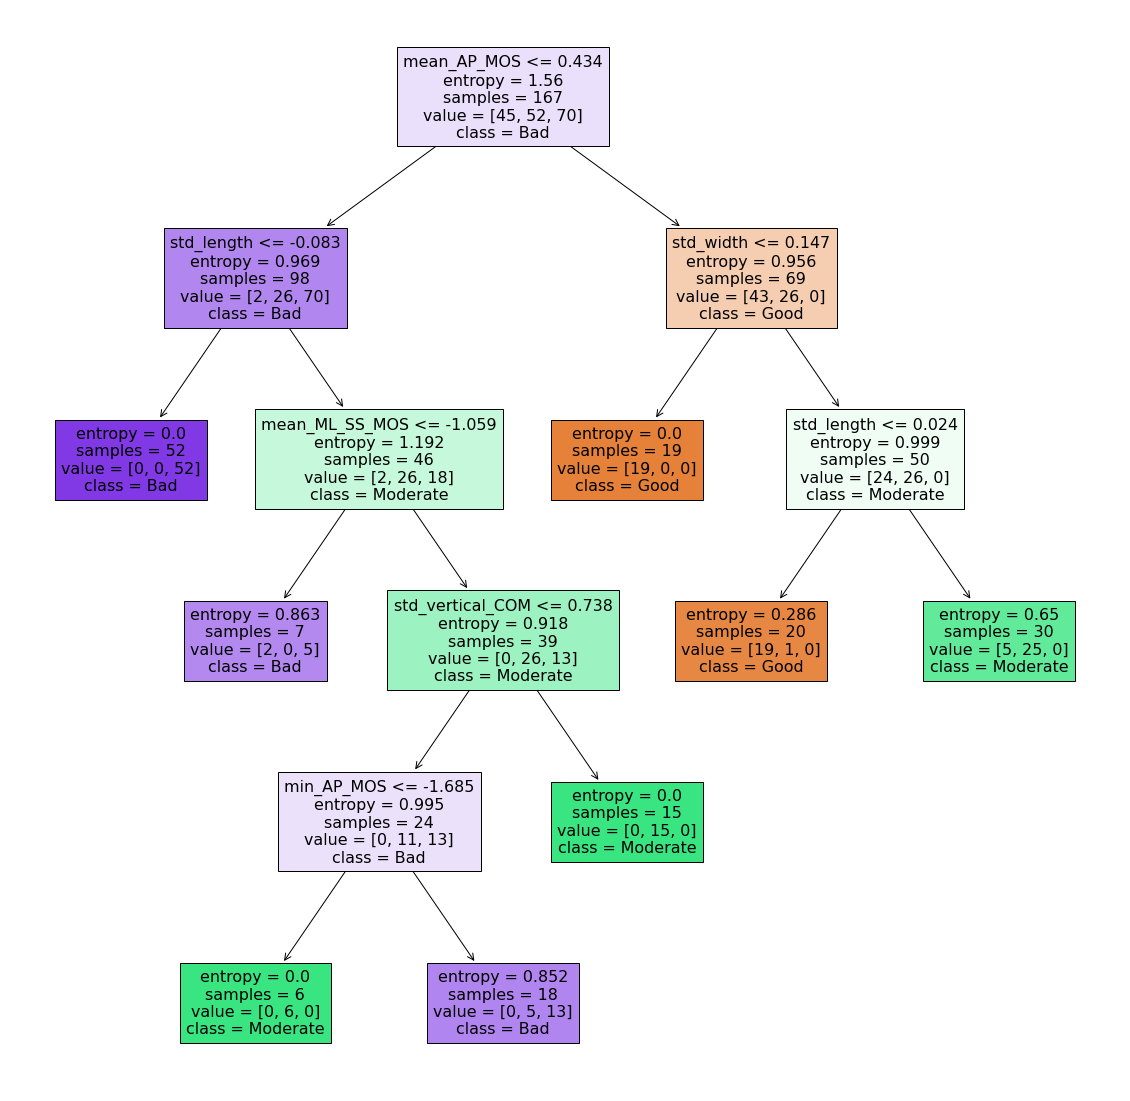

In [545]:
from sklearn import  tree
figure = plt.figure(figsize = (20,20))
tree.plot_tree(spa_adv_DT_best_reg, 
              feature_names=list(spa_adv_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True)

[Text(558.0, 951.3000000000001, 'mean_ML_DS_MOS <= 0.002\ngini = 0.661\nsamples = 103\nvalue = [47, 55, 65]\nclass = Bad'),
 Text(279.0, 679.5, 'std_vertical_aCOM <= 0.053\ngini = 0.502\nsamples = 56\nvalue = [5, 28, 56]\nclass = Bad'),
 Text(139.5, 407.70000000000005, 'ROM_ML_MOS <= -1.991\ngini = 0.409\nsamples = 44\nvalue = [5, 13, 52]\nclass = Bad'),
 Text(69.75, 135.89999999999998, 'gini = 0.0\nsamples = 2\nvalue = [5, 0, 0]\nclass = Good'),
 Text(209.25, 135.89999999999998, 'gini = 0.32\nsamples = 42\nvalue = [0, 13, 52]\nclass = Bad'),
 Text(418.5, 407.70000000000005, 'std_AP_COM <= 0.618\ngini = 0.332\nsamples = 12\nvalue = [0, 15, 4]\nclass = Moderate'),
 Text(348.75, 135.89999999999998, 'gini = 0.0\nsamples = 9\nvalue = [0, 14, 0]\nclass = Moderate'),
 Text(488.25, 135.89999999999998, 'gini = 0.32\nsamples = 3\nvalue = [0, 1, 4]\nclass = Bad'),
 Text(837.0, 679.5, 'std_vertical_COM <= -0.038\ngini = 0.577\nsamples = 47\nvalue = [42, 27, 9]\nclass = Good'),
 Text(697.5, 407.70

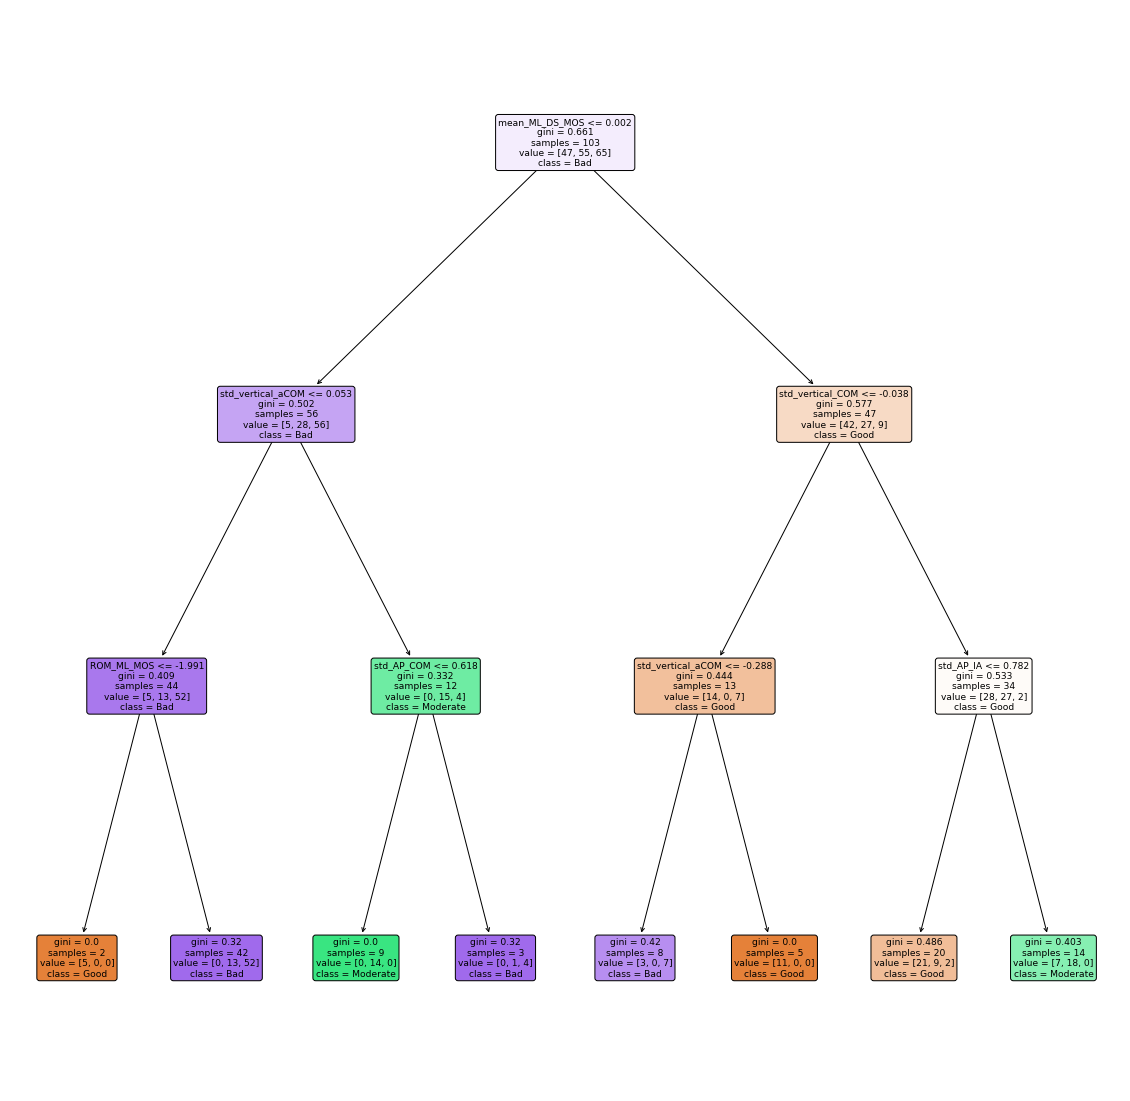

In [546]:
figure = plt.figure(figsize = (20,20))
tree.plot_tree(spa_adv_RF_best_reg.estimators_[0], 
              feature_names=list(spa_adv_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True,
              rounded=True)


In [547]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [548]:
acc_3_t = accuracy_score(y_test.ravel(), spa_adv_SVC_best_reg.predict(spa_adv_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), spa_adv_SVC_best_reg.predict(spa_adv_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("spa_adv SVC" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

spa_adv SVC
acc: 0.806
recall: 0.785
precision: 0.777


Text(0.5, 1.0, 'SVC confusion matrix')

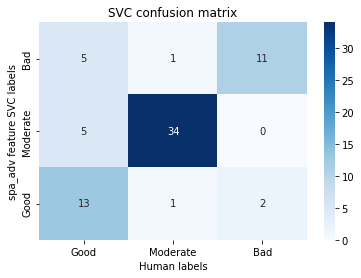

In [549]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), spa_adv_SVC_best_reg.predict(spa_adv_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), spa_adv_SVC_best_reg.predict(spa_adv_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('spa_adv feature SVC labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("SVC confusion matrix")

In [550]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("spa_adv feature SVC Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

spa_adv feature SVC Sensitivity: 
 Good prediction: 56.52173913043478 
 Moderate prediction 94.44444444444444 
 Bad prediction 84.61538461538461


In [551]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("spa_adv feature SVC Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


spa_adv feature SVC Precision: 
 Good prediction: 81.25 
 Moderate prediction 87.17948717948718 
 Bad prediction 64.70588235294117


In [552]:
acc_3_t = accuracy_score(y_test.ravel(), spa_adv_DT_best_reg.predict(spa_adv_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), spa_adv_DT_best_reg.predict(spa_adv_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("spa_adv DT" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

spa_adv DT
acc: 0.806
recall: 0.775
precision: 0.811


Text(0.5, 1.0, 'DT confusion matrix')

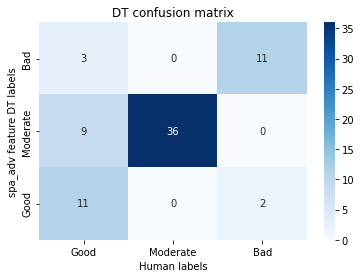

In [553]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), spa_adv_DT_best_reg.predict(spa_adv_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), spa_adv_DT_best_reg.predict(spa_adv_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('spa_adv feature DT labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("DT confusion matrix")

In [554]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("spa_adv feature DT Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

spa_adv feature DT Sensitivity: 
 Good prediction: 47.82608695652174 
 Moderate prediction 100.0 
 Bad prediction 84.61538461538461


In [555]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("spa_adv feature DT Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


spa_adv feature DT Precision: 
 Good prediction: 84.61538461538461 
 Moderate prediction 80.0 
 Bad prediction 78.57142857142857


In [556]:
acc_3_t = accuracy_score(y_test.ravel(), spa_adv_RF_best_reg.predict(spa_adv_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), spa_adv_RF_best_reg.predict(spa_adv_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("spa_adv RF" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

spa_adv RF
acc: 0.778
recall: 0.773
precision: 0.784


Text(0.5, 1.0, 'RF confusion matrix')

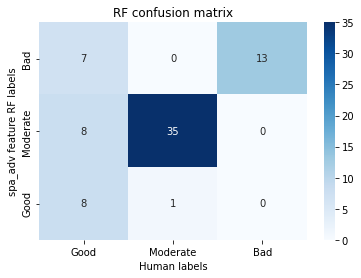

In [557]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), spa_adv_RF_best_reg.predict(spa_adv_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), spa_adv_RF_best_reg.predict(spa_adv_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('spa_adv feature RF labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("RF confusion matrix")

In [558]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("spa_adv feature RF Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

spa_adv feature RF Sensitivity: 
 Good prediction: 34.78260869565217 
 Moderate prediction 97.22222222222221 
 Bad prediction 100.0


In [559]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("spa_adv feature RF Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


spa_adv feature RF Precision: 
 Good prediction: 88.88888888888889 
 Moderate prediction 81.3953488372093 
 Bad prediction 65.0


### cop adv features

In [560]:
cop_adv_SVC_grid_search = GridSearchCV(SVC_reg, param_grid = SVC_para, cv = 10, return_train_score = True)
cop_adv_SVC_grid_search.fit(cop_adv_x_train, y_train.ravel())
cop_adv_SVC_grid_search.best_params_

{'C': 3, 'degree': 2, 'kernel': 'linear', 'probability': True}

In [561]:
cop_adv_DT_grid_search = GridSearchCV(DT_reg, param_grid = DT_para, cv = 10, return_train_score = True)
cop_adv_DT_grid_search.fit(cop_adv_x_train, y_train)
cop_adv_DT_grid_search.best_params_

{'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 15}

In [562]:
cop_adv_RF_grid_search = GridSearchCV(RF_reg, param_grid = RF_para, cv = 10, return_train_score = True)
cop_adv_RF_grid_search.fit(cop_adv_x_train, y_train)
cop_adv_RF_grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_leaf_nodes': 10,
 'n_estimators': 100}

In [563]:
cop_adv_SVC_best_reg = cop_adv_SVC_grid_search.best_estimator_
cop_adv_DT_best_reg = cop_adv_DT_grid_search.best_estimator_
cop_adv_RF_best_reg = cop_adv_RF_grid_search.best_estimator_

In [564]:
cop_adv_SVC_best_reg.score(cop_adv_x_test, y_test.ravel())

0.7222222222222222

In [565]:
cop_adv_DT_best_reg.score(cop_adv_x_test, y_test.ravel())

0.7083333333333334

In [566]:
cop_adv_RF_best_reg.score(cop_adv_x_test, y_test.ravel())

0.7222222222222222

[Text(534.75, 978.48, 'mean_AP_MOS <= 0.434\ngini = 0.655\nsamples = 167\nvalue = [45, 52, 70]\nclass = Bad'),
 Text(302.25, 761.0400000000001, 'std_vertical_xCOM <= 1.368\ngini = 0.419\nsamples = 98\nvalue = [2, 26, 70]\nclass = Bad'),
 Text(186.0, 543.6, 'min_AP_MOS <= -1.65\ngini = 0.299\nsamples = 79\nvalue = [2, 12, 65]\nclass = Bad'),
 Text(93.0, 326.1600000000001, 'min_ML_MOS <= -0.313\ngini = 0.245\nsamples = 7\nvalue = [0, 6, 1]\nclass = Moderate'),
 Text(46.5, 108.72000000000003, 'gini = 0.0\nsamples = 6\nvalue = [0, 6, 0]\nclass = Moderate'),
 Text(139.5, 108.72000000000003, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Bad'),
 Text(279.0, 326.1600000000001, 'std_ML_xCOM <= -0.494\ngini = 0.202\nsamples = 72\nvalue = [2, 6, 64]\nclass = Bad'),
 Text(232.5, 108.72000000000003, 'gini = 0.444\nsamples = 3\nvalue = [2, 1, 0]\nclass = Good'),
 Text(325.5, 108.72000000000003, 'gini = 0.134\nsamples = 69\nvalue = [0, 5, 64]\nclass = Bad'),
 Text(418.5, 543.6, 'mean_ML_MOS <=

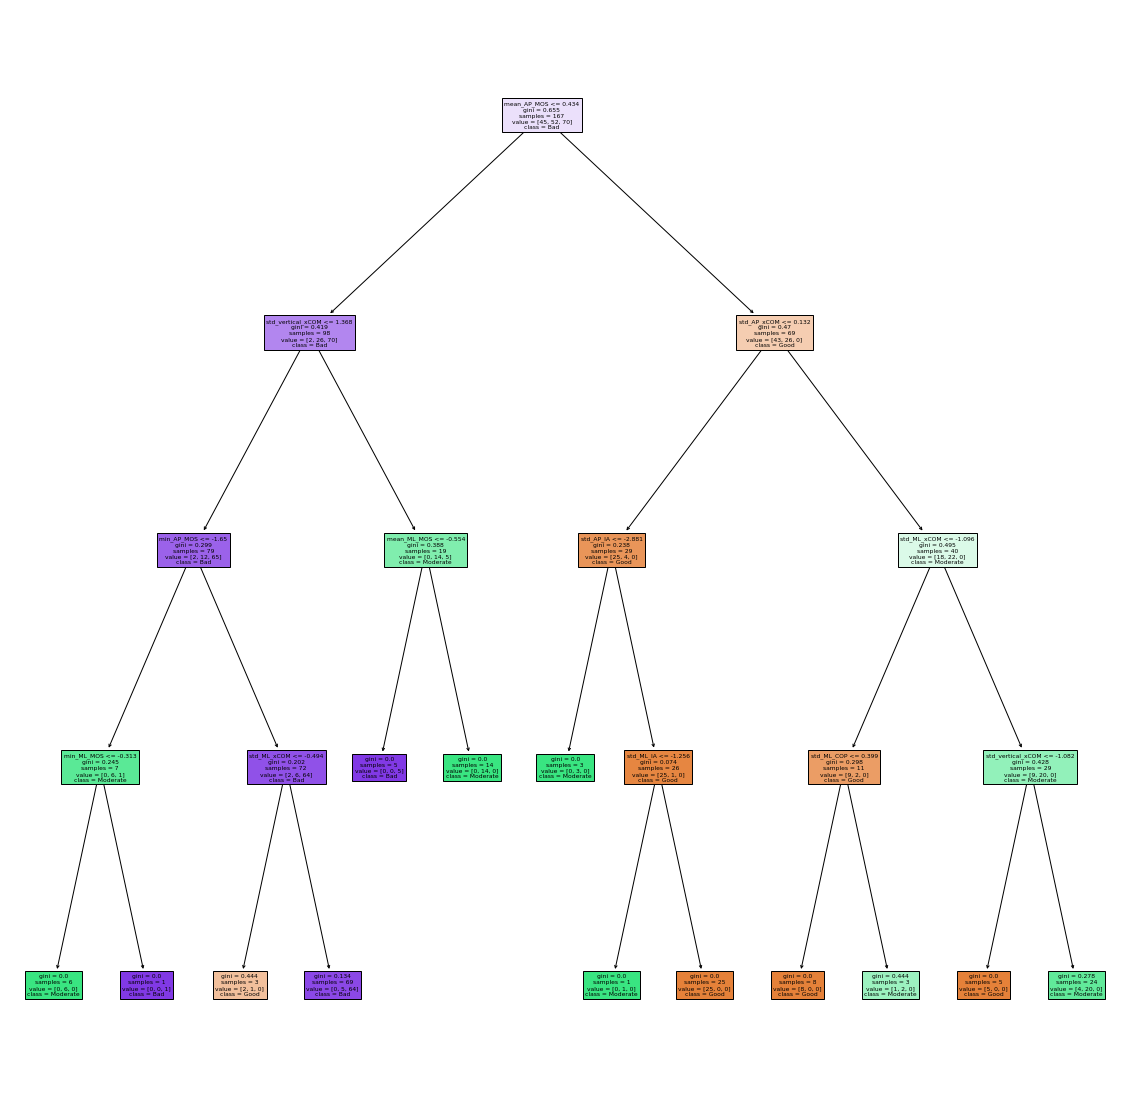

In [567]:
from sklearn import  tree
figure = plt.figure(figsize = (20,20))
tree.plot_tree(cop_adv_DT_best_reg, 
              feature_names=list(cop_adv_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True)

[Text(496.0, 951.3000000000001, 'mean_AP_MOS <= 0.434\ngini = 0.637\nsamples = 100\nvalue = [46, 42, 79]\nclass = Bad'),
 Text(248.0, 679.5, 'std_ML_MOS <= -2.631\ngini = 0.381\nsamples = 60\nvalue = [4, 21, 79]\nclass = Bad'),
 Text(124.0, 407.70000000000005, 'gini = 0.0\nsamples = 1\nvalue = [4, 0, 0]\nclass = Good'),
 Text(372.0, 407.70000000000005, 'std_ML_aCOP <= -0.601\ngini = 0.332\nsamples = 59\nvalue = [0, 21, 79]\nclass = Bad'),
 Text(248.0, 135.89999999999998, 'gini = 0.122\nsamples = 22\nvalue = [0, 3, 43]\nclass = Bad'),
 Text(496.0, 135.89999999999998, 'gini = 0.444\nsamples = 37\nvalue = [0, 18, 36]\nclass = Bad'),
 Text(744.0, 679.5, 'mean_ML_SS_MOS <= -0.653\ngini = 0.444\nsamples = 40\nvalue = [42, 21, 0]\nclass = Good'),
 Text(620.0, 407.70000000000005, 'gini = 0.0\nsamples = 11\nvalue = [17, 0, 0]\nclass = Good'),
 Text(868.0, 407.70000000000005, 'mean_AP_MOS <= 0.959\ngini = 0.496\nsamples = 29\nvalue = [25, 21, 0]\nclass = Good'),
 Text(744.0, 135.89999999999998, 

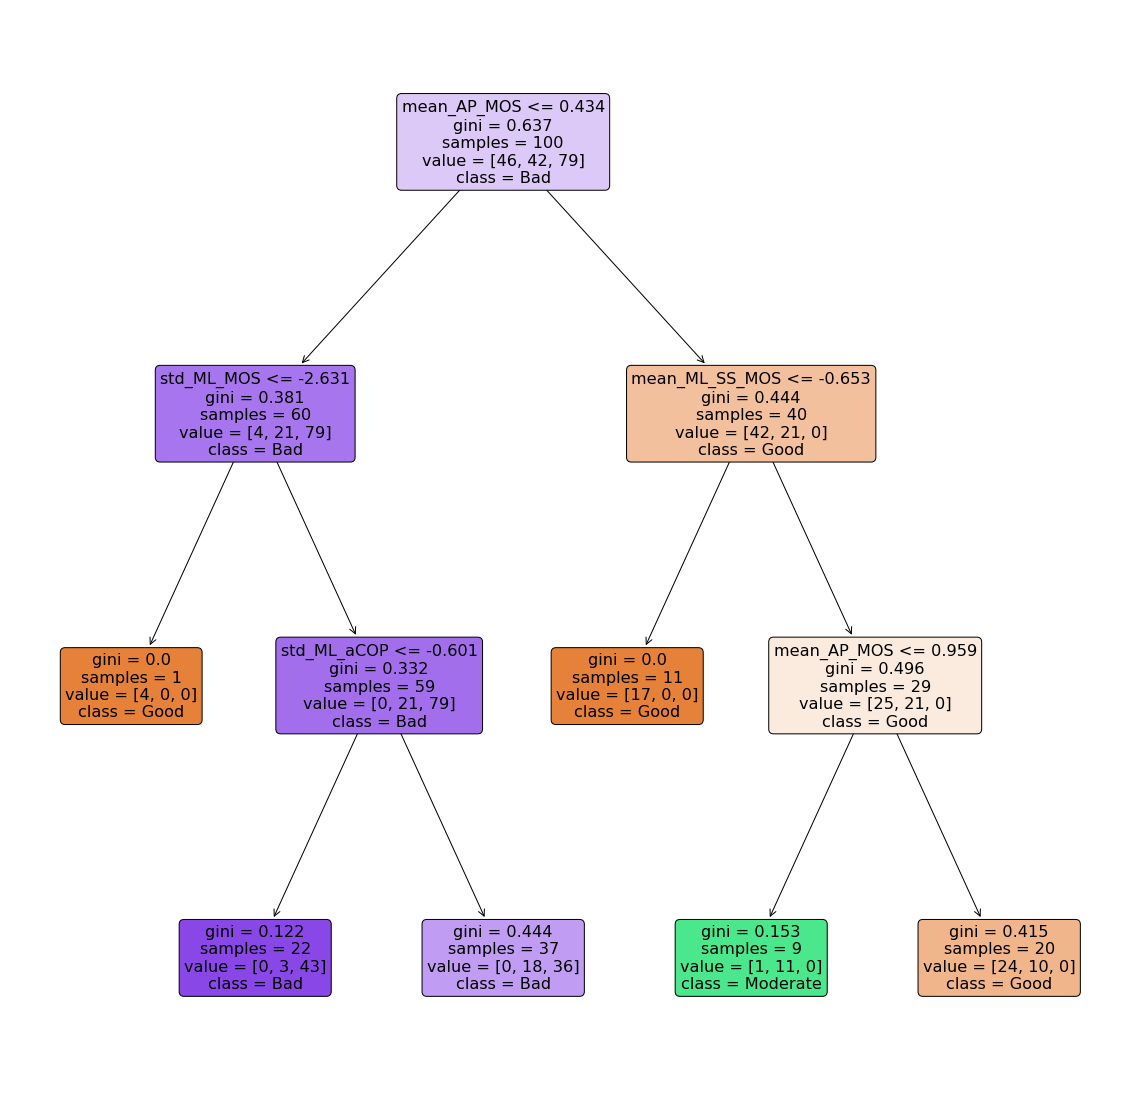

In [568]:
figure = plt.figure(figsize = (20,20))
tree.plot_tree(cop_adv_RF_best_reg.estimators_[0], 
              feature_names=list(cop_adv_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True,
              rounded=True)


In [569]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [570]:
acc_3_t = accuracy_score(y_test.ravel(), cop_adv_SVC_best_reg.predict(cop_adv_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), cop_adv_SVC_best_reg.predict(cop_adv_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("cop_adv SVC" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

cop_adv SVC
acc: 0.722
recall: 0.73
precision: 0.689


Text(0.5, 1.0, 'SVC confusion matrix')

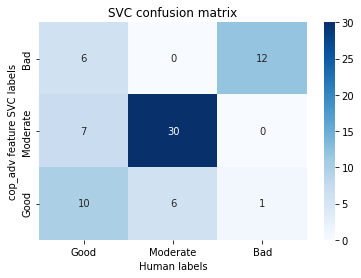

In [571]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), cop_adv_SVC_best_reg.predict(cop_adv_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), cop_adv_SVC_best_reg.predict(cop_adv_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('cop_adv feature SVC labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("SVC confusion matrix")

In [572]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("cop_adv feature SVC Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

cop_adv feature SVC Sensitivity: 
 Good prediction: 43.47826086956522 
 Moderate prediction 83.33333333333334 
 Bad prediction 92.3076923076923


In [573]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("cop_adv feature SVC Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


cop_adv feature SVC Precision: 
 Good prediction: 58.82352941176471 
 Moderate prediction 81.08108108108108 
 Bad prediction 66.66666666666666


In [574]:
acc_3_t = accuracy_score(y_test.ravel(), cop_adv_DT_best_reg.predict(cop_adv_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), cop_adv_DT_best_reg.predict(cop_adv_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("cop_adv DT" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

cop_adv DT
acc: 0.708
recall: 0.634
precision: 0.63


Text(0.5, 1.0, 'DT confusion matrix')

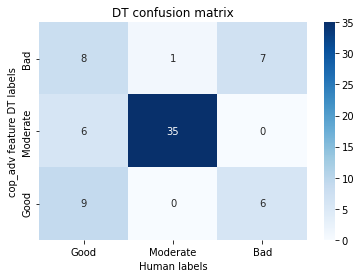

In [575]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), cop_adv_DT_best_reg.predict(cop_adv_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), cop_adv_DT_best_reg.predict(cop_adv_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('cop_adv feature DT labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("DT confusion matrix")

In [576]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("cop_adv feature DT Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

cop_adv feature DT Sensitivity: 
 Good prediction: 39.130434782608695 
 Moderate prediction 97.22222222222221 
 Bad prediction 53.84615384615385


In [577]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("cop_adv feature DT Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


cop_adv feature DT Precision: 
 Good prediction: 60.0 
 Moderate prediction 85.36585365853658 
 Bad prediction 43.75


In [578]:
acc_3_t = accuracy_score(y_test.ravel(), cop_adv_RF_best_reg.predict(cop_adv_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), cop_adv_RF_best_reg.predict(cop_adv_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("cop_adv RF" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

cop_adv RF
acc: 0.722
recall: 0.715
precision: 0.727


Text(0.5, 1.0, 'RF confusion matrix')

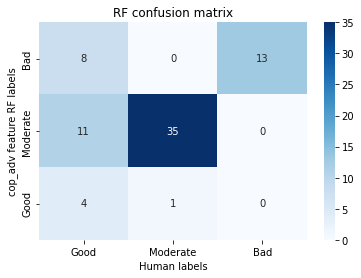

In [579]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), cop_adv_RF_best_reg.predict(cop_adv_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), cop_adv_RF_best_reg.predict(cop_adv_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('cop_adv feature RF labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("RF confusion matrix")

In [580]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("cop_adv feature RF Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

cop_adv feature RF Sensitivity: 
 Good prediction: 17.391304347826086 
 Moderate prediction 97.22222222222221 
 Bad prediction 100.0


In [581]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("cop_adv feature RF Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


cop_adv feature RF Precision: 
 Good prediction: 80.0 
 Moderate prediction 76.08695652173914 
 Bad prediction 61.904761904761905


### kinematic features

In [582]:
kine_SVC_grid_search = GridSearchCV(SVC_reg, param_grid = SVC_para, cv = 10, return_train_score = True)
kine_SVC_grid_search.fit(kine_x_train, y_train.ravel())
kine_SVC_grid_search.best_params_

{'C': 2, 'degree': 2, 'kernel': 'rbf', 'probability': True}

In [583]:
kine_DT_grid_search = GridSearchCV(DT_reg, param_grid = DT_para, cv = 10, return_train_score = True)
kine_DT_grid_search.fit(kine_x_train, y_train)
kine_DT_grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'max_leaf_nodes': 8}

In [584]:
kine_RF_grid_search = GridSearchCV(RF_reg, param_grid = RF_para, cv = 10, return_train_score = True)
kine_RF_grid_search.fit(kine_x_train, y_train)
kine_RF_grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_leaf_nodes': 15,
 'n_estimators': 300}

In [585]:
kine_SVC_best_reg = kine_SVC_grid_search.best_estimator_
kine_DT_best_reg = kine_DT_grid_search.best_estimator_
kine_RF_best_reg = kine_RF_grid_search.best_estimator_

In [586]:
kine_SVC_best_reg.score(kine_x_test, y_test.ravel())

0.8194444444444444

In [587]:
kine_DT_best_reg.score(kine_x_test, y_test.ravel())

0.8055555555555556

In [588]:
kine_RF_best_reg.score(kine_x_test, y_test.ravel())

0.7361111111111112

[Text(496.0, 996.6, 'mean_AP_MOS <= 0.434\nentropy = 1.56\nsamples = 167\nvalue = [45, 52, 70]\nclass = Bad'),
 Text(248.0, 815.4000000000001, 'std_length <= -0.083\nentropy = 0.969\nsamples = 98\nvalue = [2, 26, 70]\nclass = Bad'),
 Text(124.0, 634.2, 'entropy = 0.0\nsamples = 52\nvalue = [0, 0, 52]\nclass = Bad'),
 Text(372.0, 634.2, 'mean_ML_SS_MOS <= -1.059\nentropy = 1.192\nsamples = 46\nvalue = [2, 26, 18]\nclass = Moderate'),
 Text(248.0, 453.0, 'entropy = 0.863\nsamples = 7\nvalue = [2, 0, 5]\nclass = Bad'),
 Text(496.0, 453.0, 'std_vertical_COM <= 0.738\nentropy = 0.918\nsamples = 39\nvalue = [0, 26, 13]\nclass = Moderate'),
 Text(372.0, 271.79999999999995, 'min_AP_MOS <= -1.685\nentropy = 0.995\nsamples = 24\nvalue = [0, 11, 13]\nclass = Bad'),
 Text(248.0, 90.59999999999991, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6, 0]\nclass = Moderate'),
 Text(496.0, 90.59999999999991, 'entropy = 0.852\nsamples = 18\nvalue = [0, 5, 13]\nclass = Bad'),
 Text(620.0, 271.79999999999995, 'en

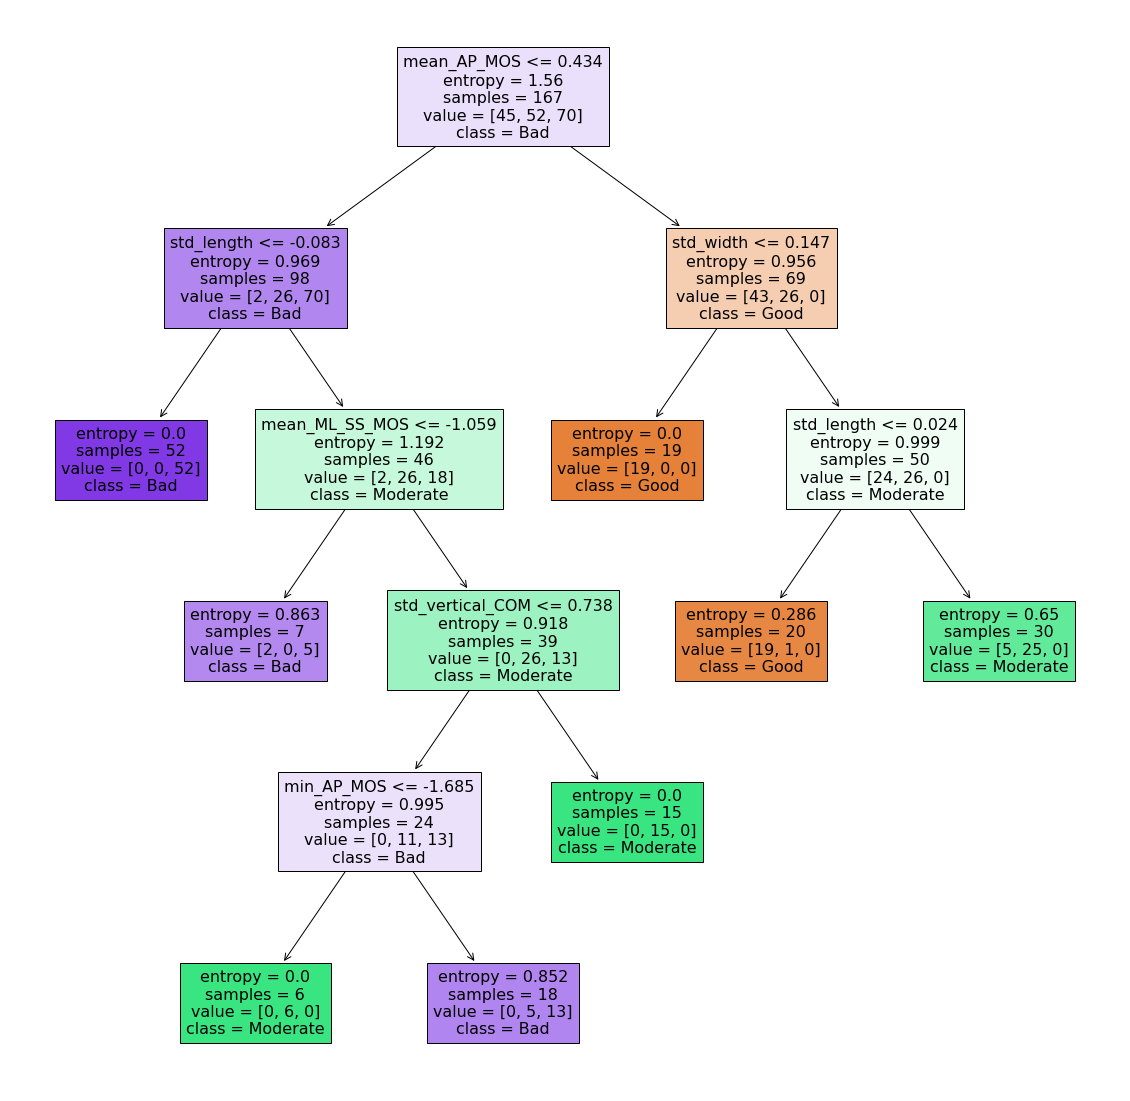

In [589]:
from sklearn import  tree
figure = plt.figure(figsize = (20,20))
tree.plot_tree(kine_DT_best_reg, 
              feature_names=list(kine_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True)

[Text(472.15384615384613, 951.3000000000001, 'std_vertical_xCOM <= -0.412\ngini = 0.659\nsamples = 101\nvalue = [48, 52, 67]\nclass = Bad'),
 Text(171.69230769230768, 679.5, 'std_length <= 0.024\ngini = 0.463\nsamples = 42\nvalue = [47, 27, 0]\nclass = Good'),
 Text(85.84615384615384, 407.70000000000005, 'gini = 0.0\nsamples = 14\nvalue = [24, 0, 0]\nclass = Good'),
 Text(257.53846153846155, 407.70000000000005, 'min_ML_MOS <= 0.205\ngini = 0.497\nsamples = 28\nvalue = [23, 27, 0]\nclass = Moderate'),
 Text(171.69230769230768, 135.89999999999998, 'gini = 0.159\nsamples = 9\nvalue = [2, 21, 0]\nclass = Moderate'),
 Text(343.38461538461536, 135.89999999999998, 'gini = 0.346\nsamples = 19\nvalue = [21, 6, 0]\nclass = Good'),
 Text(772.6153846153845, 679.5, 'std_AP_MOS <= 1.27\ngini = 0.409\nsamples = 59\nvalue = [1, 25, 67]\nclass = Bad'),
 Text(600.9230769230769, 407.70000000000005, 'std_vertical_aCOM <= 0.299\ngini = 0.302\nsamples = 52\nvalue = [1, 13, 63]\nclass = Bad'),
 Text(515.0769

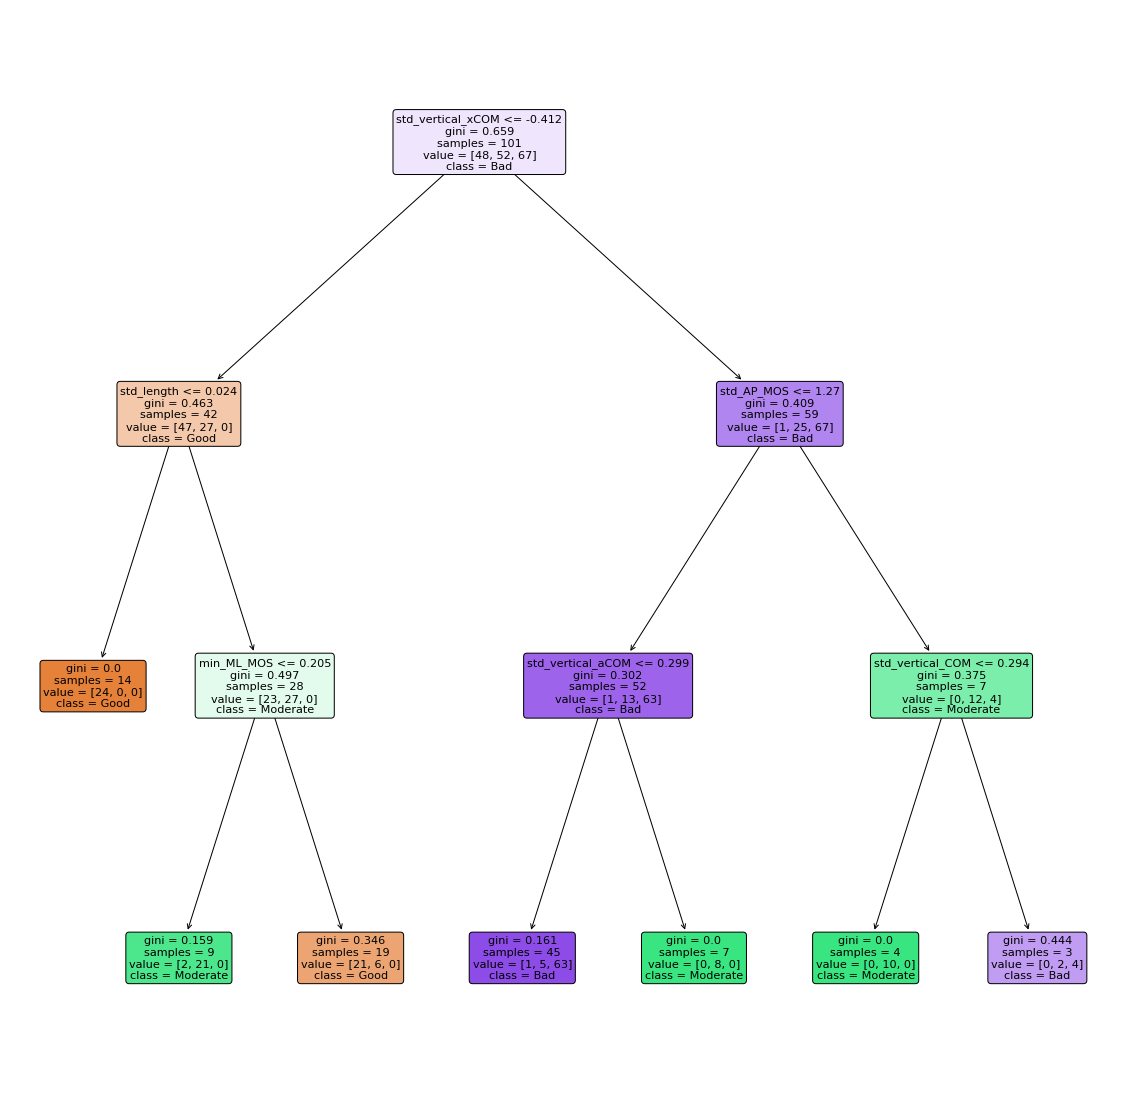

In [590]:
figure = plt.figure(figsize = (20,20))
tree.plot_tree(kine_RF_best_reg.estimators_[0], 
              feature_names=list(kine_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True,
              rounded=True)


In [591]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [592]:
acc_3_t = accuracy_score(y_test.ravel(), kine_SVC_best_reg.predict(kine_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), kine_SVC_best_reg.predict(kine_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("kine SVC" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

kine SVC
acc: 0.819
recall: 0.795
precision: 0.792


Text(0.5, 1.0, 'SVC confusion matrix')

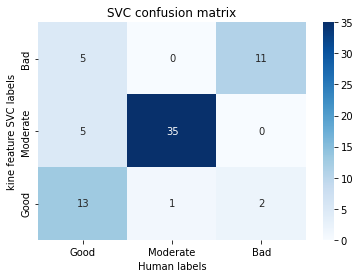

In [593]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), kine_SVC_best_reg.predict(kine_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), kine_SVC_best_reg.predict(kine_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('kine feature SVC labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("SVC confusion matrix")

In [594]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("kine feature SVC Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

kine feature SVC Sensitivity: 
 Good prediction: 56.52173913043478 
 Moderate prediction 97.22222222222221 
 Bad prediction 84.61538461538461


In [595]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("kine feature SVC Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


kine feature SVC Precision: 
 Good prediction: 81.25 
 Moderate prediction 87.5 
 Bad prediction 68.75


In [596]:
acc_3_t = accuracy_score(y_test.ravel(), kine_DT_best_reg.predict(kine_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), kine_DT_best_reg.predict(kine_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("kine DT" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

kine DT
acc: 0.806
recall: 0.775
precision: 0.811


Text(0.5, 1.0, 'DT confusion matrix')

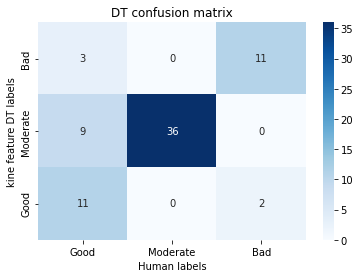

In [597]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), kine_DT_best_reg.predict(kine_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), kine_DT_best_reg.predict(kine_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('kine feature DT labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("DT confusion matrix")

In [598]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("kine feature DT Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

kine feature DT Sensitivity: 
 Good prediction: 47.82608695652174 
 Moderate prediction 100.0 
 Bad prediction 84.61538461538461


In [599]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("kine feature DT Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


kine feature DT Precision: 
 Good prediction: 84.61538461538461 
 Moderate prediction 80.0 
 Bad prediction 78.57142857142857


In [600]:
acc_3_t = accuracy_score(y_test.ravel(), kine_RF_best_reg.predict(kine_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), kine_RF_best_reg.predict(kine_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("kine RF" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

kine RF
acc: 0.736
recall: 0.724
precision: 0.717


Text(0.5, 1.0, 'RF confusion matrix')

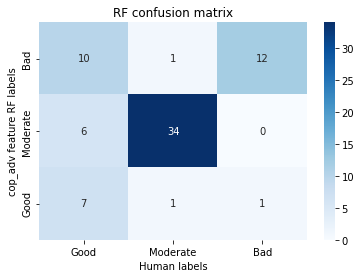

In [601]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), kine_RF_best_reg.predict(kine_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), kine_RF_best_reg.predict(kine_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('cop_adv feature RF labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("RF confusion matrix")

In [602]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("kine feature RF Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

kine feature RF Sensitivity: 
 Good prediction: 30.434782608695656 
 Moderate prediction 94.44444444444444 
 Bad prediction 92.3076923076923


In [603]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("kine feature RF Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


kine feature RF Precision: 
 Good prediction: 77.77777777777779 
 Moderate prediction 85.0 
 Bad prediction 52.17391304347826


### non kinematic features

In [604]:
non_kine_SVC_grid_search = GridSearchCV(SVC_reg, param_grid = SVC_para, cv = 10, return_train_score = True)
non_kine_SVC_grid_search.fit(non_kine_x_train, y_train.ravel())
non_kine_SVC_grid_search.best_params_

{'C': 1, 'degree': 2, 'kernel': 'rbf', 'probability': True}

In [605]:
non_kine_DT_grid_search = GridSearchCV(DT_reg, param_grid = DT_para, cv = 10, return_train_score = True)
non_kine_DT_grid_search.fit(non_kine_x_train, y_train)
non_kine_DT_grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'max_leaf_nodes': 8}

In [606]:
non_kine_RF_grid_search = GridSearchCV(RF_reg, param_grid = RF_para, cv = 10, return_train_score = True)
non_kine_RF_grid_search.fit(non_kine_x_train, y_train)
non_kine_RF_grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_leaf_nodes': 10,
 'n_estimators': 300}

In [607]:
non_kine_SVC_best_reg = non_kine_SVC_grid_search.best_estimator_
non_kine_DT_best_reg = non_kine_DT_grid_search.best_estimator_
non_kine_RF_best_reg = non_kine_RF_grid_search.best_estimator_

In [608]:
non_kine_SVC_best_reg.score(non_kine_x_test, y_test.ravel())

0.6111111111111112

In [609]:
non_kine_DT_best_reg.score(non_kine_x_test, y_test.ravel())

0.6805555555555556

In [610]:
non_kine_RF_best_reg.score(non_kine_x_test, y_test.ravel())

0.625

[Text(496.0, 996.6, 'std_AP_aCOP <= -0.271\nentropy = 1.56\nsamples = 167\nvalue = [45, 52, 70]\nclass = Bad'),
 Text(248.0, 815.4000000000001, 'std_ML_vCOP <= -1.317\nentropy = 1.282\nsamples = 94\nvalue = [9, 28, 57]\nclass = Bad'),
 Text(124.0, 634.2, 'entropy = 0.881\nsamples = 10\nvalue = [3, 7, 0]\nclass = Moderate'),
 Text(372.0, 634.2, 'std_AP_IA <= -2.1\nentropy = 1.152\nsamples = 84\nvalue = [6, 21, 57]\nclass = Bad'),
 Text(248.0, 453.0, 'entropy = 1.299\nsamples = 8\nvalue = [2, 5, 1]\nclass = Moderate'),
 Text(496.0, 453.0, 'entropy = 1.021\nsamples = 76\nvalue = [4, 16, 56]\nclass = Bad'),
 Text(744.0, 815.4000000000001, 'std_AP_vCOP <= -0.136\nentropy = 1.474\nsamples = 73\nvalue = [36, 24, 13]\nclass = Good'),
 Text(620.0, 634.2, 'entropy = 0.736\nsamples = 29\nvalue = [23, 6, 0]\nclass = Good'),
 Text(868.0, 634.2, 'std_ML_aCOP <= 1.2\nentropy = 1.567\nsamples = 44\nvalue = [13, 18, 13]\nclass = Moderate'),
 Text(744.0, 453.0, 'std_AP_COP <= -0.005\nentropy = 1.425\nsa

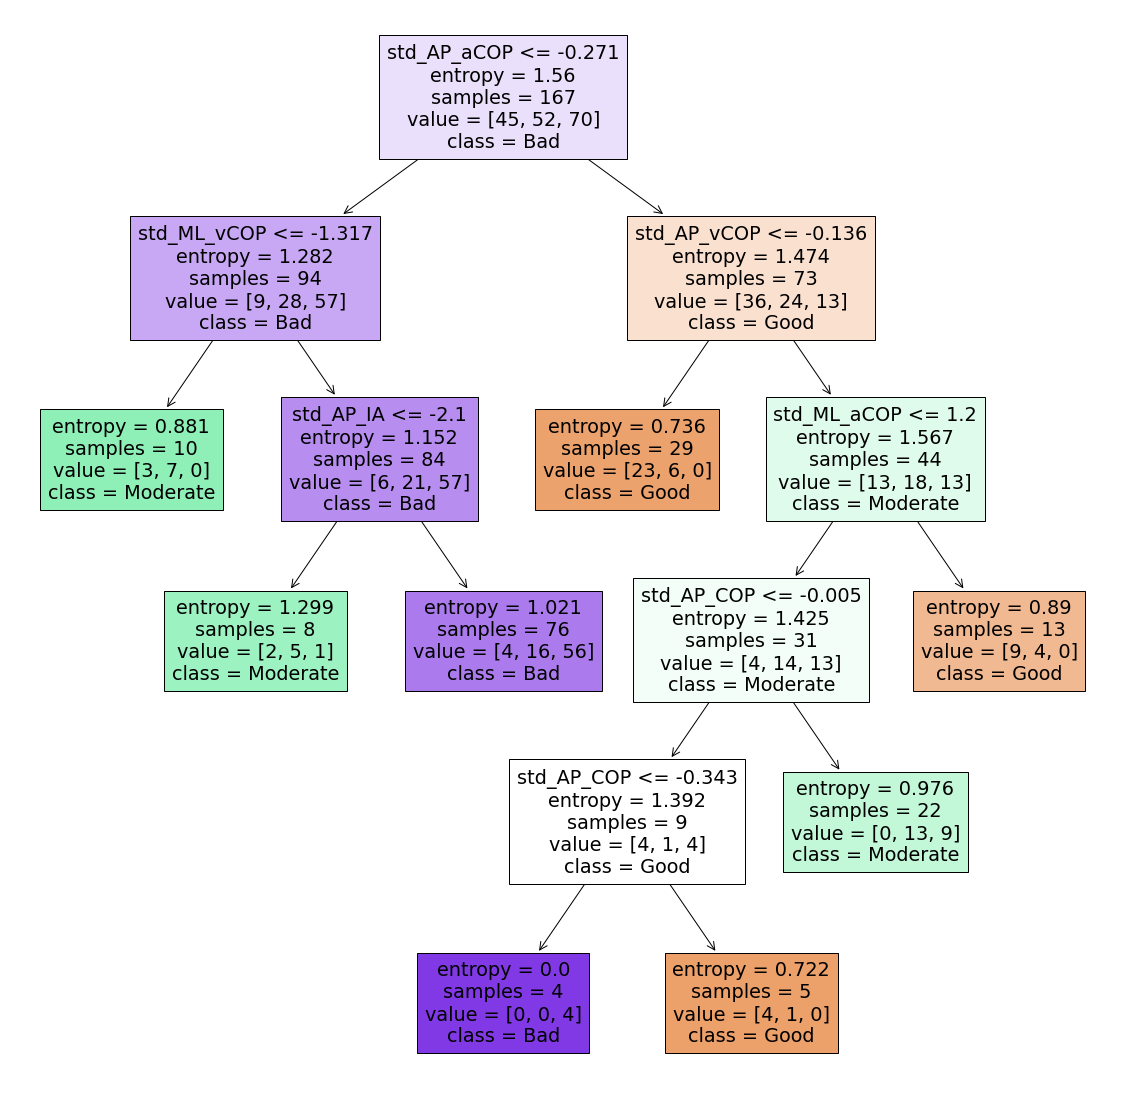

In [611]:
from sklearn import  tree
figure = plt.figure(figsize = (20,20))
tree.plot_tree(non_kine_DT_best_reg, 
              feature_names=list(non_kine_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True)

[Text(558.0, 951.3000000000001, 'std_ML_IA <= 0.561\ngini = 0.62\nsamples = 102\nvalue = [40, 42, 85]\nclass = Bad'),
 Text(279.0, 679.5, 'std_AP_IA <= 0.315\ngini = 0.576\nsamples = 88\nvalue = [27, 33, 82]\nclass = Bad'),
 Text(139.5, 407.70000000000005, 'max_AP_vCOP <= -0.062\ngini = 0.477\nsamples = 62\nvalue = [16, 17, 73]\nclass = Bad'),
 Text(69.75, 135.89999999999998, 'gini = 0.391\nsamples = 50\nvalue = [9, 12, 67]\nclass = Bad'),
 Text(209.25, 135.89999999999998, 'gini = 0.66\nsamples = 12\nvalue = [7, 5, 6]\nclass = Good'),
 Text(418.5, 407.70000000000005, 'max_AP_vCOP <= -0.287\ngini = 0.647\nsamples = 26\nvalue = [11, 16, 9]\nclass = Moderate'),
 Text(348.75, 135.89999999999998, 'gini = 0.379\nsamples = 11\nvalue = [2, 10, 1]\nclass = Moderate'),
 Text(488.25, 135.89999999999998, 'gini = 0.658\nsamples = 15\nvalue = [9, 6, 8]\nclass = Good'),
 Text(837.0, 679.5, 'mean_AP_IA <= -0.512\ngini = 0.586\nsamples = 14\nvalue = [13, 9, 3]\nclass = Good'),
 Text(697.5, 407.70000000

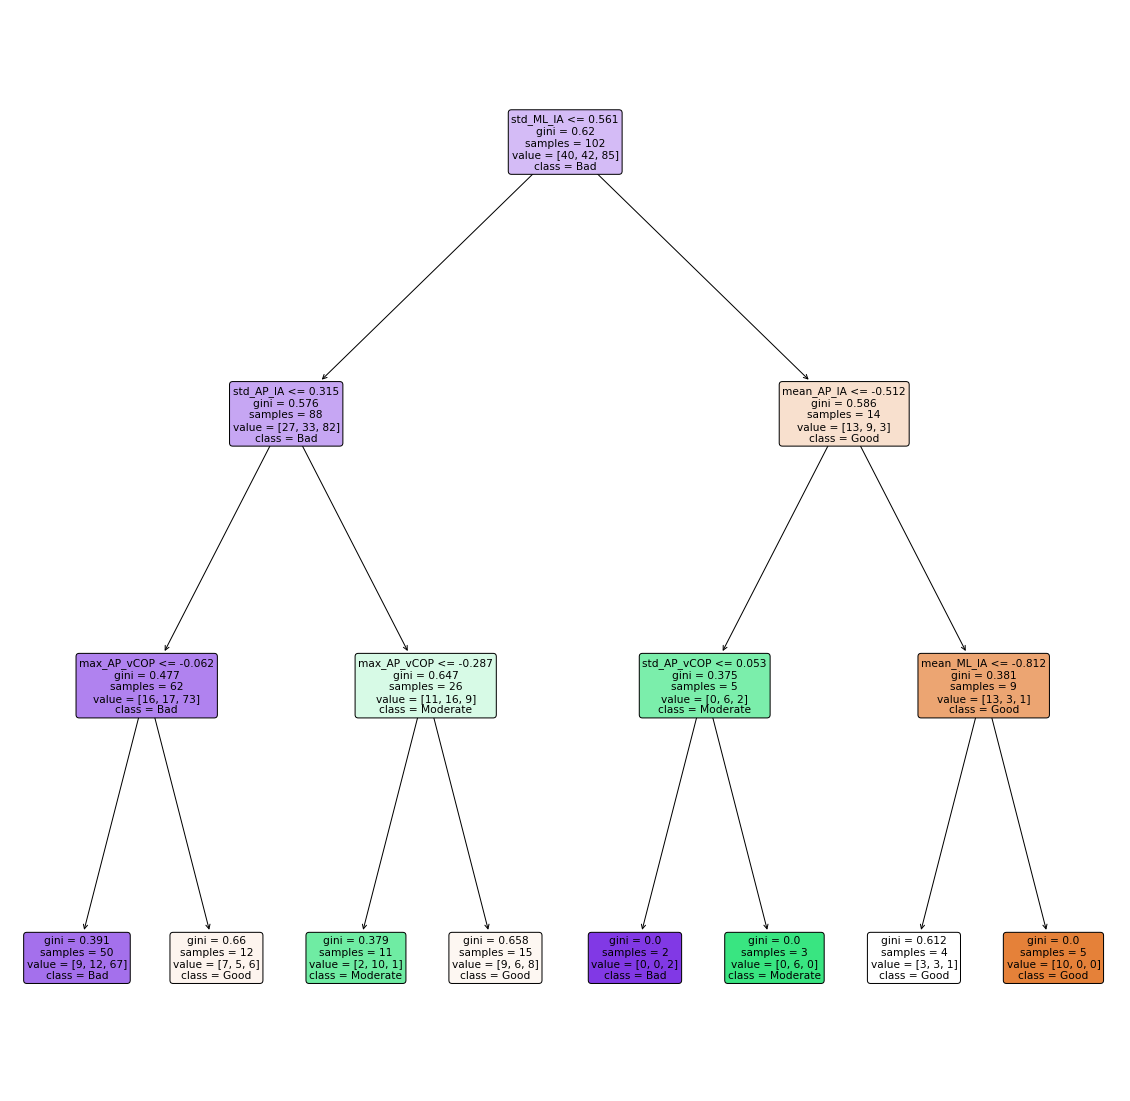

In [612]:
figure = plt.figure(figsize = (20,20))
tree.plot_tree(non_kine_RF_best_reg.estimators_[0], 
              feature_names=list(non_kine_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True,
              rounded=True)


In [613]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [614]:
acc_3_t = accuracy_score(y_test.ravel(), non_kine_SVC_best_reg.predict(non_kine_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), non_kine_SVC_best_reg.predict(non_kine_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("non_kine SVC" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

non_kine SVC
acc: 0.611
recall: 0.542
precision: 0.567


Text(0.5, 1.0, 'SVC confusion matrix')

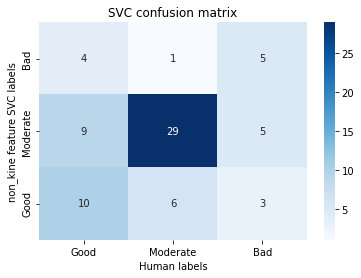

In [615]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), non_kine_SVC_best_reg.predict(non_kine_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), non_kine_SVC_best_reg.predict(non_kine_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('non_kine feature SVC labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("SVC confusion matrix")

In [616]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("non_kine feature SVC Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

non_kine feature SVC Sensitivity: 
 Good prediction: 43.47826086956522 
 Moderate prediction 80.55555555555556 
 Bad prediction 38.46153846153847


In [617]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("non_kine feature SVC Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


non_kine feature SVC Precision: 
 Good prediction: 52.63157894736842 
 Moderate prediction 67.44186046511628 
 Bad prediction 50.0


In [618]:
acc_3_t = accuracy_score(y_test.ravel(), non_kine_DT_best_reg.predict(non_kine_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), non_kine_DT_best_reg.predict(non_kine_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("non_kine DT" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

non_kine DT
acc: 0.681
recall: 0.703
precision: 0.669


Text(0.5, 1.0, 'DT confusion matrix')

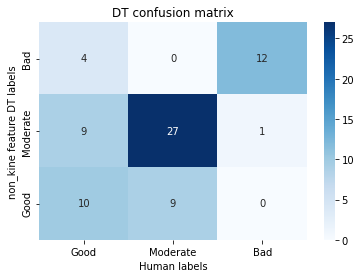

In [619]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), non_kine_DT_best_reg.predict(non_kine_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), non_kine_DT_best_reg.predict(non_kine_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('non_kine feature DT labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("DT confusion matrix")

In [620]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("non_kine feature DT Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

non_kine feature DT Sensitivity: 
 Good prediction: 43.47826086956522 
 Moderate prediction 75.0 
 Bad prediction 92.3076923076923


In [621]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("non_kine feature DT Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


non_kine feature DT Precision: 
 Good prediction: 52.63157894736842 
 Moderate prediction 72.97297297297297 
 Bad prediction 75.0


In [622]:
acc_3_t = accuracy_score(y_test.ravel(), non_kine_RF_best_reg.predict(non_kine_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), non_kine_RF_best_reg.predict(non_kine_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("non_kine RF" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

non_kine RF
acc: 0.625
recall: 0.601
precision: 0.6


Text(0.5, 1.0, 'RF confusion matrix')

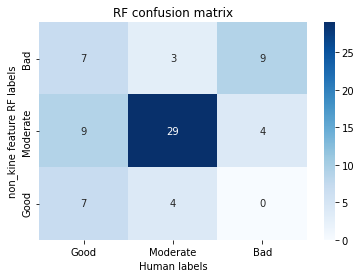

In [623]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), non_kine_RF_best_reg.predict(non_kine_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), non_kine_RF_best_reg.predict(non_kine_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('non_kine feature RF labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("RF confusion matrix")

In [624]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("non_kine feature RF Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

non_kine feature RF Sensitivity: 
 Good prediction: 30.434782608695656 
 Moderate prediction 80.55555555555556 
 Bad prediction 69.23076923076923


In [625]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("non_kine feature RF Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


non_kine feature RF Precision: 
 Good prediction: 63.63636363636363 
 Moderate prediction 69.04761904761905 
 Bad prediction 47.368421052631575


In [626]:
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn import metrics

In [627]:
onehotencoder = OneHotEncoder()
onehot_targets = onehotencoder.fit_transform(y_test.reshape(-1, 1)).toarray()
targets_bad = onehot_targets[:,0]

In [628]:
targets_bad

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [629]:
all_predictions = all_RF_best_reg.predict_proba(all_x_test)
all_predictions_bad = all_predictions[:,0]

spa_predictions = spa_RF_best_reg.predict_proba(spa_x_test)
spa_predictions_bad = spa_predictions[:,0]

cop_predictions = COP_RF_best_reg.predict_proba(cop_x_test)
cop_predictions_bad = cop_predictions[:,0]

adv_predictions = adv_RF_best_reg.predict_proba(adv_x_test)
adv_predictions_bad = adv_predictions[:,0]

spa_cop_predictions = spa_cop_RF_best_reg.predict_proba(spa_cop_x_test)
spa_cop_predictions_bad = spa_cop_predictions[:,0]

spa_adv_predictions = spa_adv_RF_best_reg.predict_proba(spa_adv_x_test)
spa_adv_predictions_bad = spa_adv_predictions[:,0]

cop_adv_predictions = cop_adv_RF_best_reg.predict_proba(cop_adv_x_test)
cop_adv_predictions_bad = cop_adv_predictions[:,0]

kine_predictions = kine_RF_best_reg.predict_proba(kine_x_test)
kine_predictions_bad = kine_predictions[:,0]

non_kine_predictions = non_kine_RF_best_reg.predict_proba(non_kine_x_test)
non_kine_predictions_bad = non_kine_predictions[:,0]

In [630]:
all_fpr, all_tpr, all_thresholds = roc_curve(targets_bad, all_predictions_bad)
spa_fpr, spa_tpr, spa_thresholds = roc_curve(targets_bad, spa_predictions_bad)
cop_fpr, cop_tpr, cop_thresholds = roc_curve(targets_bad, cop_predictions_bad)
adv_fpr, adv_tpr, adv_thresholds = roc_curve(targets_bad, adv_predictions_bad)
spa_cop_fpr, spa_cop_tpr, spa_cop_thresholds = roc_curve(targets_bad, spa_cop_predictions_bad)
spa_adv_fpr, spa_adv_tpr, spa_adv_thresholds = roc_curve(targets_bad, spa_adv_predictions_bad)
cop_adv_fpr, cop_adv_tpr, cop_adv_thresholds = roc_curve(targets_bad, cop_adv_predictions_bad)
kine_fpr, kine_tpr, kine_thresholds = roc_curve(targets_bad, kine_predictions_bad)
non_kine_fpr, non_kine_tpr, non_kine_thresholds = roc_curve(targets_bad, non_kine_predictions_bad)

In [631]:
all_auc = metrics.auc(all_fpr, all_tpr)
spa_auc = metrics.auc(spa_fpr, spa_tpr)
cop_auc = metrics.auc(cop_fpr, cop_tpr)
adv_auc = metrics.auc(adv_fpr, adv_tpr)
spa_cop_auc = metrics.auc(spa_adv_fpr, spa_adv_tpr)
spa_adv_auc = metrics.auc(spa_adv_fpr, spa_adv_tpr)
cop_adv_auc = metrics.auc(cop_adv_fpr, cop_adv_tpr)
kine_auc = metrics.auc(kine_fpr, kine_tpr)
non_kine_auc = metrics.auc(non_kine_fpr, non_kine_tpr)

Text(0.5, 1.0, 'RF')

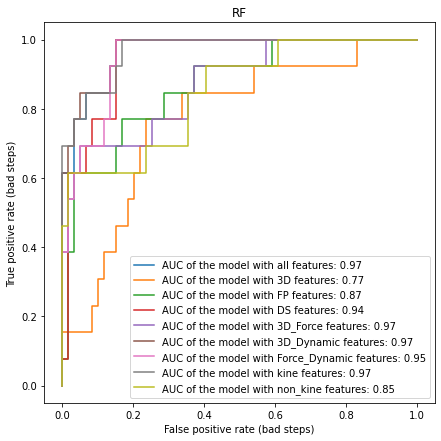

In [632]:
all_label = "AUC of the model with all features: " + str(round(all_auc, 2))
spa_label = "AUC of the model with 3D features: " + str(round(spa_auc, 2))
cop_label = "AUC of the model with FP features: " + str(round(cop_auc, 2))
adv_label = "AUC of the model with DS features: " + str(round(adv_auc, 2))
spa_cop_label = "AUC of the model with 3D_Force features: " + str(round(spa_cop_auc, 2))
spa_adv_label = "AUC of the model with 3D_Dynamic features: " + str(round(spa_adv_auc, 2))
cop_adv_label = "AUC of the model with Force_Dynamic features: " + str(round(cop_adv_auc, 2))
kine_label = "AUC of the model with kine features: " + str(round(kine_auc, 2))
non_kine_label = "AUC of the model with non_kine features: " + str(round(non_kine_auc, 2))

figure = plt.figure(figsize = (7,7))
plt.plot(all_fpr,all_tpr,  label = all_label)
plt.plot(spa_fpr,spa_tpr,  label = spa_label)
plt.plot(cop_fpr,cop_tpr,  label = cop_label)
plt.plot(adv_fpr,adv_tpr,  label = adv_label)
plt.plot(spa_cop_fpr,spa_cop_tpr,  label = spa_cop_label)
plt.plot(spa_adv_fpr,spa_adv_tpr,  label = spa_adv_label)
plt.plot(cop_adv_fpr,cop_adv_tpr,  label = cop_adv_label)
plt.plot(kine_fpr,kine_tpr,  label = kine_label)
plt.plot(non_kine_fpr,non_kine_tpr,  label = non_kine_label)


plt.legend(loc = "lower right")
plt.xlabel("False positive rate (bad steps)")
plt.ylabel("True positive rate (bad steps)")
plt.title("RF")

In [633]:
all_predictions = all_DT_best_reg.predict_proba(all_x_test)
all_predictions_bad = all_predictions[:,0]

spa_predictions = spa_DT_best_reg.predict_proba(spa_x_test)
spa_predictions_bad = spa_predictions[:,0]

cop_predictions = COP_DT_best_reg.predict_proba(cop_x_test)
cop_predictions_bad = cop_predictions[:,0]

adv_predictions = adv_DT_best_reg.predict_proba(adv_x_test)
adv_predictions_bad = adv_predictions[:,0]

spa_cop_predictions = spa_cop_DT_best_reg.predict_proba(spa_cop_x_test)
spa_cop_predictions_bad = spa_cop_predictions[:,0]

spa_adv_predictions = spa_adv_DT_best_reg.predict_proba(spa_adv_x_test)
spa_adv_predictions_bad = spa_adv_predictions[:,0]

cop_adv_predictions = cop_adv_DT_best_reg.predict_proba(cop_adv_x_test)
cop_adv_predictions_bad = cop_adv_predictions[:,0]

kine_predictions = kine_DT_best_reg.predict_proba(kine_x_test)
kine_predictions_bad = kine_predictions[:,0]

non_kine_predictions = non_kine_DT_best_reg.predict_proba(non_kine_x_test)
non_kine_predictions_bad = non_kine_predictions[:,0]

In [634]:
all_fpr, all_tpr, all_thresholds = roc_curve(targets_bad, all_predictions_bad)
spa_fpr, spa_tpr, spa_thresholds = roc_curve(targets_bad, spa_predictions_bad)
cop_fpr, cop_tpr, cop_thresholds = roc_curve(targets_bad, cop_predictions_bad)
adv_fpr, adv_tpr, adv_thresholds = roc_curve(targets_bad, adv_predictions_bad)
spa_cop_fpr, spa_cop_tpr, spa_cop_thresholds = roc_curve(targets_bad, spa_cop_predictions_bad)
spa_adv_fpr, spa_adv_tpr, spa_adv_thresholds = roc_curve(targets_bad, spa_adv_predictions_bad)
cop_adv_fpr, cop_adv_tpr, cop_adv_thresholds = roc_curve(targets_bad, cop_adv_predictions_bad)
kine_fpr, kine_tpr, kine_thresholds = roc_curve(targets_bad, kine_predictions_bad)
non_kine_fpr, non_kine_tpr, non_kine_thresholds = roc_curve(targets_bad, non_kine_predictions_bad)

In [635]:
all_auc = metrics.auc(all_fpr, all_tpr)
spa_auc = metrics.auc(spa_fpr, spa_tpr)
cop_auc = metrics.auc(cop_fpr, cop_tpr)
adv_auc = metrics.auc(adv_fpr, adv_tpr)
spa_cop_auc = metrics.auc(spa_adv_fpr, spa_adv_tpr)
spa_adv_auc = metrics.auc(spa_adv_fpr, spa_adv_tpr)
cop_adv_auc = metrics.auc(cop_adv_fpr, cop_adv_tpr)
kine_auc = metrics.auc(kine_fpr, kine_tpr)
non_kine_auc = metrics.auc(non_kine_fpr, non_kine_tpr)

Text(0.5, 1.0, 'DT')

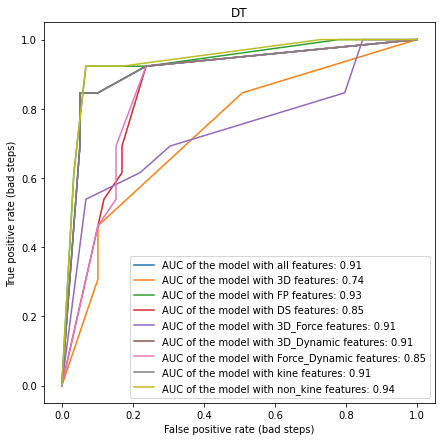

In [636]:
all_label = "AUC of the model with all features: " + str(round(all_auc, 2))
spa_label = "AUC of the model with 3D features: " + str(round(spa_auc, 2))
cop_label = "AUC of the model with FP features: " + str(round(cop_auc, 2))
adv_label = "AUC of the model with DS features: " + str(round(adv_auc, 2))
spa_cop_label = "AUC of the model with 3D_Force features: " + str(round(spa_cop_auc, 2))
spa_adv_label = "AUC of the model with 3D_Dynamic features: " + str(round(spa_adv_auc, 2))
cop_adv_label = "AUC of the model with Force_Dynamic features: " + str(round(cop_adv_auc, 2))
kine_label = "AUC of the model with kine features: " + str(round(kine_auc, 2))
non_kine_label = "AUC of the model with non_kine features: " + str(round(non_kine_auc, 2))

figure = plt.figure(figsize = (7,7))
plt.plot(all_fpr,all_tpr,  label = all_label)
plt.plot(spa_fpr,spa_tpr,  label = spa_label)
plt.plot(cop_fpr,cop_tpr,  label = cop_label)
plt.plot(adv_fpr,adv_tpr,  label = adv_label)
plt.plot(spa_cop_fpr,spa_cop_tpr,  label = spa_cop_label)
plt.plot(spa_adv_fpr,spa_adv_tpr,  label = spa_adv_label)
plt.plot(cop_adv_fpr,cop_adv_tpr,  label = cop_adv_label)
plt.plot(kine_fpr,kine_tpr,  label = kine_label)
plt.plot(non_kine_fpr,non_kine_tpr,  label = non_kine_label)


plt.legend(loc = "lower right")
plt.xlabel("False positive rate (bad steps)")
plt.ylabel("True positive rate (bad steps)")
plt.title("DT")

Text(0.5, 0, 'important')

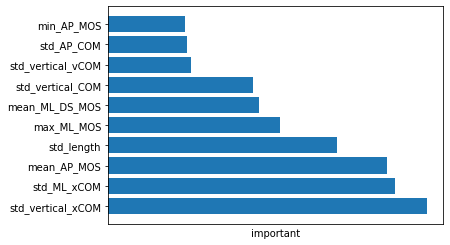

In [637]:
importance = all_RF_best_reg.feature_importances_
features = all_input_df.columns
importance_df = pd.DataFrame({"importance":importance,
                              "features":features
                             })
importance_sorted_df = importance_df.sort_values("importance", ascending = 0)
importance_sorted_df
feature_pos = [1,2,3,4,5,6,7,8,9,10]
plt.barh( feature_pos, importance_sorted_df["importance"].head(10),align='center')
plt.yticks(feature_pos, labels = importance_sorted_df["features"].head(10))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.xlabel("important")

Text(0.5, 0, 'important')

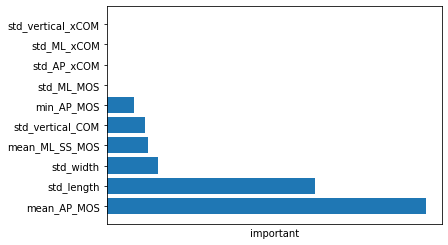

In [638]:
importance = all_DT_best_reg.feature_importances_
features = all_input_df.columns
importance_df = pd.DataFrame({"importance":importance,
                              "features":features
                             })
importance_sorted_df = importance_df.sort_values("importance", ascending = 0)
importance_sorted_df
feature_pos = range(1,11)
plt.barh( feature_pos, importance_sorted_df["importance"].head(10),align='center')
plt.yticks(feature_pos, labels = importance_sorted_df["features"].head(10))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.xlabel("important")

In [639]:
importance_sorted_df.head()

importance          features
27    0.465470       mean_AP_MOS
13    0.303379        std_length
14    0.074840         std_width
31    0.060593    mean_ML_SS_MOS
2     0.055803  std_vertical_COM

In [640]:
all_DT_best_reg.feature_importances_

array([0.        , 0.        , 0.05580271, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.30337876, 0.07483954,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.46547001, 0.        , 0.        ,
       0.        , 0.06059318, 0.        , 0.        , 0.03991579,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [641]:
df

sub_ID  std_AP_COM  std_ML_COM  std_vretical_COM  ROM_AP_COM  ROM_ML_COM  \
0    sub01    225.3941     13.7379           14.4676    771.5530     46.6441   
1    sub01    215.7082      9.1494           14.0027    751.8807     32.8360   
2    sub01    211.0191     11.8203           13.4648    738.4824     41.5929   
3    sub01    214.4471     11.5293           15.4618    747.1354     41.4193   
4    sub01    216.1303     11.9675           14.2662    754.2082     41.0624   
..     ...         ...         ...               ...         ...         ...   
236  sub19    202.7620      6.6328           12.4948    676.6447     22.3071   
237  sub19         NaN         NaN               NaN         NaN         NaN   
238  sub19    189.9468      6.5295           11.1679    674.2333     23.2727   
239  sub19    198.6291      9.1566           13.9769    693.1216     31.6568   
240  sub19    118.2797     10.0654           12.2657    383.4489     31.7587   

     std_AP_vCOM  std_ML_vCOM  std_vretical_vCOM  max_AP_vCOM  ...  \
0       242.3234     225.1918           320.1764    2016.8228  ...   
1       191.5432     213.8965           313.8283    2479.8239  ...   
2       191.8410     201.5645           287.8133    2372.1007  ...   
3       158.5032     249.4564           384.1710    3295.6795  ...   
4       207.3971     203.7496           351.7096    3372.2676  ...   
..           ...          ...                ...          ...  ...   
236     309.3077     117.1623           285.1712    1582.4703  ...   
237          NaN          NaN                NaN          NaN  ...   
238     493.1129     166.0467           309.0575    3363.8138  ...   
239     238.5104     188.2197           350.6784    3235.4031  ...   
240     458.0812      96.6099           180.9258    3120.9409  ...   

     min_ML_MOS  ROM_AP_MOS  ROM_ML_MOS  mean_AP_IA  mean_ML_IA  std_AP_IA  \
0      -91.1755    660.0699    200.8921   -0.457880     3.70460     7.8530   
1      -98.9281    346.9955    202.1508   -0.523310    -4.17400     7.5574   
2     -132.8963    778.0691    210.9258   17.789700    -6.20450     2.4831   
3     -115.1524    383.3216    231.6019   -1.075900     3.89580     6.9163   
4     -133.6831    809.8593    234.4645    0.005639    -3.67770     7.7185   
..          ...         ...         ...         ...         ...        ...   
236    -93.8197    902.6538    191.1574    9.997400     0.49284    10.8404   
237         NaN         NaN         NaN         NaN         NaN        NaN   
238    -85.3682    773.5858    180.4752    0.088377     2.52960     6.1080   
239   -101.6012    764.8434    193.7540    0.381140    -2.88360     6.6745   
240    -99.5458    746.7456    109.4033    3.618600     1.95910     5.0475   

     std_ML_IA  ROM_AP_IA  ROM_ML_IA  target_performance  
0       1.8426    28.1769    10.9437                Good  
1       2.0009    27.1516    10.1876                Good  
2       1.1891     7.6599     4.0342                Good  
3       1.8174    25.0181    10.5203                Good  
4       1.8590    28.1969     9.7389                Good  
..         ...        ...        ...                 ...  
236     1.2180    40.0368     5.7384                 Bad  
237        NaN        NaN        NaN                 Bad  
238     1.4901    23.2049     7.1361                 Bad  
239     1.7882    24.5514     7.4600                 Bad  
240     1.9663    22.3537     7.3525                 Bad  

[241 rows x 71 columns]

## T-test

In [642]:
import scipy.stats as stats

In [643]:
def grouping_columns_infor(targeted_columns):
    col_infor = df[["target_performance", targeted_columns]]
    good_class = col_infor[col_infor["target_performance"] == "Good"][targeted_columns]
    mod_class = col_infor[col_infor["target_performance"] == "Moderate"][targeted_columns]
    bad_class = col_infor[col_infor["target_performance"] == "Bad"][targeted_columns]
    return [good_class, mod_class, bad_class]

### std_length

In [644]:
[good_std_length, mod_std_length, bad_std_length] = grouping_columns_infor(targeted_columns = "std_length")

In [645]:
good_M = round(good_std_length.mean(),3)
mod_M = round(mod_std_length.mean(),3)
bad_M = round(bad_std_length.mean(),3)
good_S = round(good_std_length.std(),3)
mod_S = round(mod_std_length.std(),3)
bad_S = round(bad_std_length.std(),3)
print("Good: M:{}, STD:{} \n Mod: M:{}, STD:{} \n bad: M:{}, STD:{} \n".format(good_M,good_S,mod_M,mod_S,bad_M,bad_S))

Good: M:210.552, STD:7.288 
 Mod: M:194.72, STD:9.796 
 bad: M:204.592, STD:10.009 



In [646]:
good_std_length.mean()

210.55221733333335

In [647]:
t = stats.ttest_ind(good_std_length, mod_std_length).statistic
p = stats.ttest_ind(good_std_length, mod_std_length).pvalue

print("t = {}, p = {}".format(t, round(p, 3)))

t = 11.861820258127535, p = 0.0


In [648]:
t = stats.ttest_ind(good_std_length, bad_std_length).statistic
p = stats.ttest_ind(good_std_length, bad_std_length).pvalue

print("t = {}, p = {}".format(t, round(p, 3)))

t = 4.000602705295138, p = 0.0


In [649]:
t = stats.ttest_ind(mod_std_length, bad_std_length).statistic
p = stats.ttest_ind(mod_std_length, bad_std_length).pvalue

print("t = {}, p = {}".format(t, round(p, 3)))

t = -6.1889803585786245, p = 0.0


### std_vertical_xCOM

In [650]:
[good_std_vertical_xCOM, mod_std_vertical_xCOM, bad_std_vertical_xCOM] = grouping_columns_infor(targeted_columns = "std_vretical_xCOM")

In [651]:
good_M = round(good_std_vertical_xCOM.mean(),3)
mod_M = round(mod_std_vertical_xCOM.mean(),3)
bad_M = round(bad_std_vertical_xCOM.mean(),3)
good_S = round(good_std_vertical_xCOM.std(),3)
mod_S = round(mod_std_vertical_xCOM.std(),3)
bad_S = round(bad_std_vertical_xCOM.std(),3)
print("Good: M:{}, STD:{} \n Mod: M:{}, STD:{} \n bad: M:{}, STD:{} \n".format(good_M,good_S,mod_M,mod_S,bad_M,bad_S))

Good: M:0.07, STD:0.024 
 Mod: M:0.075, STD:0.013 
 bad: M:0.045, STD:0.009 



In [652]:
t = stats.ttest_ind(good_std_vertical_xCOM, mod_std_vertical_xCOM).statistic
p = stats.ttest_ind(good_std_vertical_xCOM, mod_std_vertical_xCOM).pvalue

print("t = {}, p = {}".format(t, round(p, 3)))

t = -1.8136136716064055, p = 0.071


In [653]:
t = stats.ttest_ind(good_std_vertical_xCOM, bad_std_vertical_xCOM).statistic
p = stats.ttest_ind(good_std_vertical_xCOM, bad_std_vertical_xCOM).pvalue

print("t = {}, p = {}".format(t, round(p, 3)))

t = nan, p = nan


In [654]:
t = stats.ttest_ind(mod_std_vertical_xCOM, bad_std_vertical_xCOM).statistic
p = stats.ttest_ind(mod_std_vertical_xCOM, bad_std_vertical_xCOM).pvalue

print("t = {}, p = {}".format(t, round(p, 3)))

t = nan, p = nan


### max_ML_aCOM

In [655]:
[good_max_ML_aCOM, mod_max_ML_aCOM, bad_max_ML_aCOM] = grouping_columns_infor(targeted_columns = "max_ML_aCOM")

In [656]:
good_M = round(good_max_ML_aCOM.mean(),3)
mod_M = round(mod_max_ML_aCOM.mean(),3)
bad_M = round(bad_max_ML_aCOM.mean(),3)
good_S = round(good_max_ML_aCOM.std(),3)
mod_S = round(mod_max_ML_aCOM.std(),3)
bad_S = round(bad_max_ML_aCOM.std(),3)
print("Good: M:{}, STD:{} \n Mod: M:{}, STD:{} \n bad: M:{}, STD:{} \n".format(good_M,good_S,mod_M,mod_S,bad_M,bad_S))

Good: M:6085.897, STD:4334.799 
 Mod: M:5282.952, STD:1901.705 
 bad: M:6991.575, STD:5667.957 



In [657]:
t = stats.ttest_ind(good_max_ML_aCOM, mod_max_ML_aCOM).statistic
p = stats.ttest_ind(good_max_ML_aCOM, mod_max_ML_aCOM).pvalue

print("t = {}, p = {}".format(t, round(p, 3)))

t = 1.6921636102525461, p = 0.092


In [658]:
t = stats.ttest_ind(good_max_ML_aCOM, bad_max_ML_aCOM).statistic
p = stats.ttest_ind(good_max_ML_aCOM, bad_max_ML_aCOM).pvalue

print("t = {}, p = {}".format(t, round(p, 3)))

t = nan, p = nan


In [659]:
t = stats.ttest_ind(mod_max_ML_aCOM, bad_max_ML_aCOM).statistic
p = stats.ttest_ind(mod_max_ML_aCOM, bad_max_ML_aCOM).pvalue

print("t = {}, p = {}".format(t, round(p, 3)))

t = nan, p = nan


### mean_ML_MOS

In [660]:
[good_mean_ML_MOS, mod_mean_ML_MOS, bad_mean_ML_MOS] = grouping_columns_infor(targeted_columns = "mean_ML_MOS")

In [661]:
good_M = round(good_mean_ML_MOS.mean(),3)
mod_M = round(mod_mean_ML_MOS.mean(),3)
bad_M = round(bad_mean_ML_MOS.mean(),3)
good_S = round(good_mean_ML_MOS.std(),3)
mod_S = round(mod_mean_ML_MOS.std(),3)
bad_S = round(bad_mean_ML_MOS.std(),3)
print("Good: M:{}, STD:{} \n Mod: M:{}, STD:{} \n bad: M:{}, STD:{} \n".format(good_M,good_S,mod_M,mod_S,bad_M,bad_S))

Good: M:-7.113, STD:13.842 
 Mod: M:-6.072, STD:17.395 
 bad: M:-14.029, STD:21.933 



In [662]:
t = stats.ttest_ind(good_mean_ML_MOS, mod_mean_ML_MOS).statistic
p = stats.ttest_ind(good_mean_ML_MOS, mod_mean_ML_MOS).pvalue

print("t = {}, p = {}".format(t, round(p, 3)))

t = -0.4309507353745069, p = 0.667


In [663]:
t = stats.ttest_ind(good_mean_ML_MOS, bad_mean_ML_MOS).statistic
p = stats.ttest_ind(good_mean_ML_MOS, bad_mean_ML_MOS).pvalue

print("t = {}, p = {}".format(t, round(p, 3)))

t = nan, p = nan


In [664]:
t = stats.ttest_ind(mod_mean_ML_MOS, bad_mean_ML_MOS).statistic
p = stats.ttest_ind(mod_mean_ML_MOS, bad_mean_ML_MOS).pvalue

print("t = {}, p = {}".format(t, round(p, 3)))

t = nan, p = nan


In [665]:
all_clear_corr_df.columns = ['std_AP_COM', 'std_ML_COM', 'std_vertical_COM', 'std_AP_vCOM',
       'std_ML_vCOM', 'std_vertical_vCOM', 'max_AP_vCOM', 'max_ML_vCOM',
       'std_vertical_aCOM', 'max_ML_aCOM', 'max_AP_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'std_length', 'std_width', 'max_clearance',
       'std_AP_COP', 'std_ML_COP', 'std_ML_vCOP', 'max_ML_vCOP', 'std_AP_vCOP',
       'max_AP_vCOP', 'std_AP_aCOP', 'std_ML_aCOP', 'std_AP_xCOM',
       'std_ML_xCOM', 'std_vertical_xCOM', 'mean_AP_MOS', 'mean_ML_MOS',
       'std_AP_MOS', 'std_ML_MOS', 'mean_ML_SS_MOS', 'mean_ML_DS_MOS',
       'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_ML_MOS', 'mean_AP_IA',
       'mean_ML_IA', 'std_AP_IA', 'std_ML_IA', 'target_performance']

In [666]:
all_clear_corr_df.to_csv("C:/Users/a1003/OneDrive/桌面/Thesis/feature_comparison/force_df.csv")